In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [226]:
data = pd.read_csv("data.csv")
data.head(10)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   
5   Oct            4     Friday   Honda        Urban        Wednesday   
6   Feb            1   Saturday   Honda        Urban           Monday   
7   Nov            1     Friday   Honda        Urban          Tuesday   
8   Dec            4   Saturday   Honda        Urban        Wednesday   
9   Apr            3    Tuesday    Ford        Urban        Wednesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   
5          Nov                   1    Male        Single  ...       5 years   
6          Feb                   3    Male       Married  ...       7 years   
7          Mar                   4    Male        Single  ...           new   
8          Dec                   5    Male        Single  ...       6 years   
9          Apr                   3    Male       Married  ...   more than 7   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   
5          21 to 25                No             No  External   
6          36 to 40                No             No  External   
7          16 to 17                No             No  External   
8          31 to 35                No            Yes  External   
9          36 to 40                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  
5               3 to 5            no change     1 vehicle  1994   Collision  
6               1 to 2            no change     1 vehicle  1994   Collision  
7                 none            no change     1 vehicle  1994   Collision  
8               3 to 5            no change     1 vehicle  1994   Collision  
9               3 to 5            no change     1 vehicle  1994  All Perils  

[10 rows x 33 columns]

In [ ]:
data.shape

(15420, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

## Checking missing value

In [ ]:
data.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Fortunately, there is no missing value

## Checking the numerical features

In [ ]:
data.describe().T

count         mean          std     min      25%  \
WeekOfMonth         15420.0     2.788586     1.287585     1.0     2.00   
WeekOfMonthClaimed  15420.0     2.693969     1.259115     1.0     2.00   
Age                 15420.0    39.855707    13.492377     0.0    31.00   
FraudFound_P        15420.0     0.059857     0.237230     0.0     0.00   
PolicyNumber        15420.0  7710.500000  4451.514911     1.0  3855.75   
RepNumber           15420.0     8.483268     4.599948     1.0     5.00   
Deductible          15420.0   407.704280    43.950998   300.0   400.00   
DriverRating        15420.0     2.487808     1.119453     1.0     1.00   
Year                15420.0  1994.866472     0.803313  1994.0  1994.00   

                       50%       75%      max  
WeekOfMonth            3.0      4.00      5.0  
WeekOfMonthClaimed     3.0      4.00      5.0  
Age                   38.0     48.00     80.0  
FraudFound_P           0.0      0.00      1.0  
PolicyNumber        7710.5  11565.25  15420.0  
RepNumber              8.0     12.00     16.0  
Deductible           400.0    400.00    700.0  
DriverRating           2.0      3.00      4.0  
Year                1995.0   1996.00   1996.0

## Checking histograms of numerical features so far according to the data

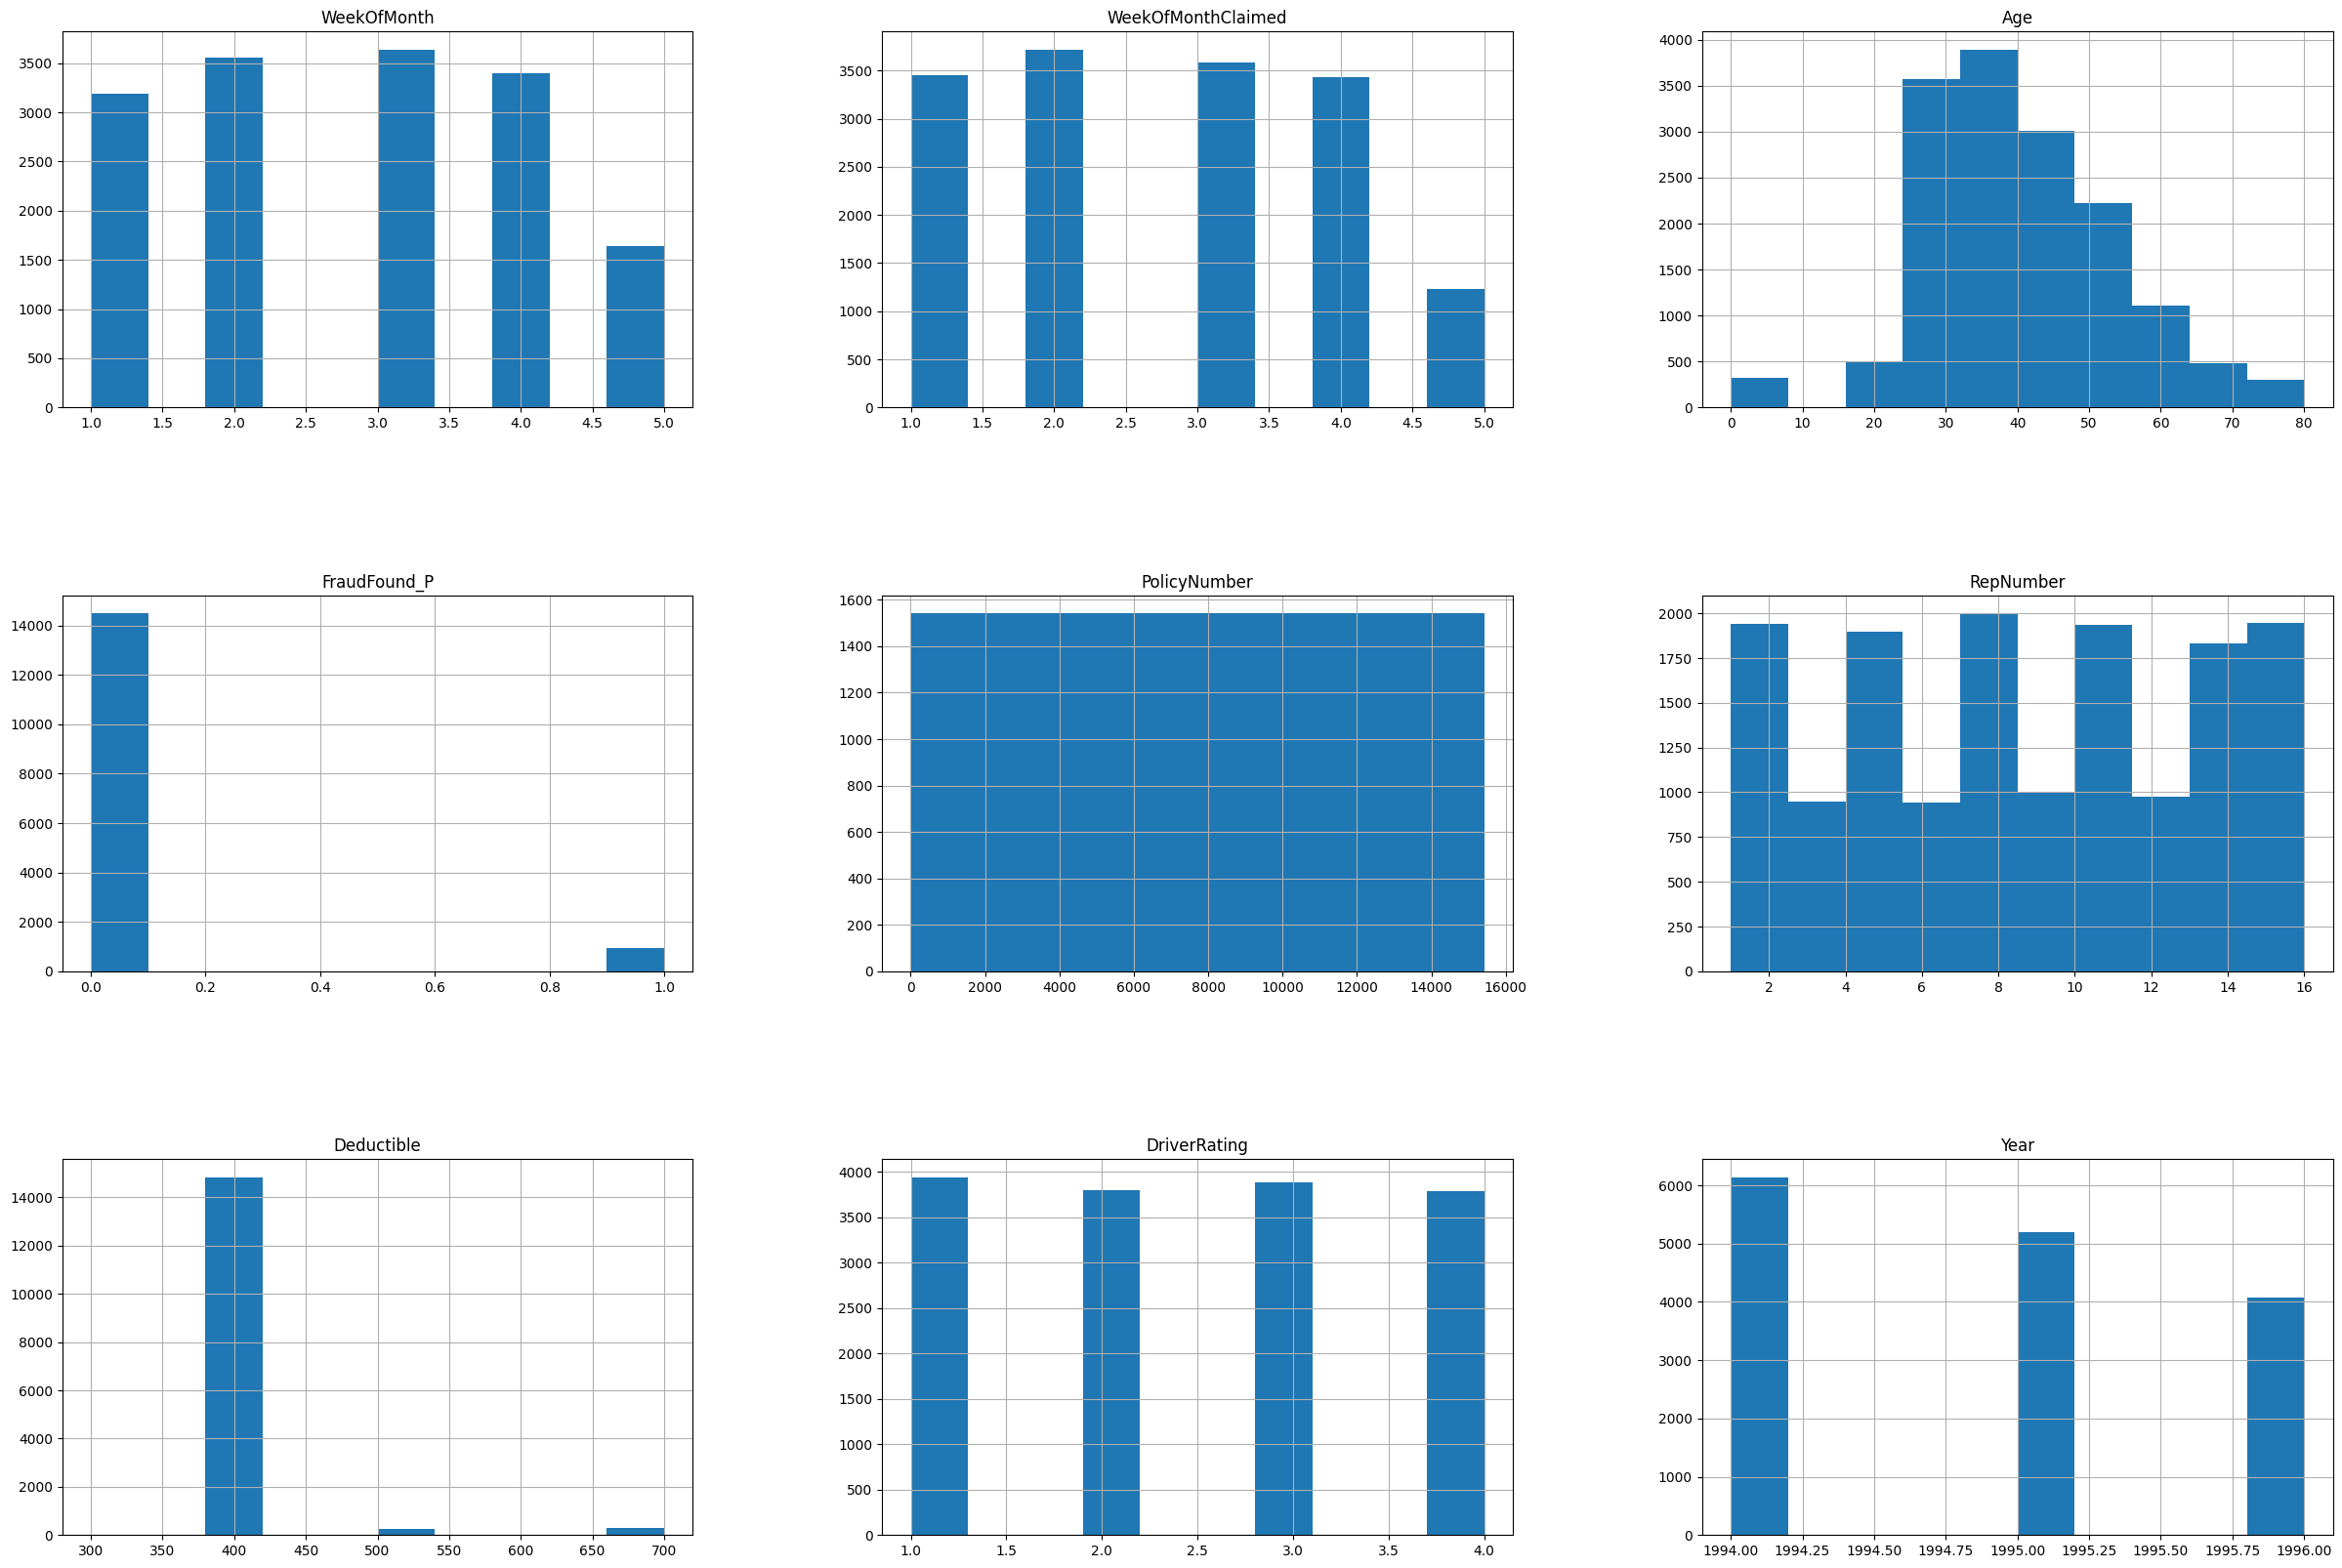

In [ ]:
data.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.5);

## The results of this section:

The Age column has an incorrect value of 0

PolicyNumber has no effect because it is like index and is just a number

The value in different DriverRating classes is almost the same

In the year column, we generally work with 3 different years

Most of the accidents happened in the middle of the month

Most of the age marks are around 30

<ipython-input-33-cd5d4ef26ebe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax=ax, annot=True)


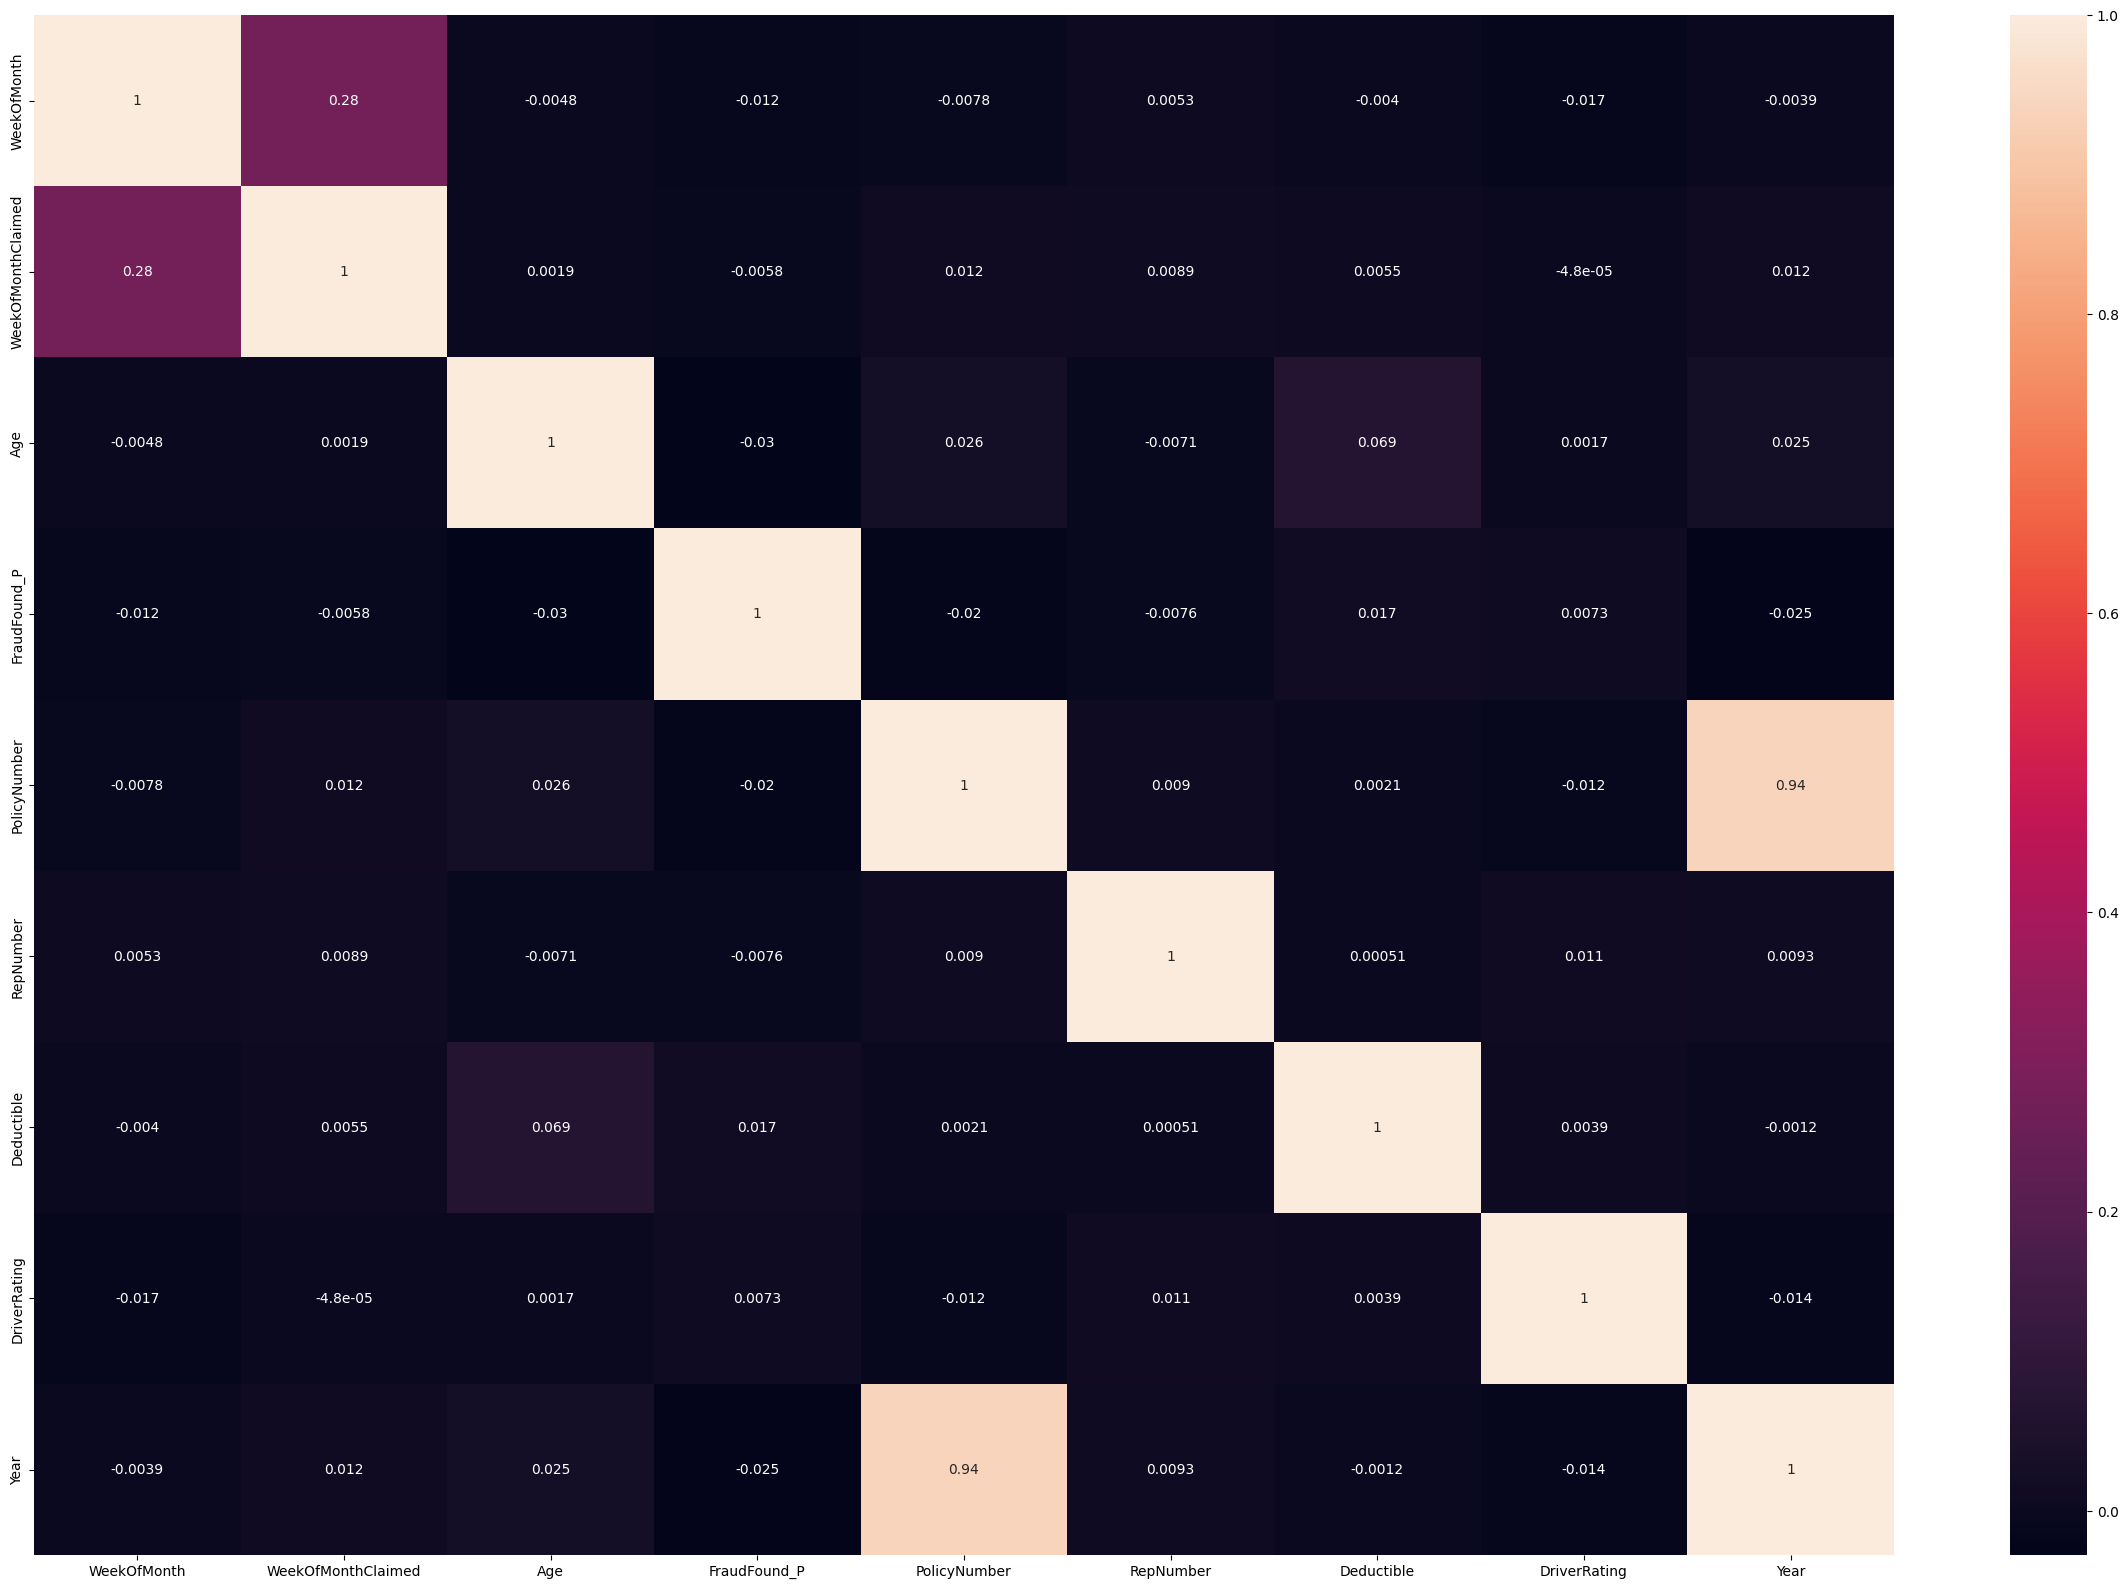

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(data.corr(), ax=ax, annot=True)
plt.show()

## Checking for categorical and numerical columns based on unique values.

In [ ]:
data.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

## Checking coulmns
### checking foe categorical values in each column

In [ ]:
for column in data:
    if column == 'PolicyNumber':
        pass
    else:
        print(column)
        print(sorted(data[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

In [ ]:
# Check DayOfWeekClaimed == 0
data[data['DayOfWeekClaimed']=='0']

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]

In [ ]:
# Check MonthClaimed == 0
data[data['MonthClaimed']=='0']

Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
1516            0                   1  Male        Single  ...           new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

      NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
1516                 none            no change     1 vehicle  1994  All Perils  

[1 rows x 33 columns]

In [ ]:
# Check Age == 0
print(data[data['Age']==0].shape)
data[data['Age']==0].sample(5)

(320, 33)


Month  WeekOfMonth  DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
6902    Mar            1  Wednesday  Honda        Urban        Wednesday   
8467    Jun            3     Monday  Honda        Urban        Wednesday   
9305    Apr            1     Monday  Honda        Urban           Monday   
4380    Jun            3     Monday  Honda        Urban          Tuesday   
12705   Mar            3   Thursday  Honda        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  AgeOfVehicle  \
6902           Mar                   1  Male        Single  ...           new   
8467           Jun                   5  Male        Single  ...           new   
9305           Apr                   1  Male        Single  ...           new   
4380           Jun                   5  Male        Single  ...           new   
12705          Mar                   3  Male        Single  ...           new   

      AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
6902           16 to 17                No             No  External   
8467           16 to 17                No             No  External   
9305           16 to 17                No             No  External   
4380           16 to 17                No             No  External   
12705          16 to 17                No             No  External   

       NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
6902                  none            no change     1 vehicle  1995   
8467                  none            no change     1 vehicle  1995   
9305                  none            no change     1 vehicle  1995   
4380                  none            no change     1 vehicle  1994   
12705                 none         4 to 8 years    2 vehicles  1996   

       BasePolicy  
6902    Liability  
8467    Liability  
9305    Liability  
4380    Liability  
12705   Liability  

[5 rows x 33 columns]

<Axes: >

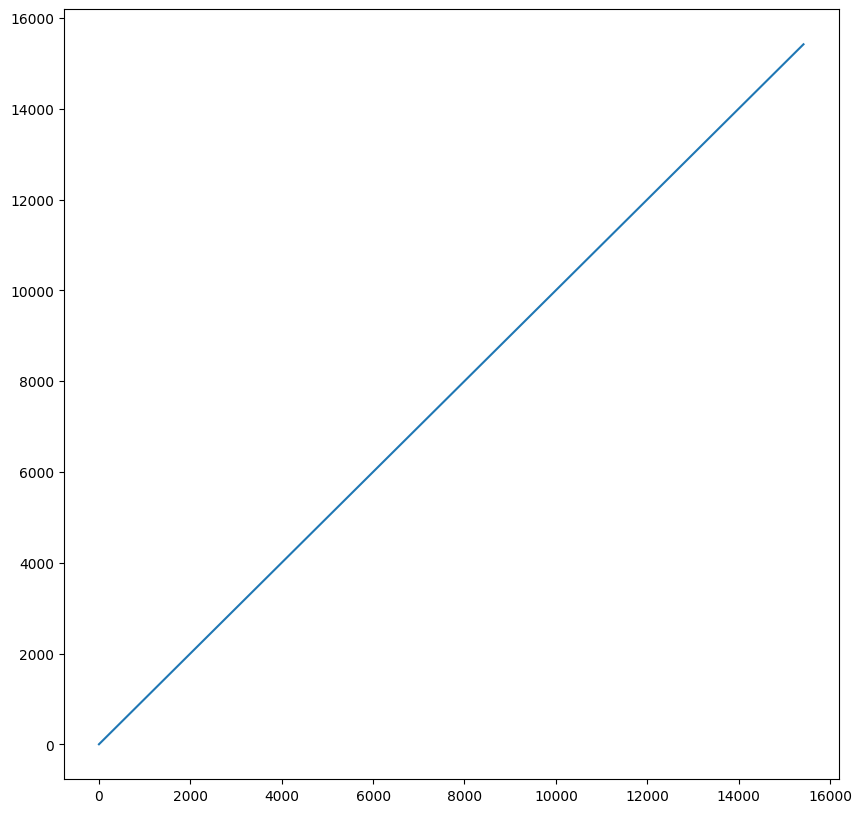

In [ ]:
plt.figure(figsize=(10,10))
data.PolicyNumber.plot()

###### DayOfWeekClaimed, MonthClaimed, and Age contains a 0
###### PolicyType is a concenation of VehicleCategory and BasePolicy
###### PolicyNumber just a row number

In [ ]:
print(data[data['Age']==0]['AgeOfPolicyHolder'].unique()) 

['16 to 17']


In [230]:
data['Age'] = data['Age'].replace({0:16.5})

Replacing the value whose age was 0

Text(0.5, 1.0, 'Age Distribution')

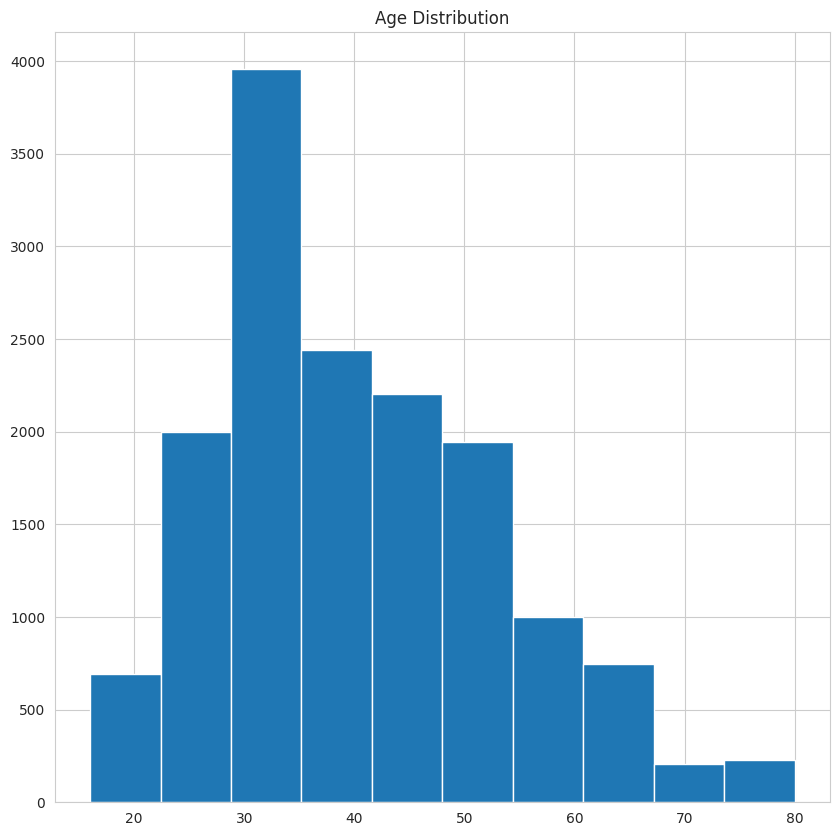

In [231]:
plt.figure(figsize=(10,10))
plt.hist(data['Age'])
plt.title("Age Distribution")

Most of the age distribution is in the age range of 30 years


In [ ]:
#dropping Policy Number column as it has no impact
data=data.drop(columns='PolicyNumber')

In [ ]:
# Drop DayOfWeekClaimed & MonthClaimed == 0, since the 0 in the same row and only one row, so we can drop it
data = data[~(data['MonthClaimed']=='0')]

In [ ]:
data.shape

(15419, 32)

## checking FraudFound_P

<Axes: xlabel='FraudFound_P', ylabel='count'>

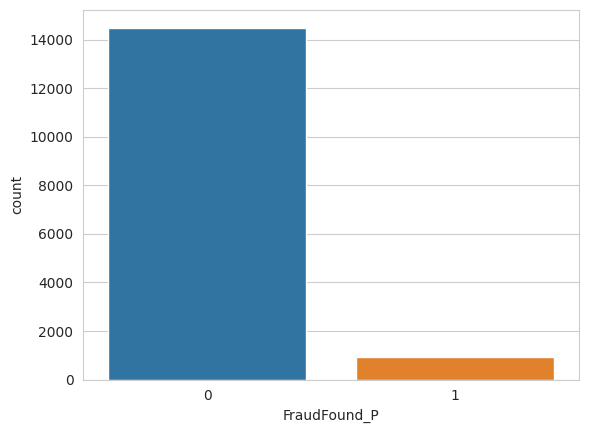

In [227]:
sns.countplot(x ='FraudFound_P', data = data)

It is clearly visible that the data is not balanced

In [ ]:
def plotBAR(coulmns ,target):
    
    fig, ax = plt.subplots(3,2, figsize=(30,20))

            
    order = sorted(data[coulmns[0]].unique())
    sns.countplot(data=data, x=coulmns[0], hue=target, order=order, ax=ax[0][0])
    ax[0][0].set_title(coulmns[0])
    
    order = sorted(data[coulmns[1]].unique())
    sns.countplot(data=data, x=coulmns[1], hue=target, order=order, ax=ax[0][1])
    ax[0][1].set_title(coulmns[1])
    
    order = sorted(data[coulmns[2]].unique())
    sns.countplot(data=data, x=coulmns[2], hue=target, order=order, ax=ax[1][0])
    ax[1][0].set_title(coulmns[2])
    
    order = sorted(data[coulmns[3]].unique())
    sns.countplot(data=data, x=coulmns[3], hue=target, order=order, ax=ax[1][1])
    ax[1][1].set_title(coulmns[3])
    
    order = sorted(data[coulmns[4]].unique())
    sns.countplot(data=data, x=coulmns[4], hue=target, order=order, ax=ax[2][0])
    ax[2][0].set_title(coulmns[4])
            
    order = sorted(data[coulmns[5]].unique())
    sns.countplot(data=data, x=coulmns[5], hue=target, order=order, ax=ax[2][1])
    ax[2][1].set_title(coulmns[5])
            

            
            
    
    plt.tight_layout()

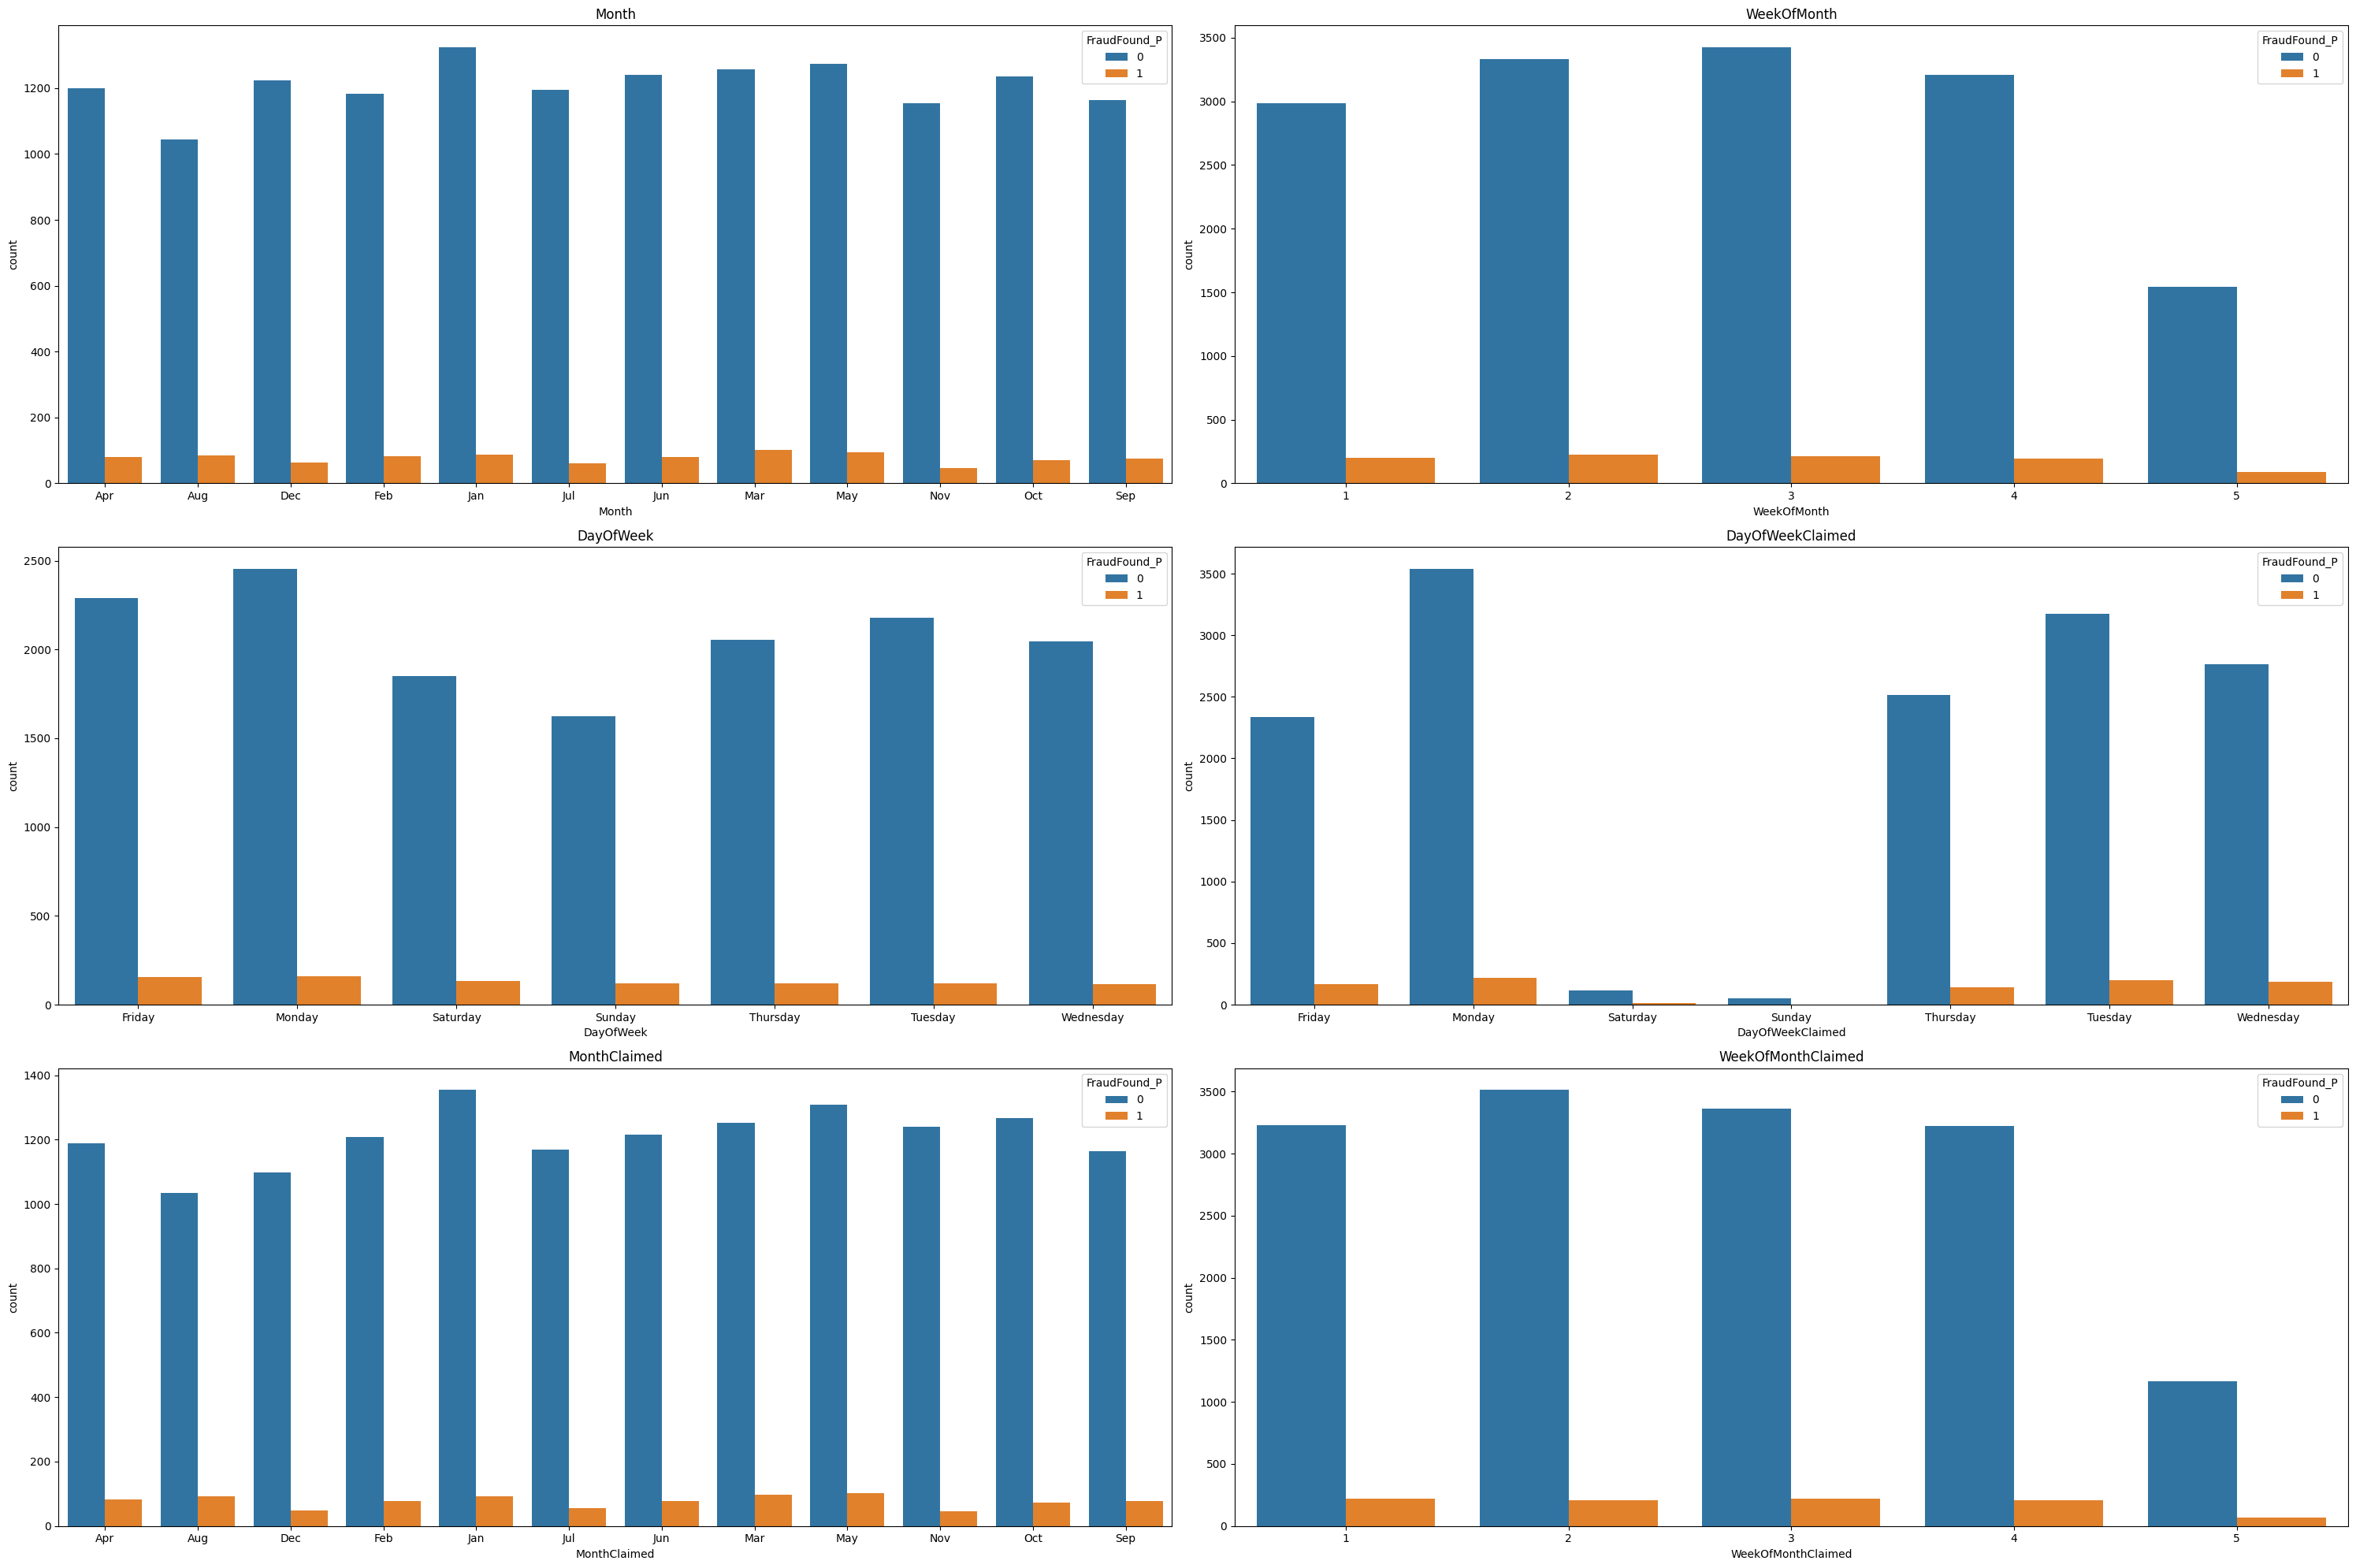

In [ ]:
plotBAR(["Month","WeekOfMonth" ,"DayOfWeek" ,"DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed"], data['FraudFound_P'])

1- It can be seen that the number of accidents throughout the year in different months is almost constant

2- Every month, most accidents occur in the middle of the month


3-Every week, most accidents happen in the middle of the week


4-It is quite visible that the amount of accidents claimed during Hatfa all occur in an average week


5- It is quite visible that the amount of accidents claimed during the month are almost the same


Text(0.5, 1.0, 'Age')

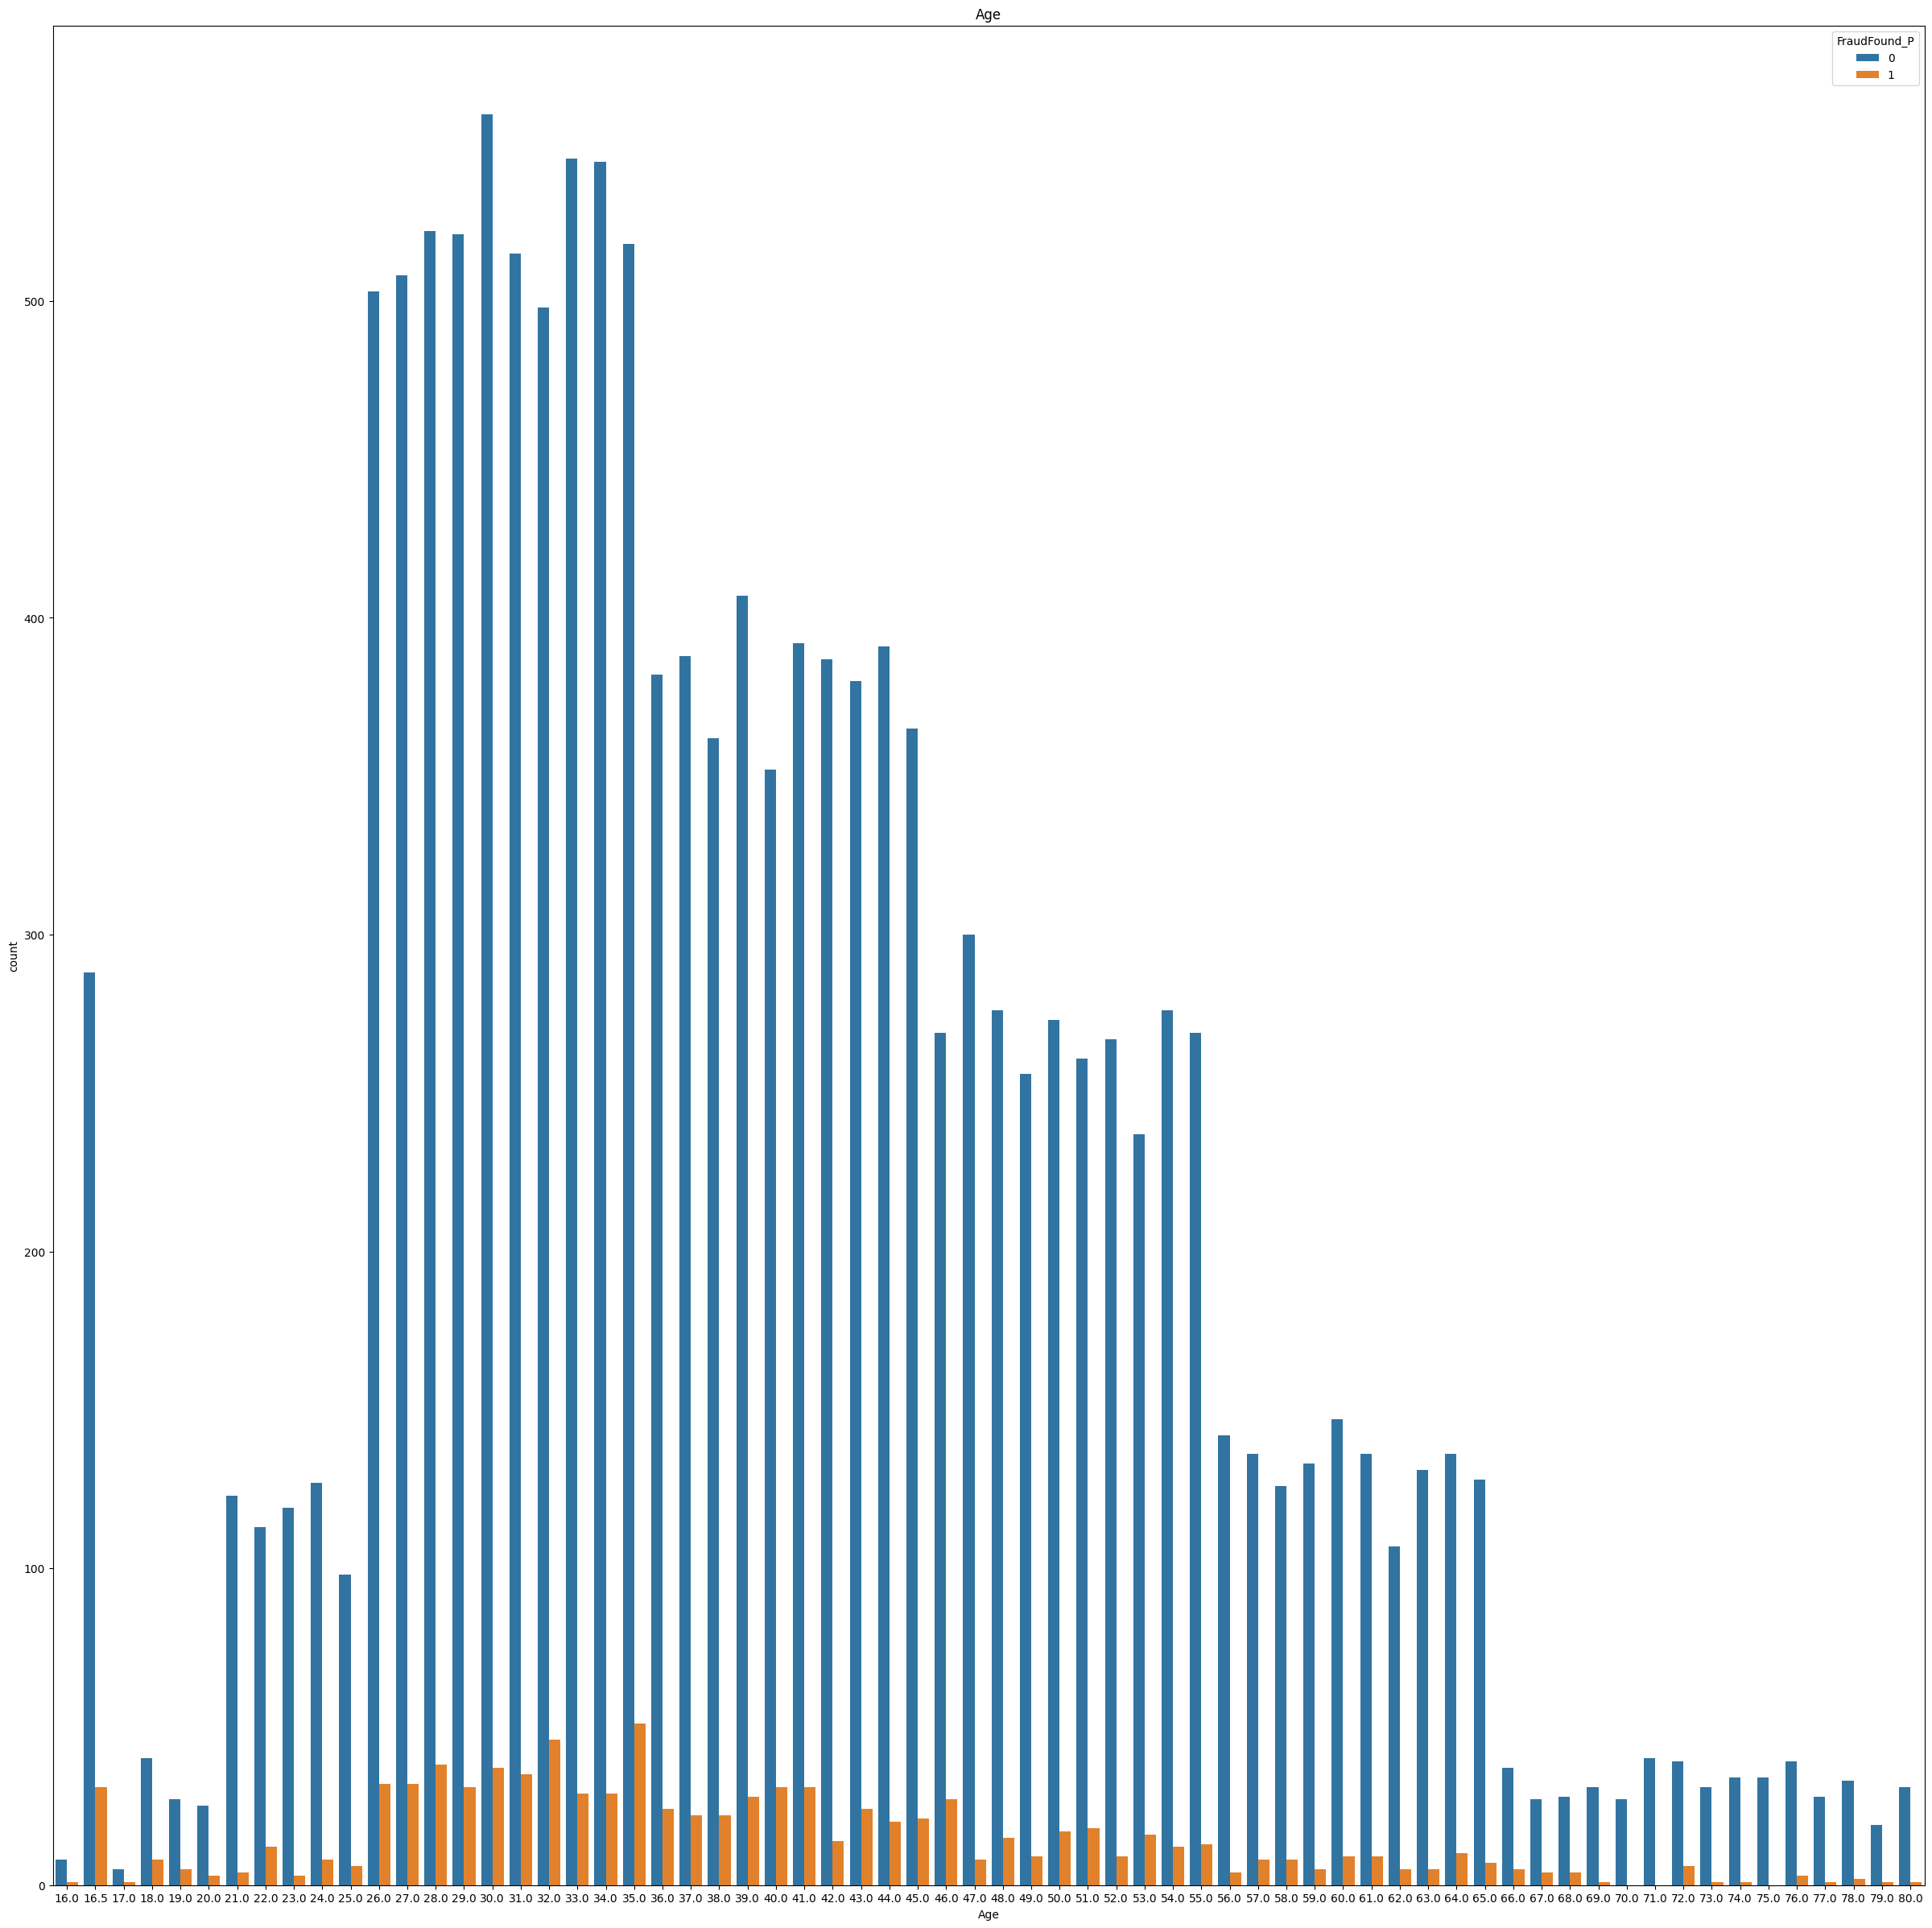

In [ ]:
plt.figure(figsize=(30,30))
order = sorted(data["Age"].unique())
sns.countplot(data=data, x="Age", hue=data["FraudFound_P"], order=order)
plt.title("Age")




*   Most of the accidents were for the age group around 30, which have a higher FraudFound_P positive rate



In [ ]:
def plotPieAndBar(column ,target):
       
   order = sorted(data[column[0]].unique())
       
    
   plt.figure(figsize=(30,15))
   
   plt.subplot(121)
   sns.countplot(data=data, x=column[0], hue=target, order=order)
   plt.title(column[0])
   
   plt.subplot(122)
   plt.title(column[0])
   plt.pie(data[column[0]].value_counts()  ,labels=order , autopct = '%1.2f%%')

  
    

In [ ]:
def displayPlotPieAndBar(columns ,target):
    for column in columns:
        plotPieAndBar([column] ,data[target])
        

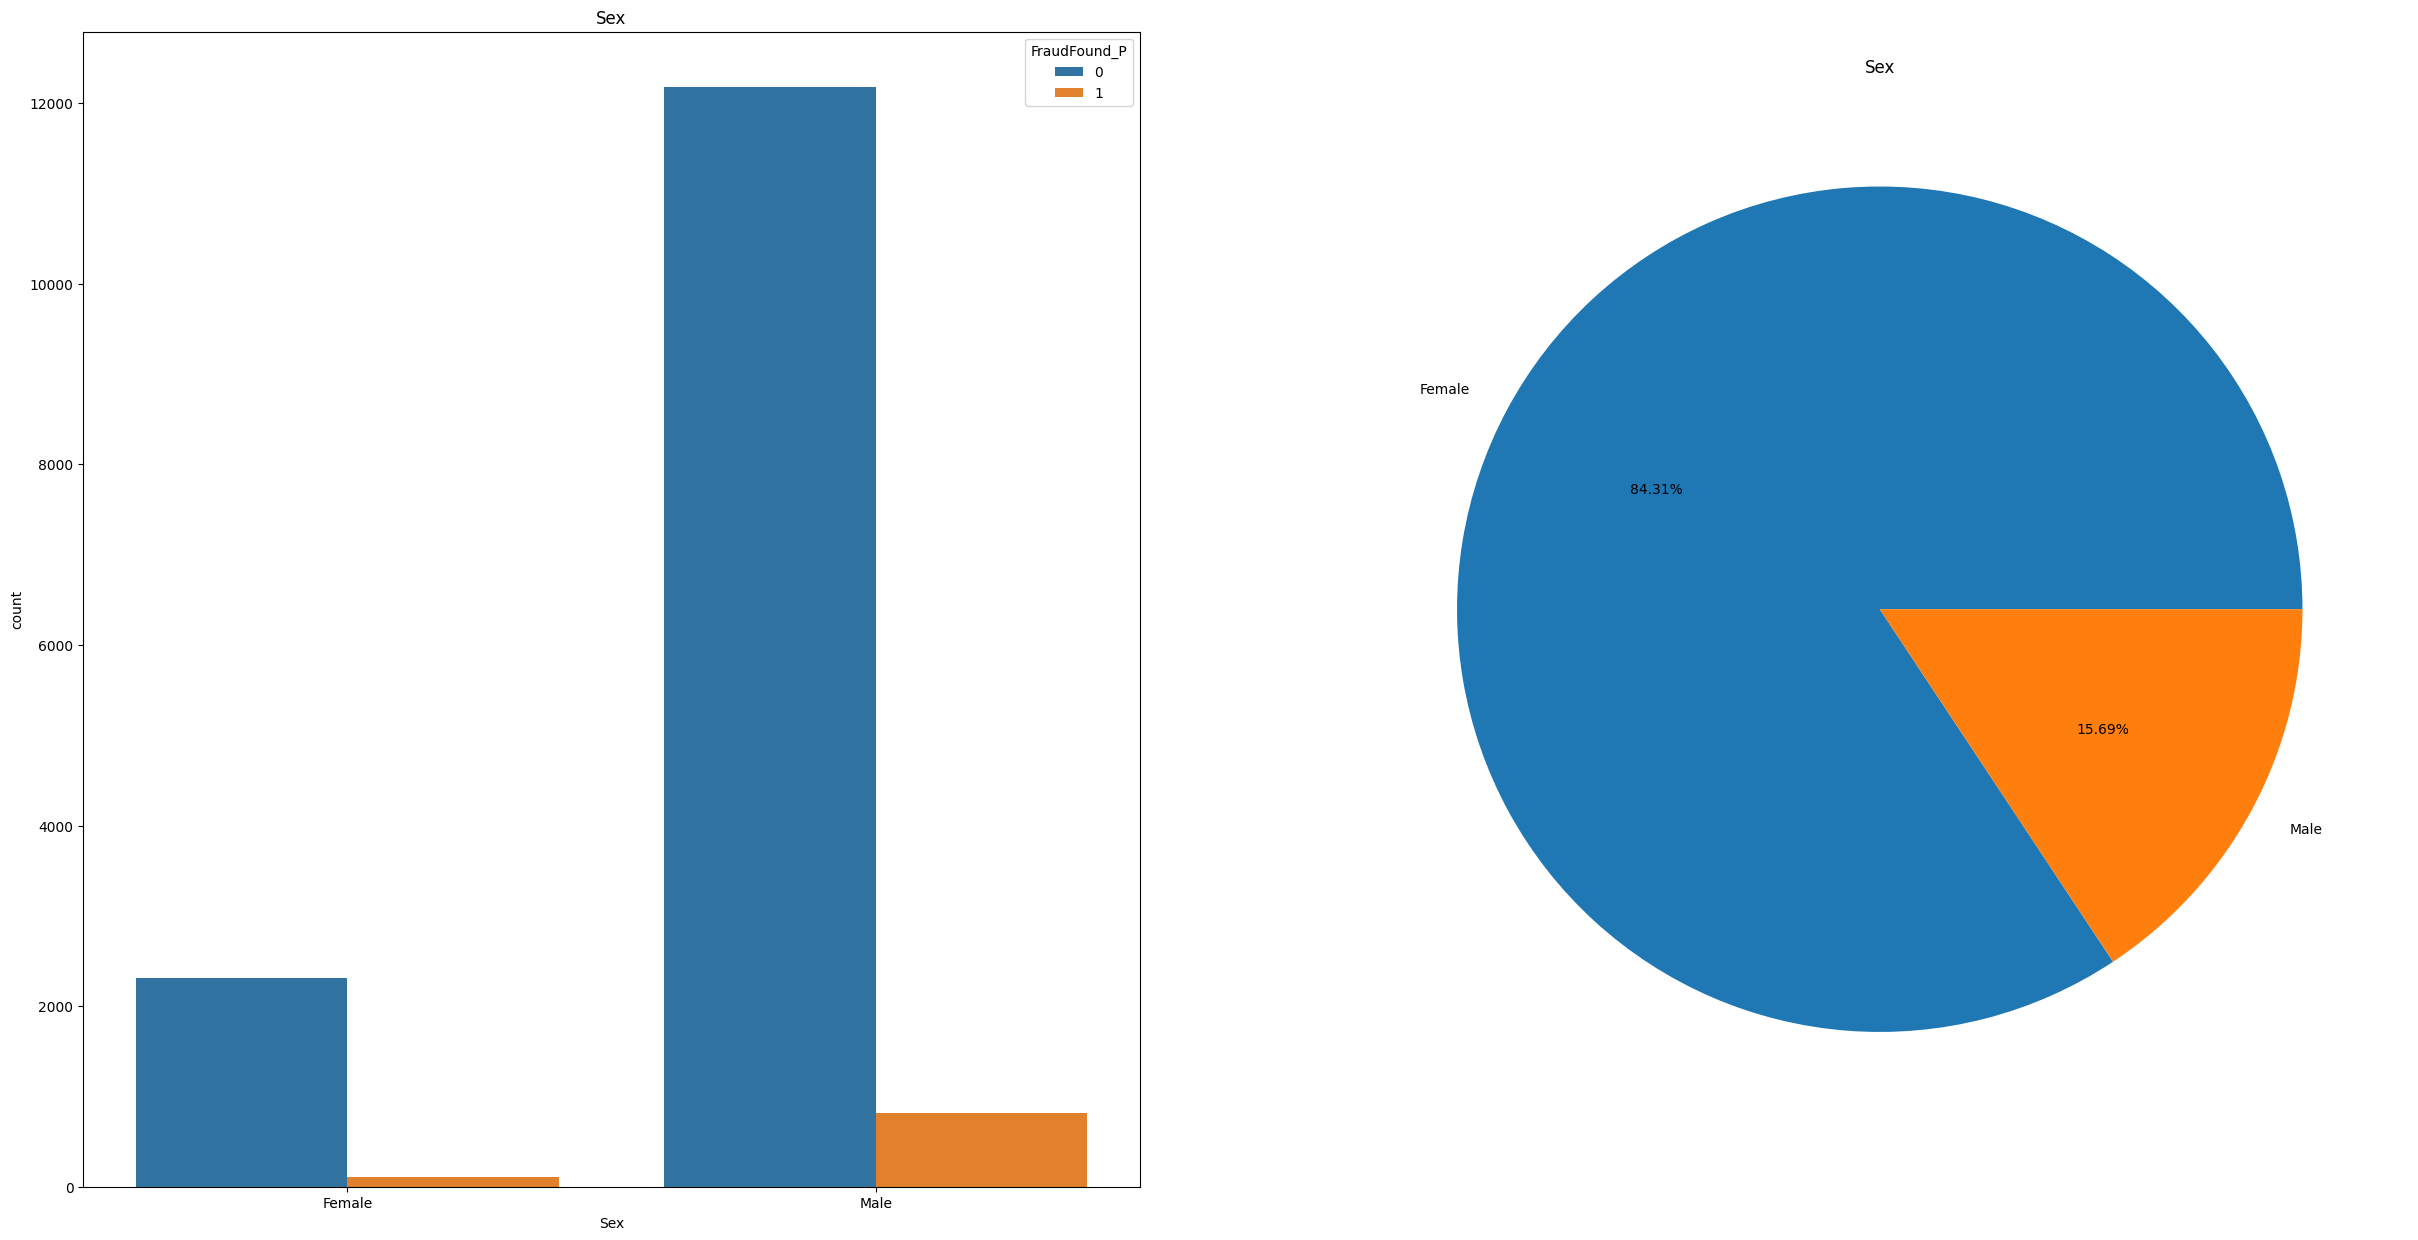

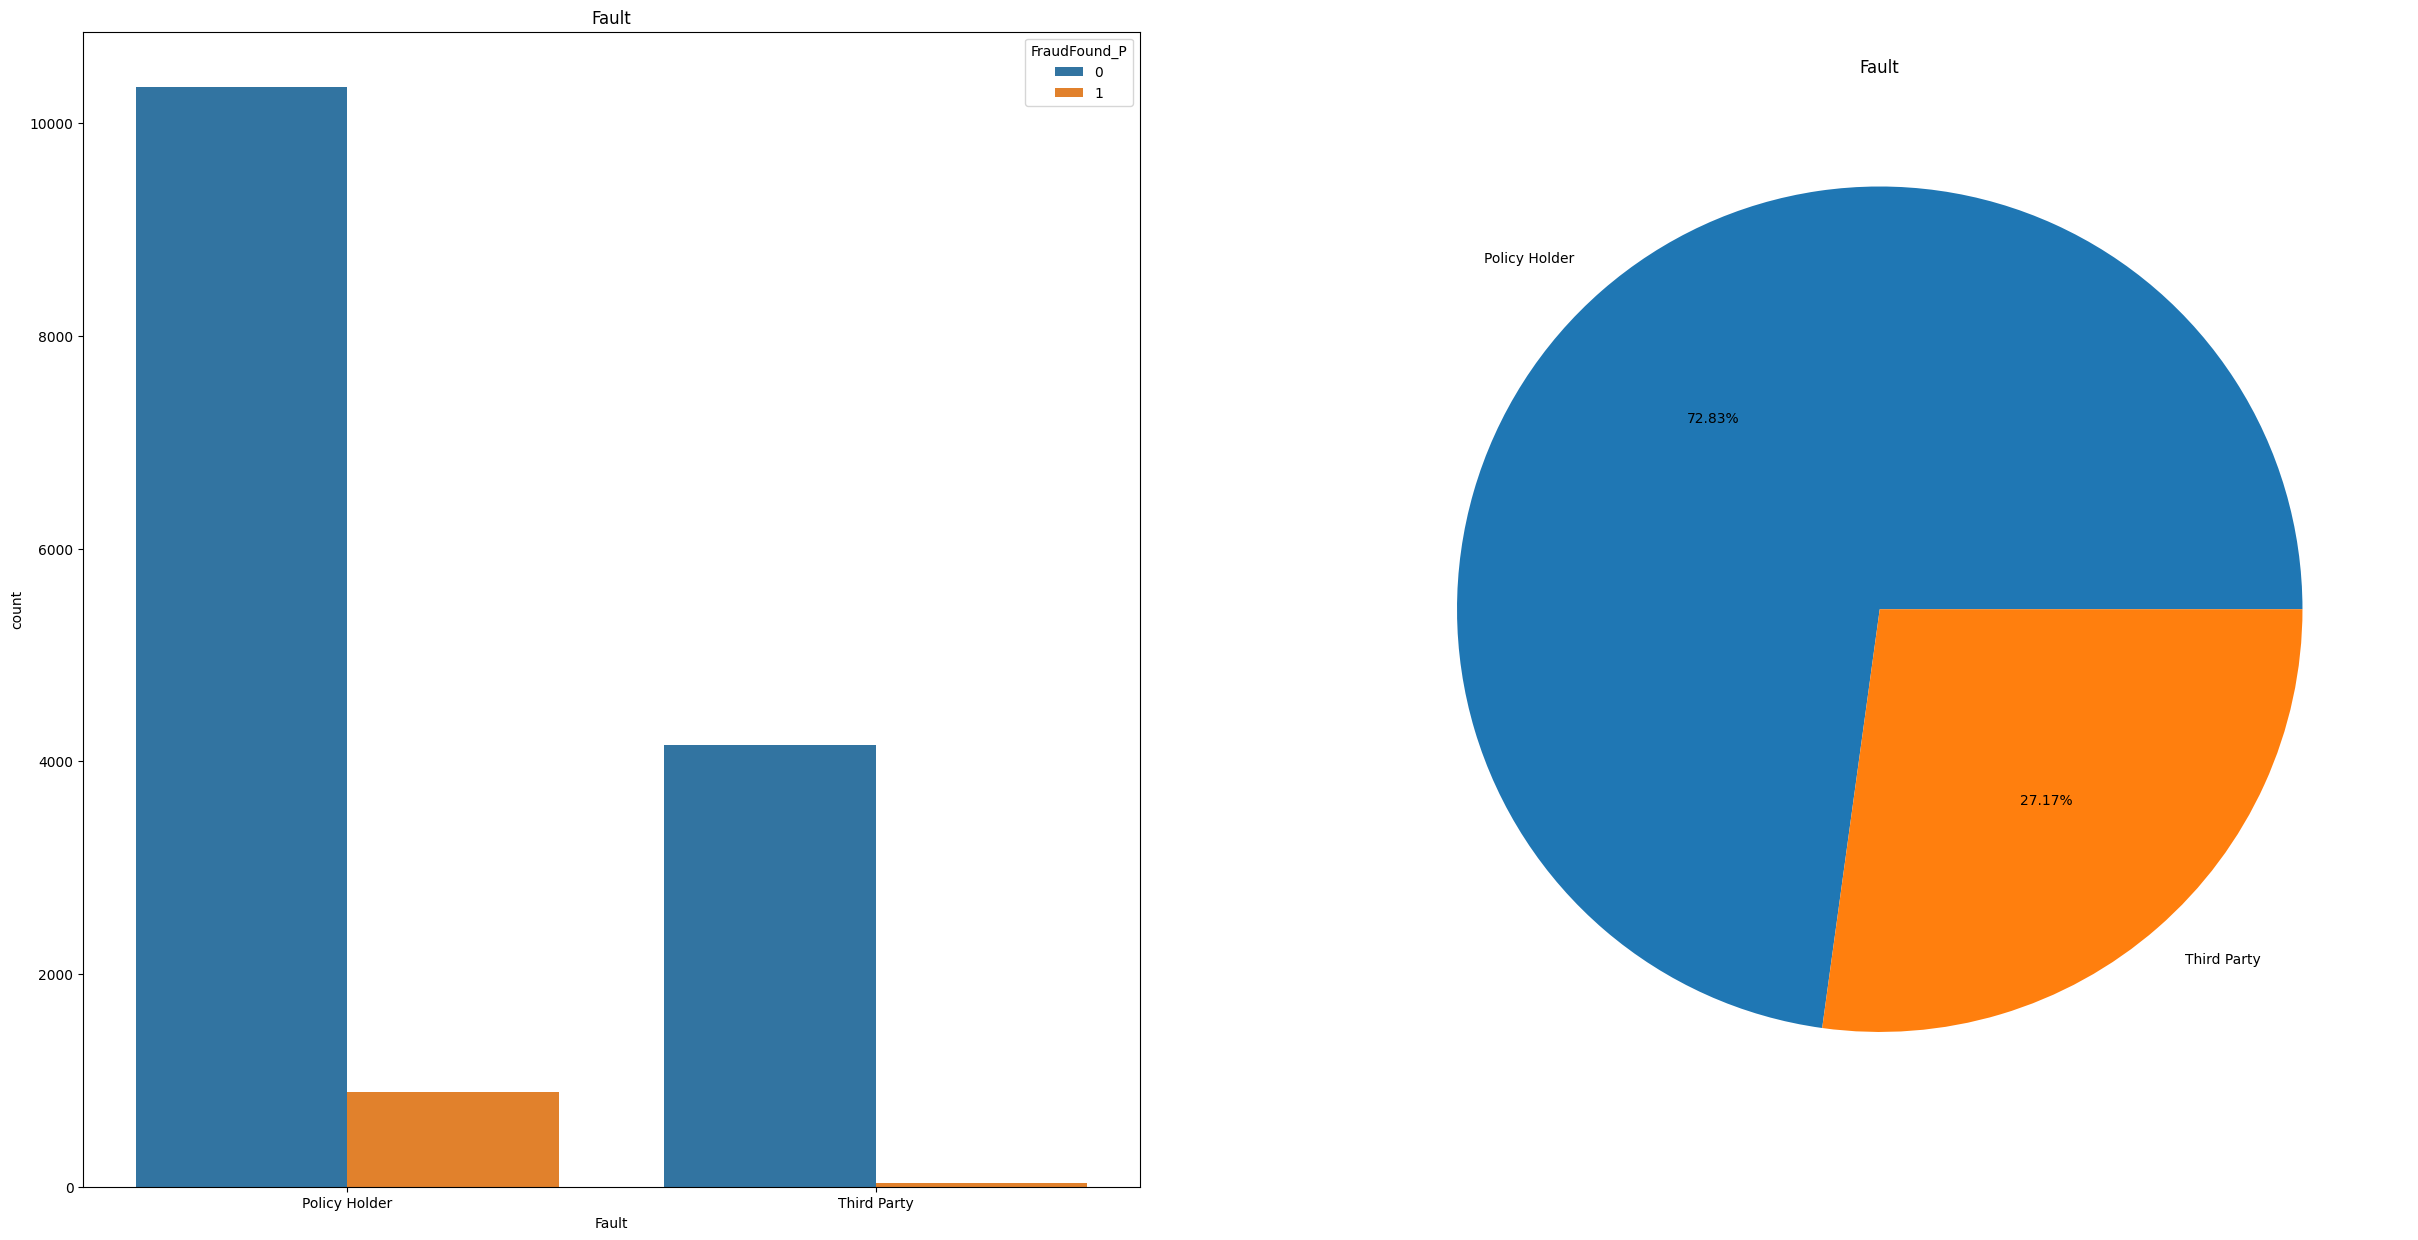

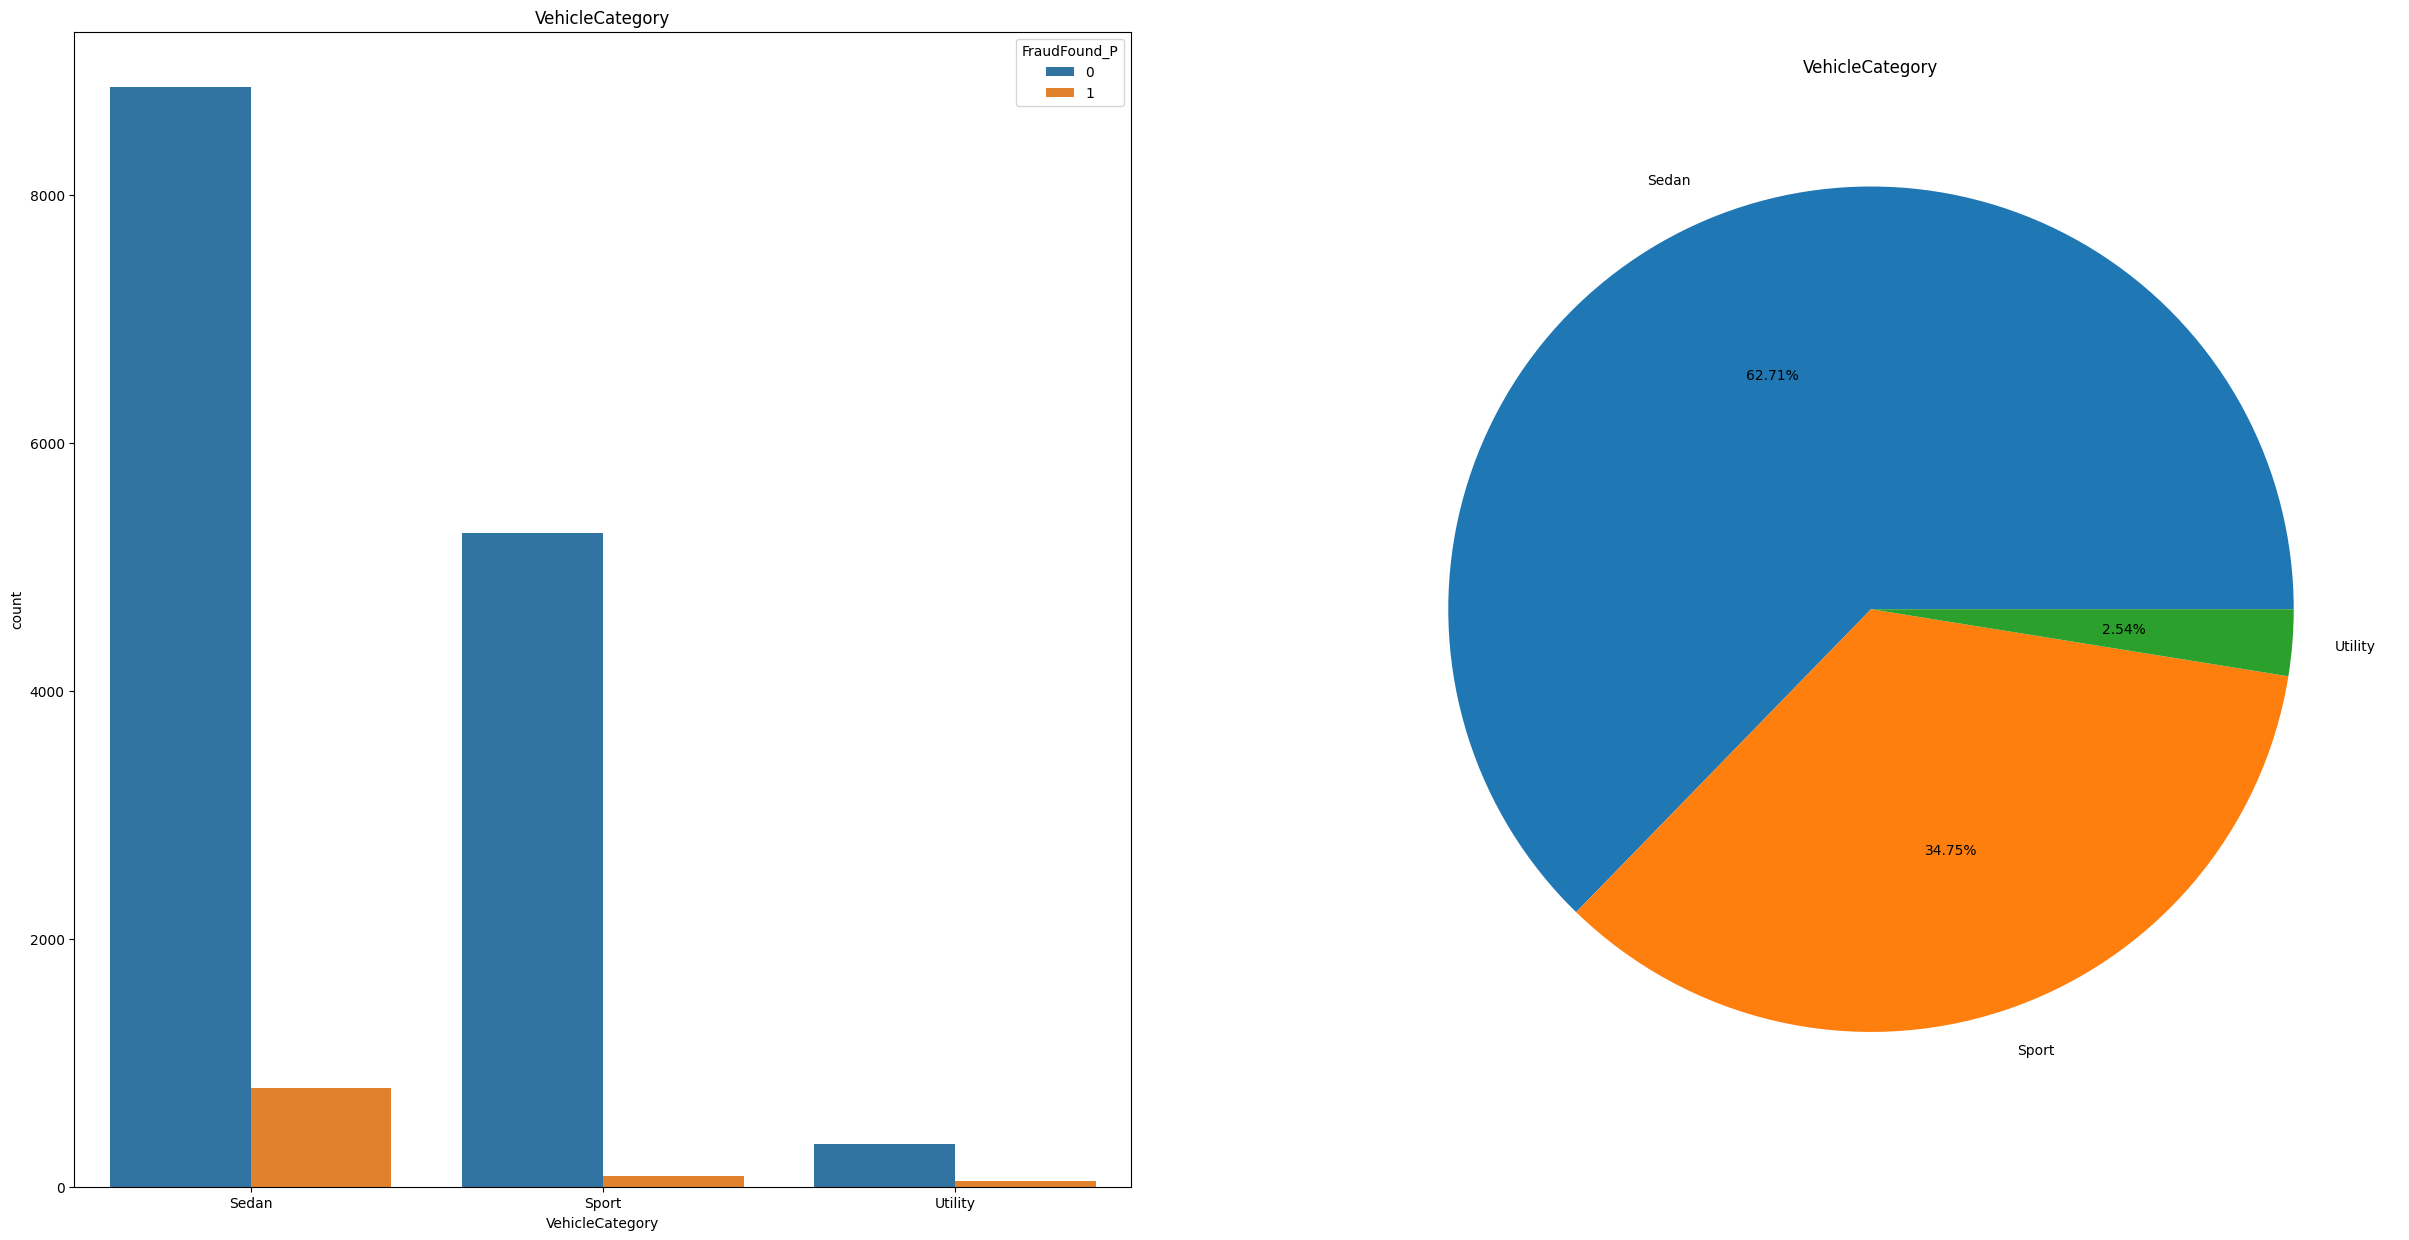

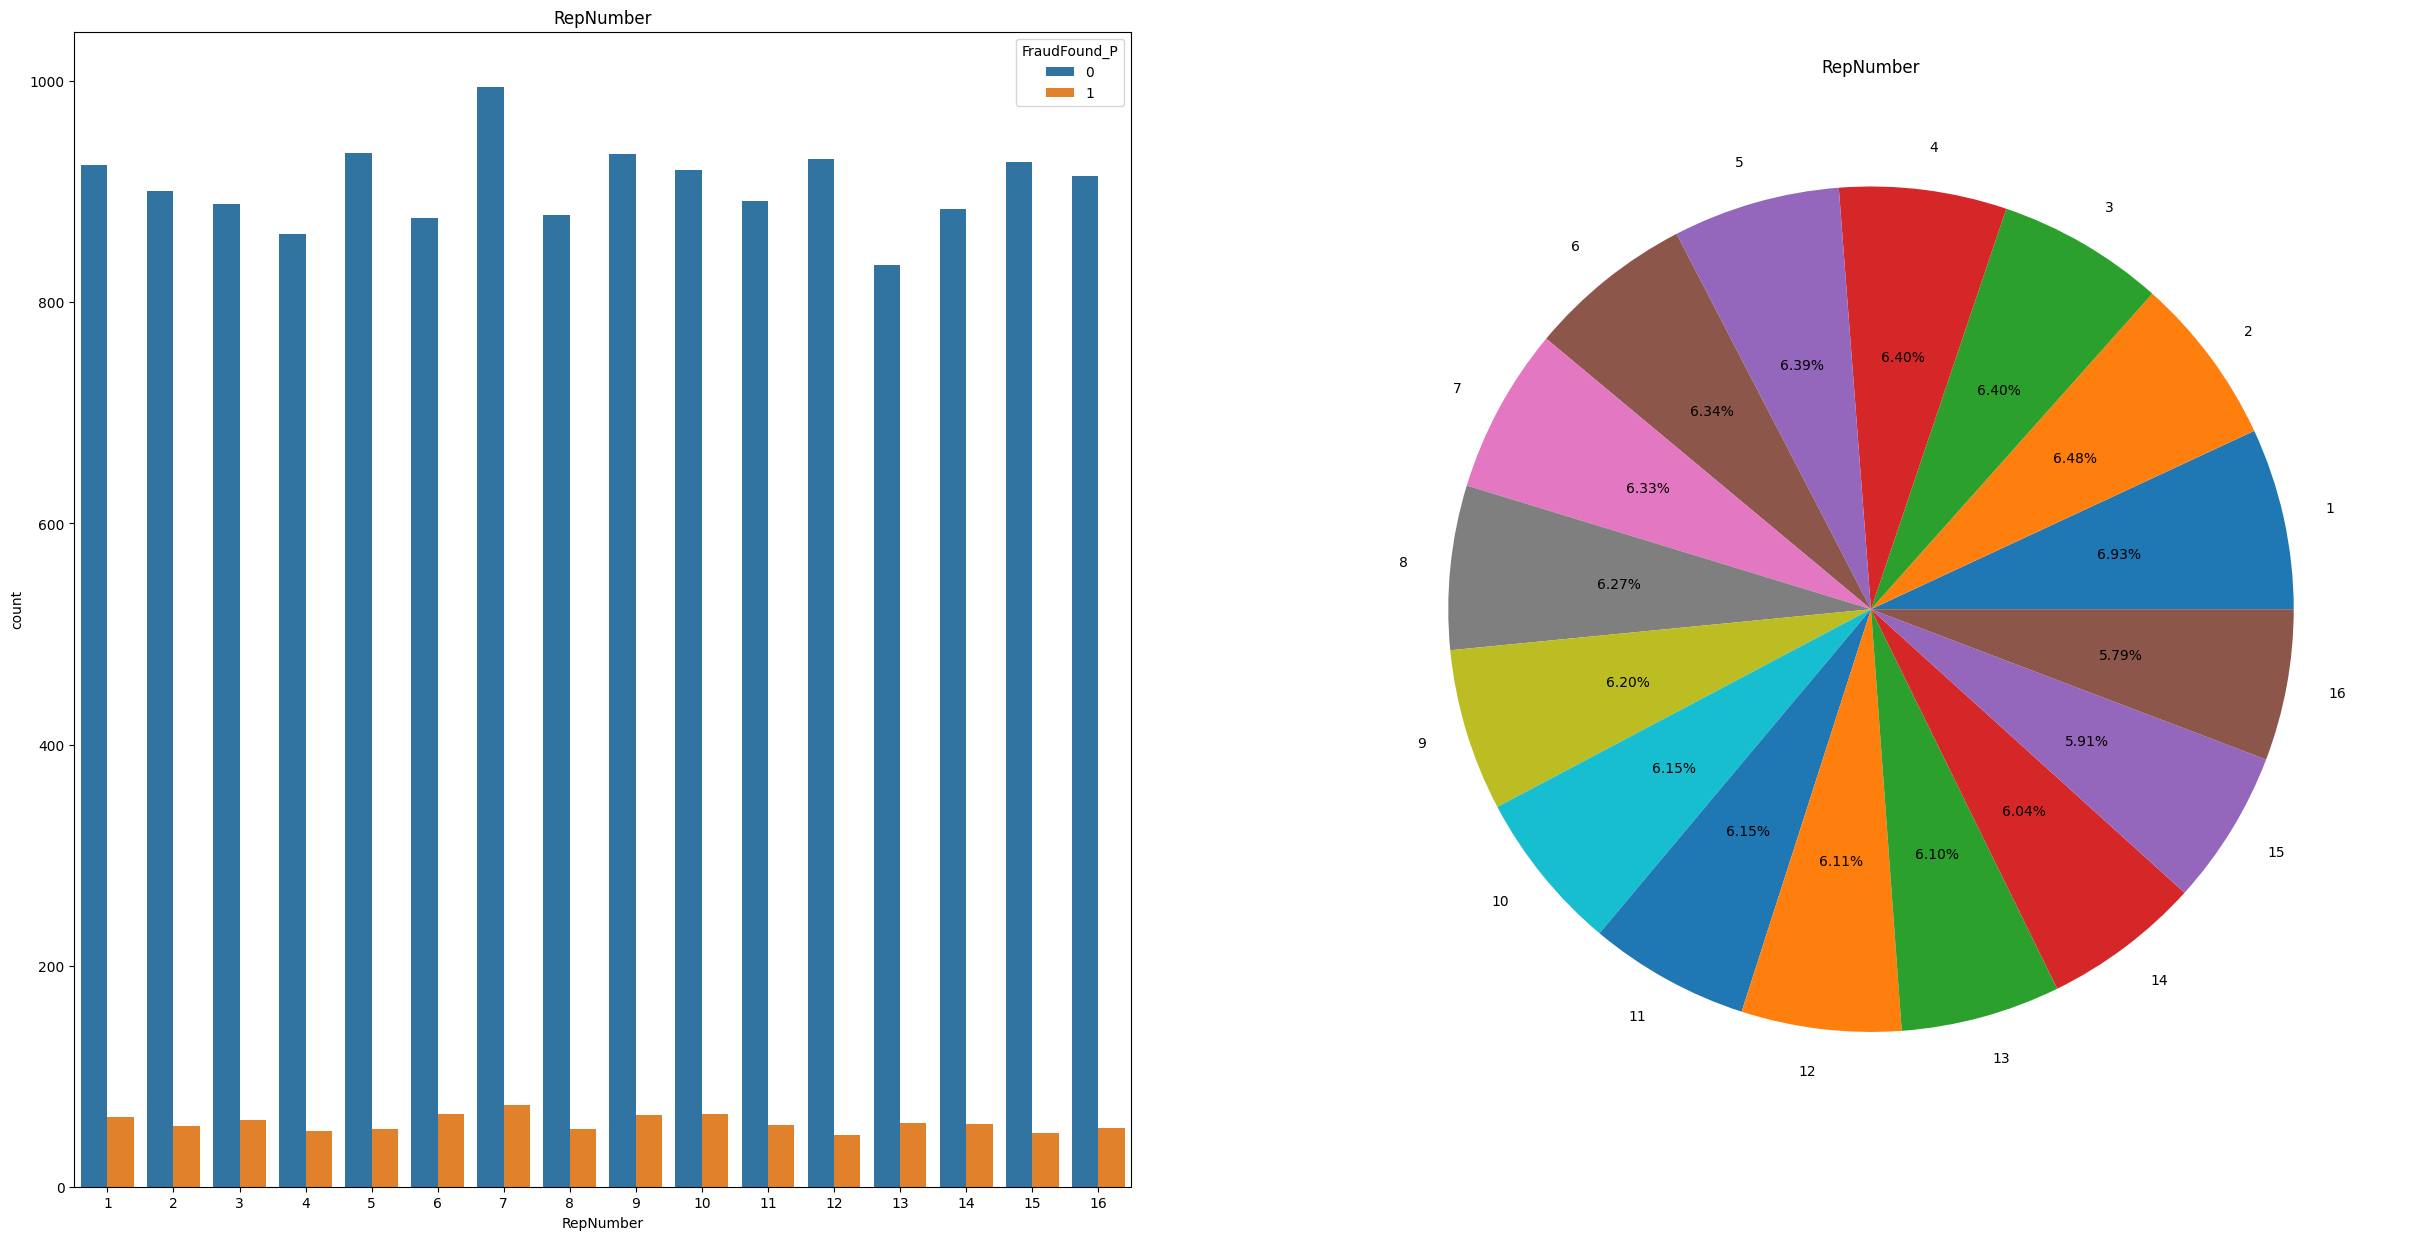

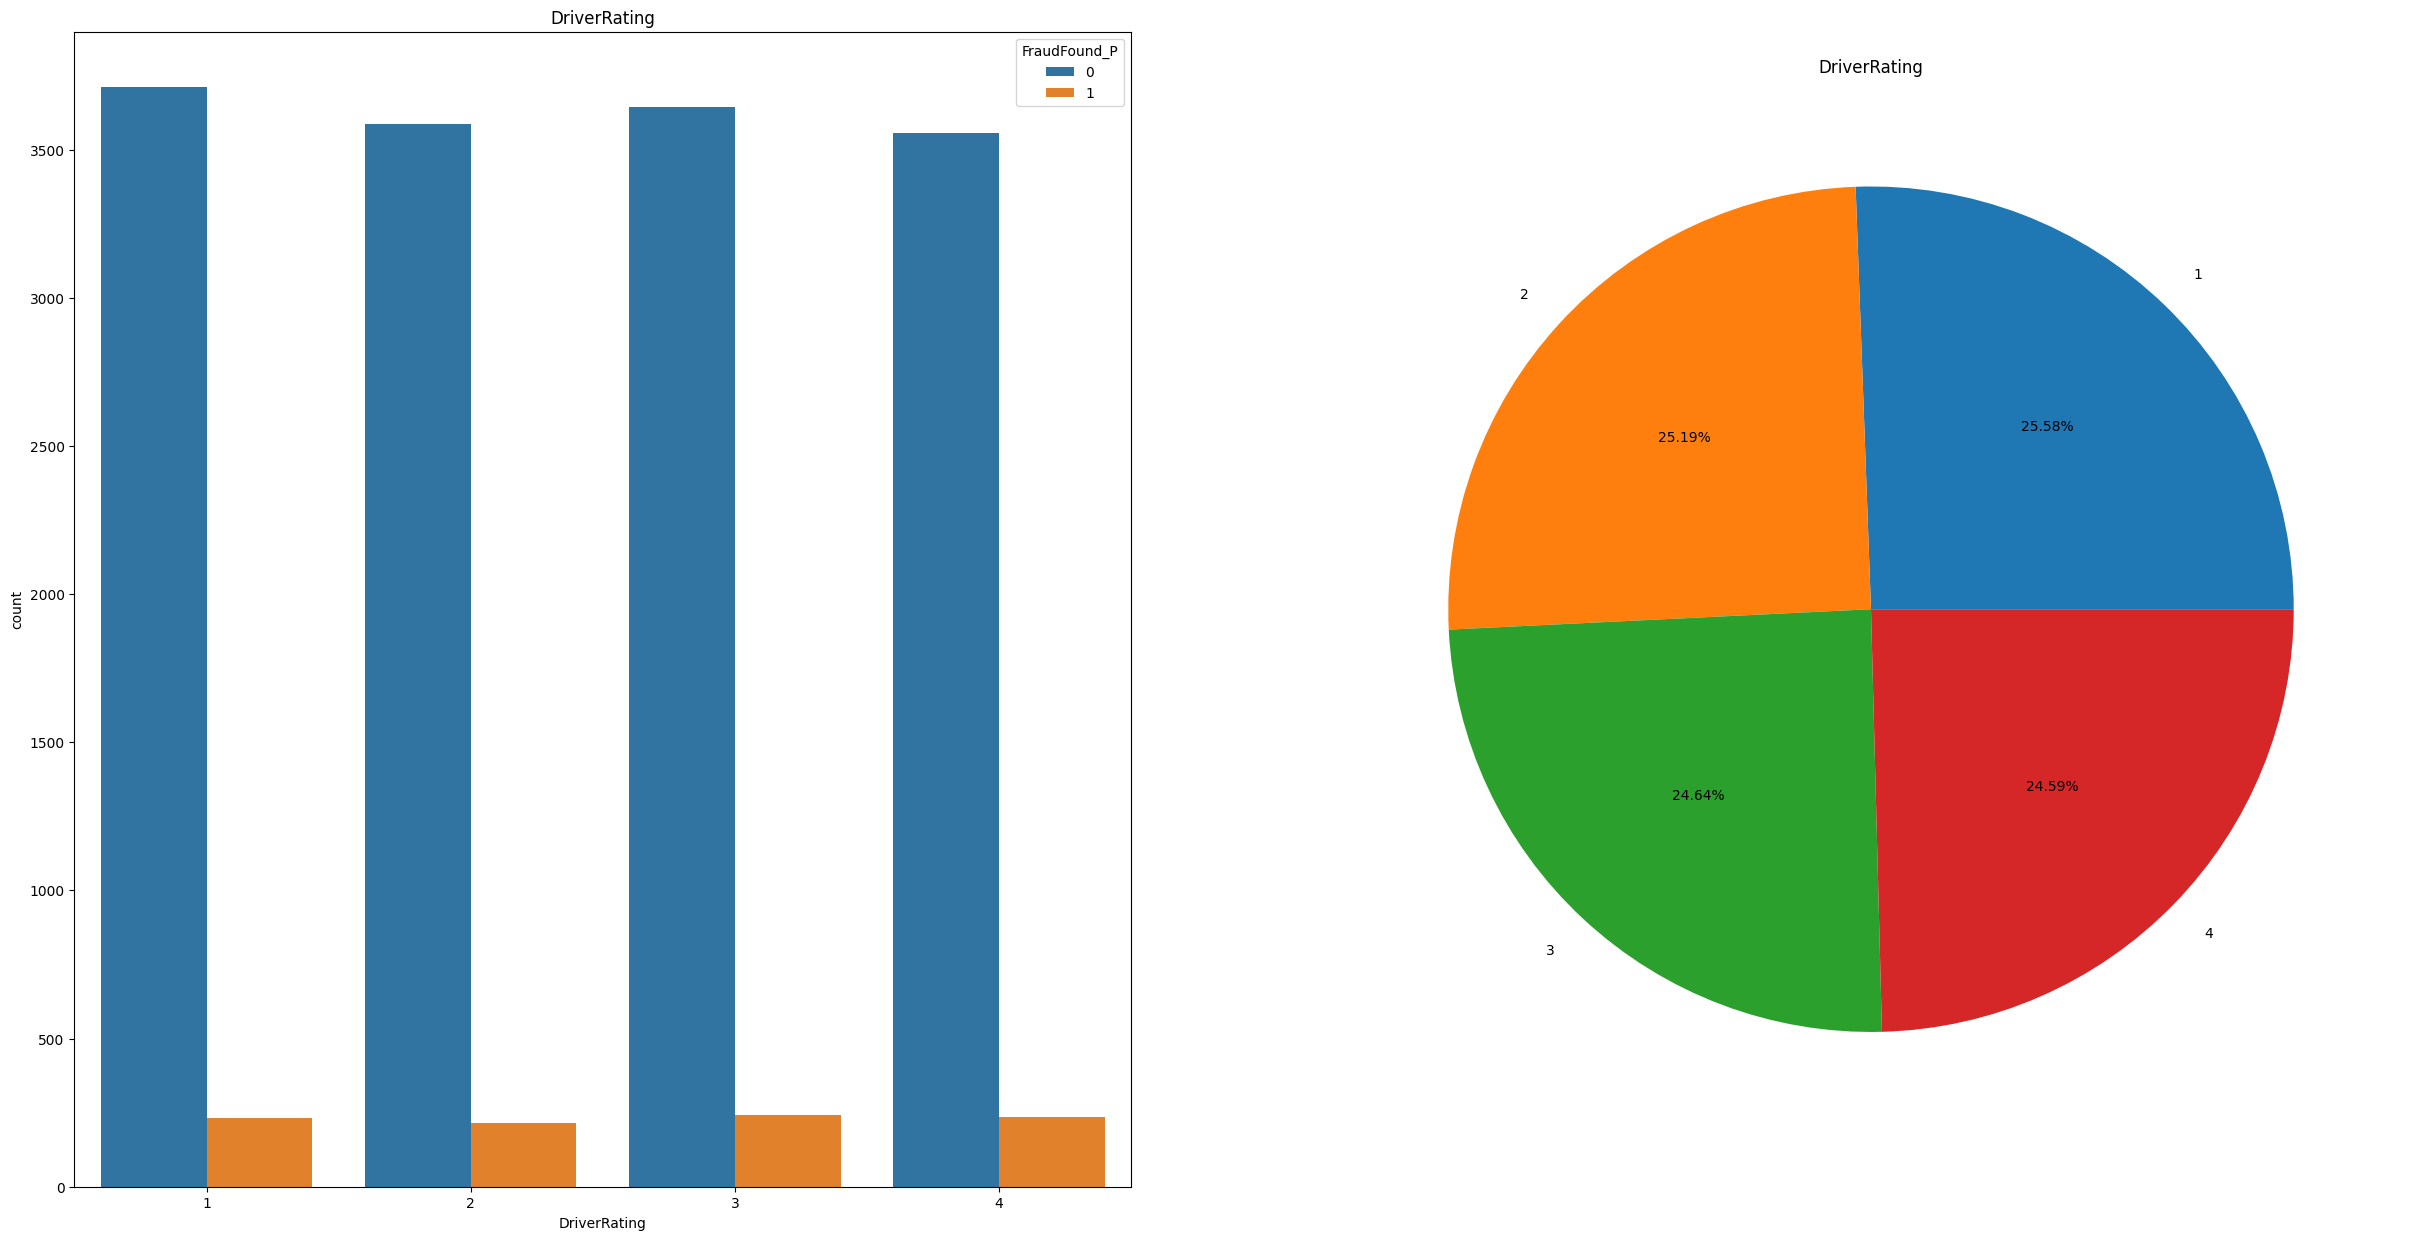

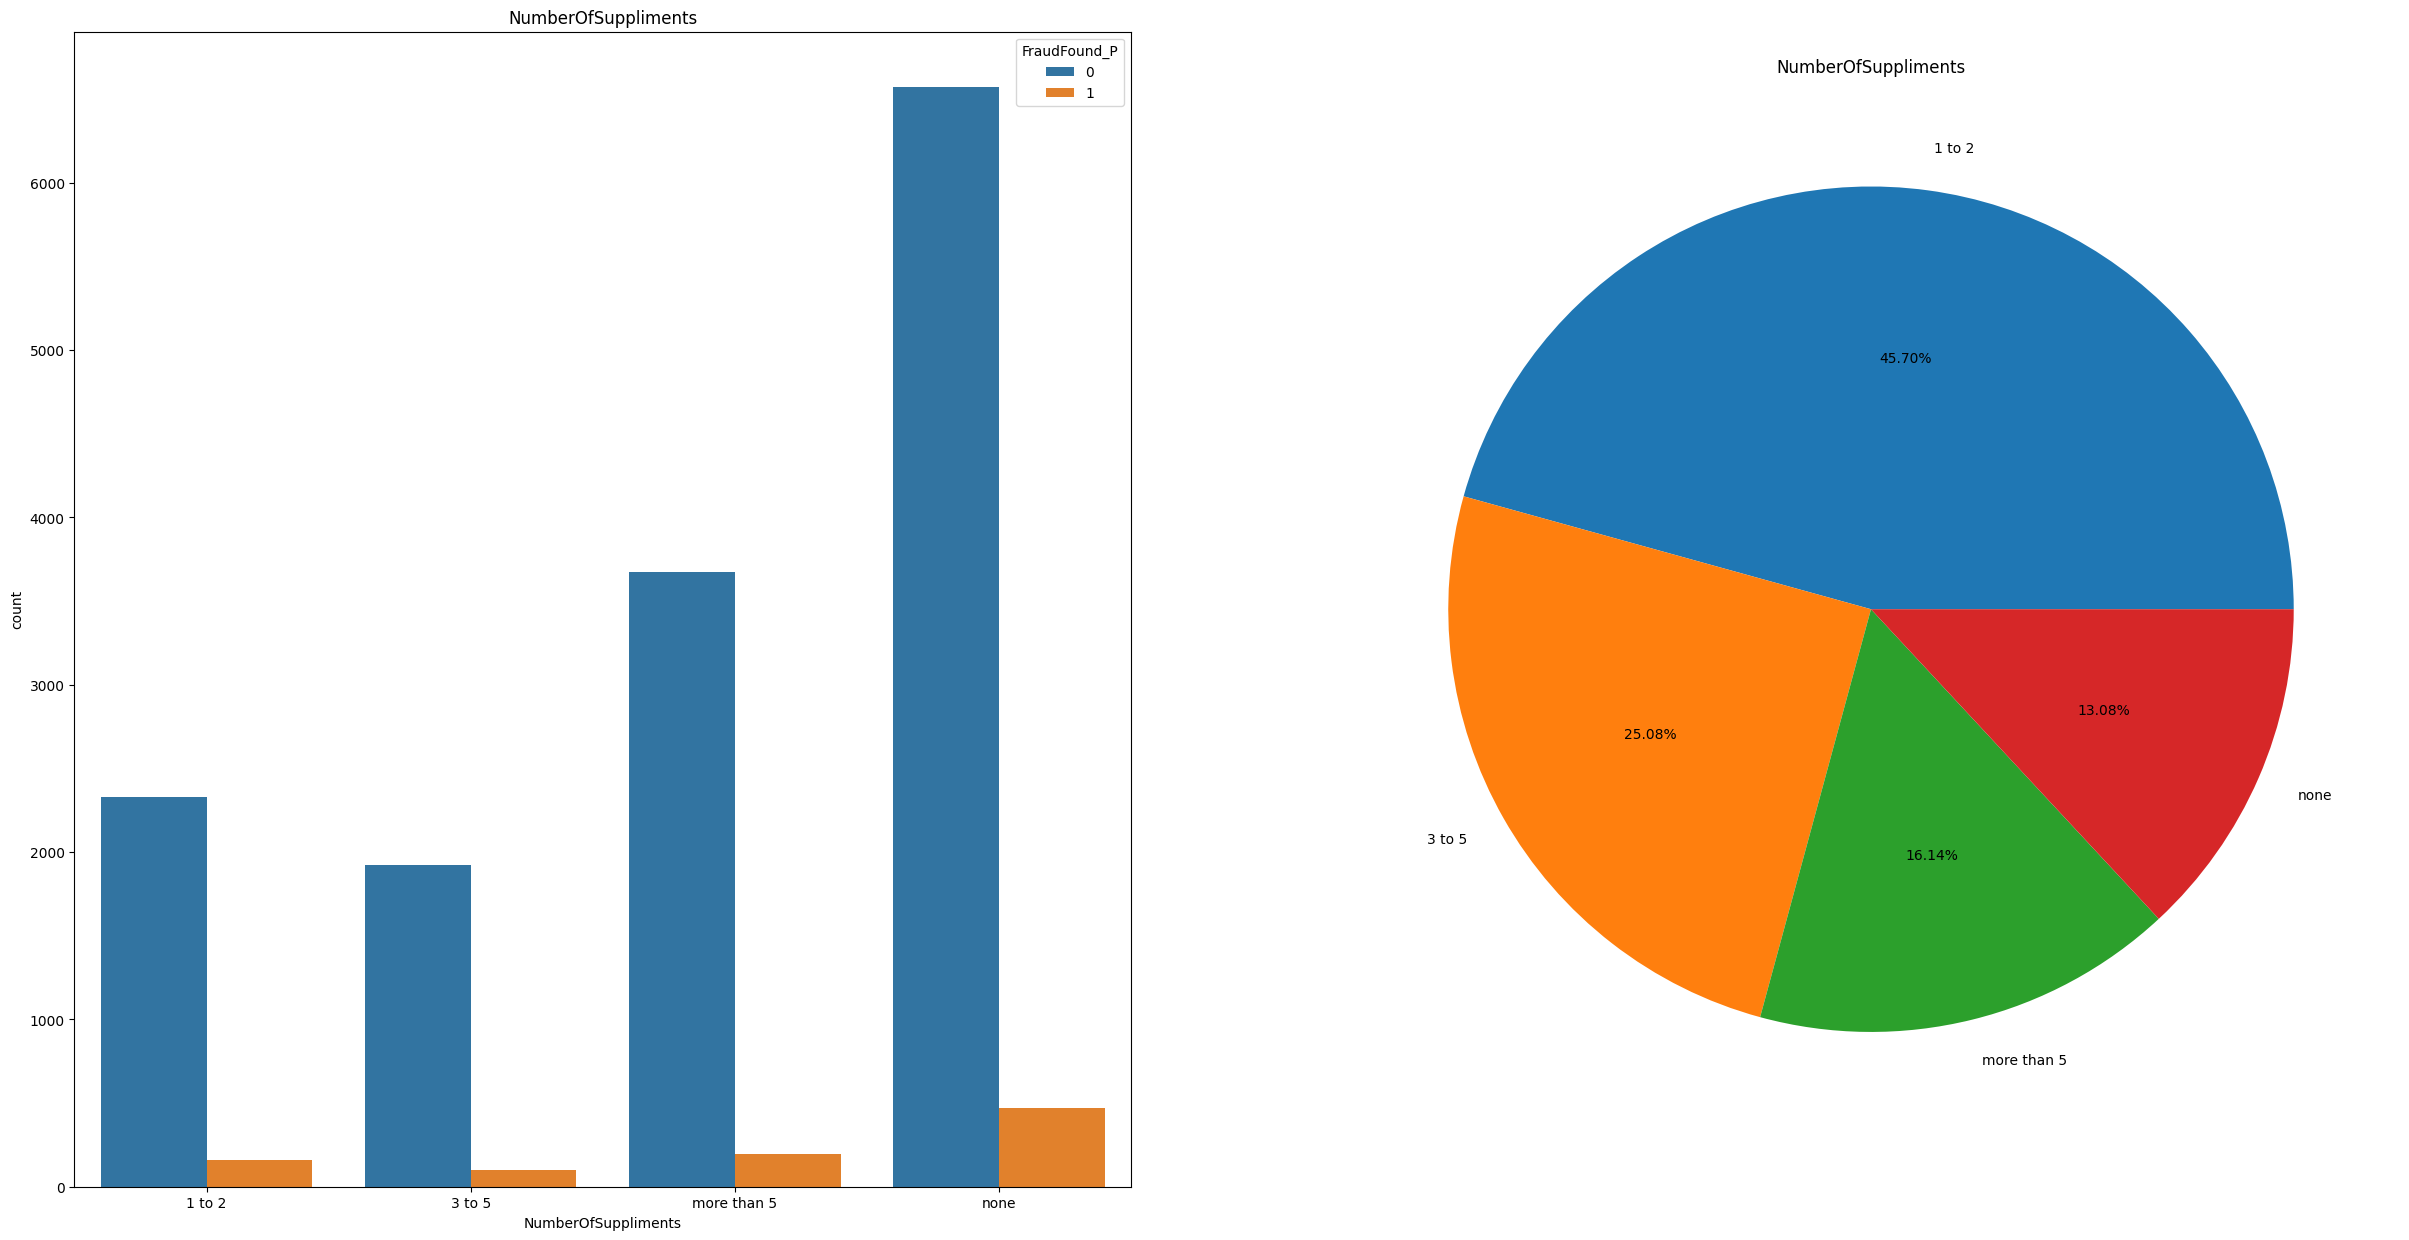

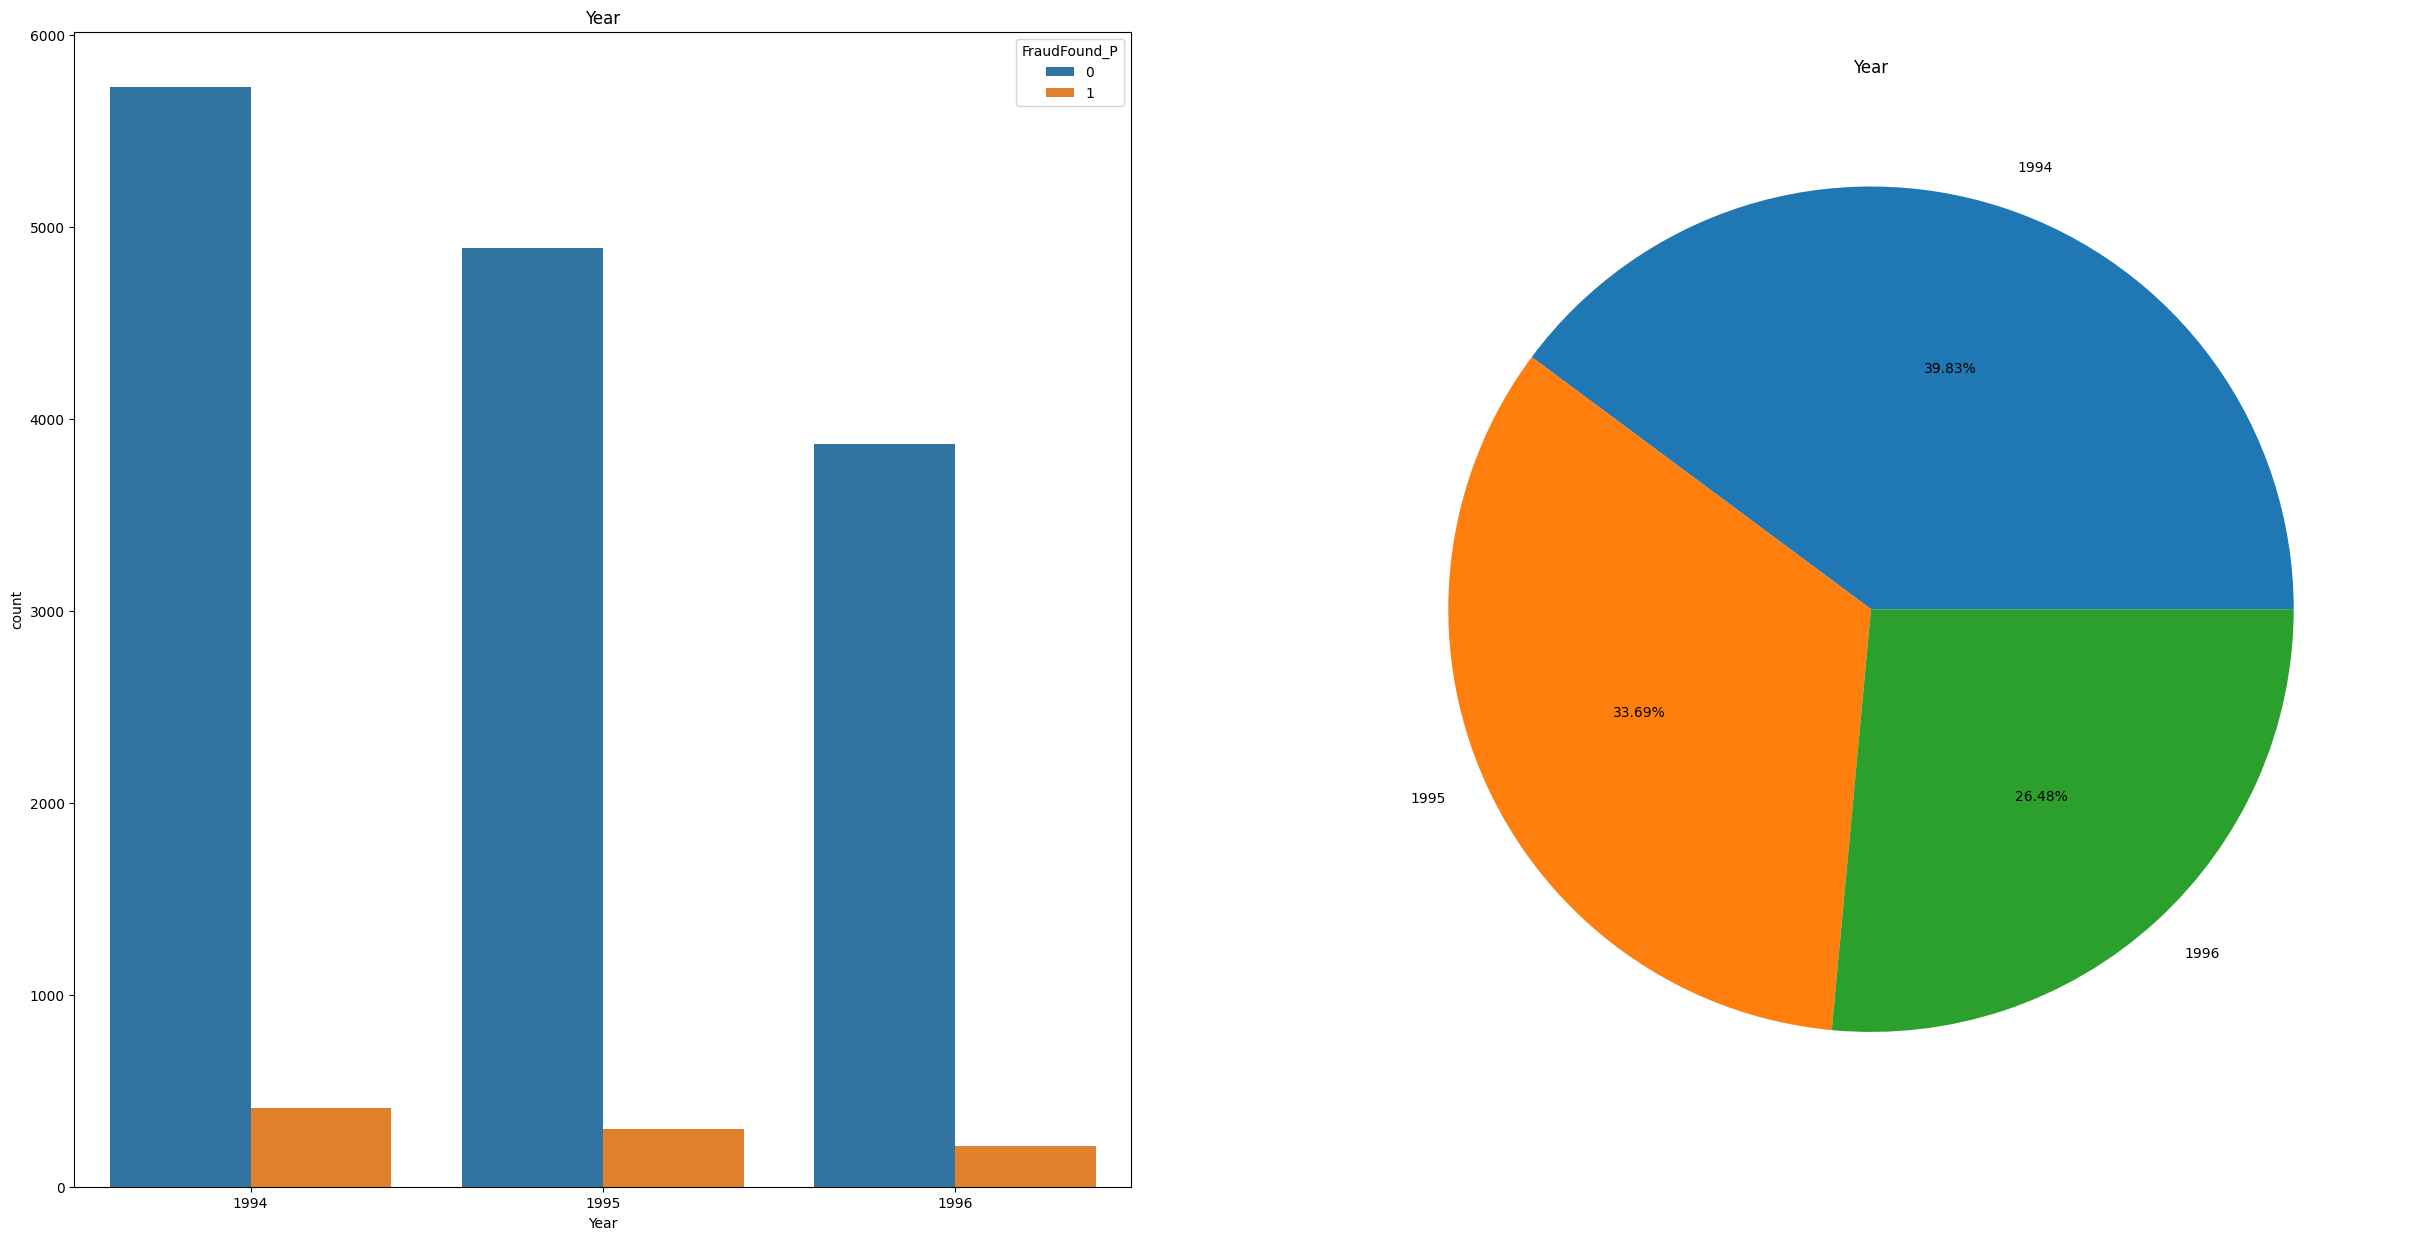

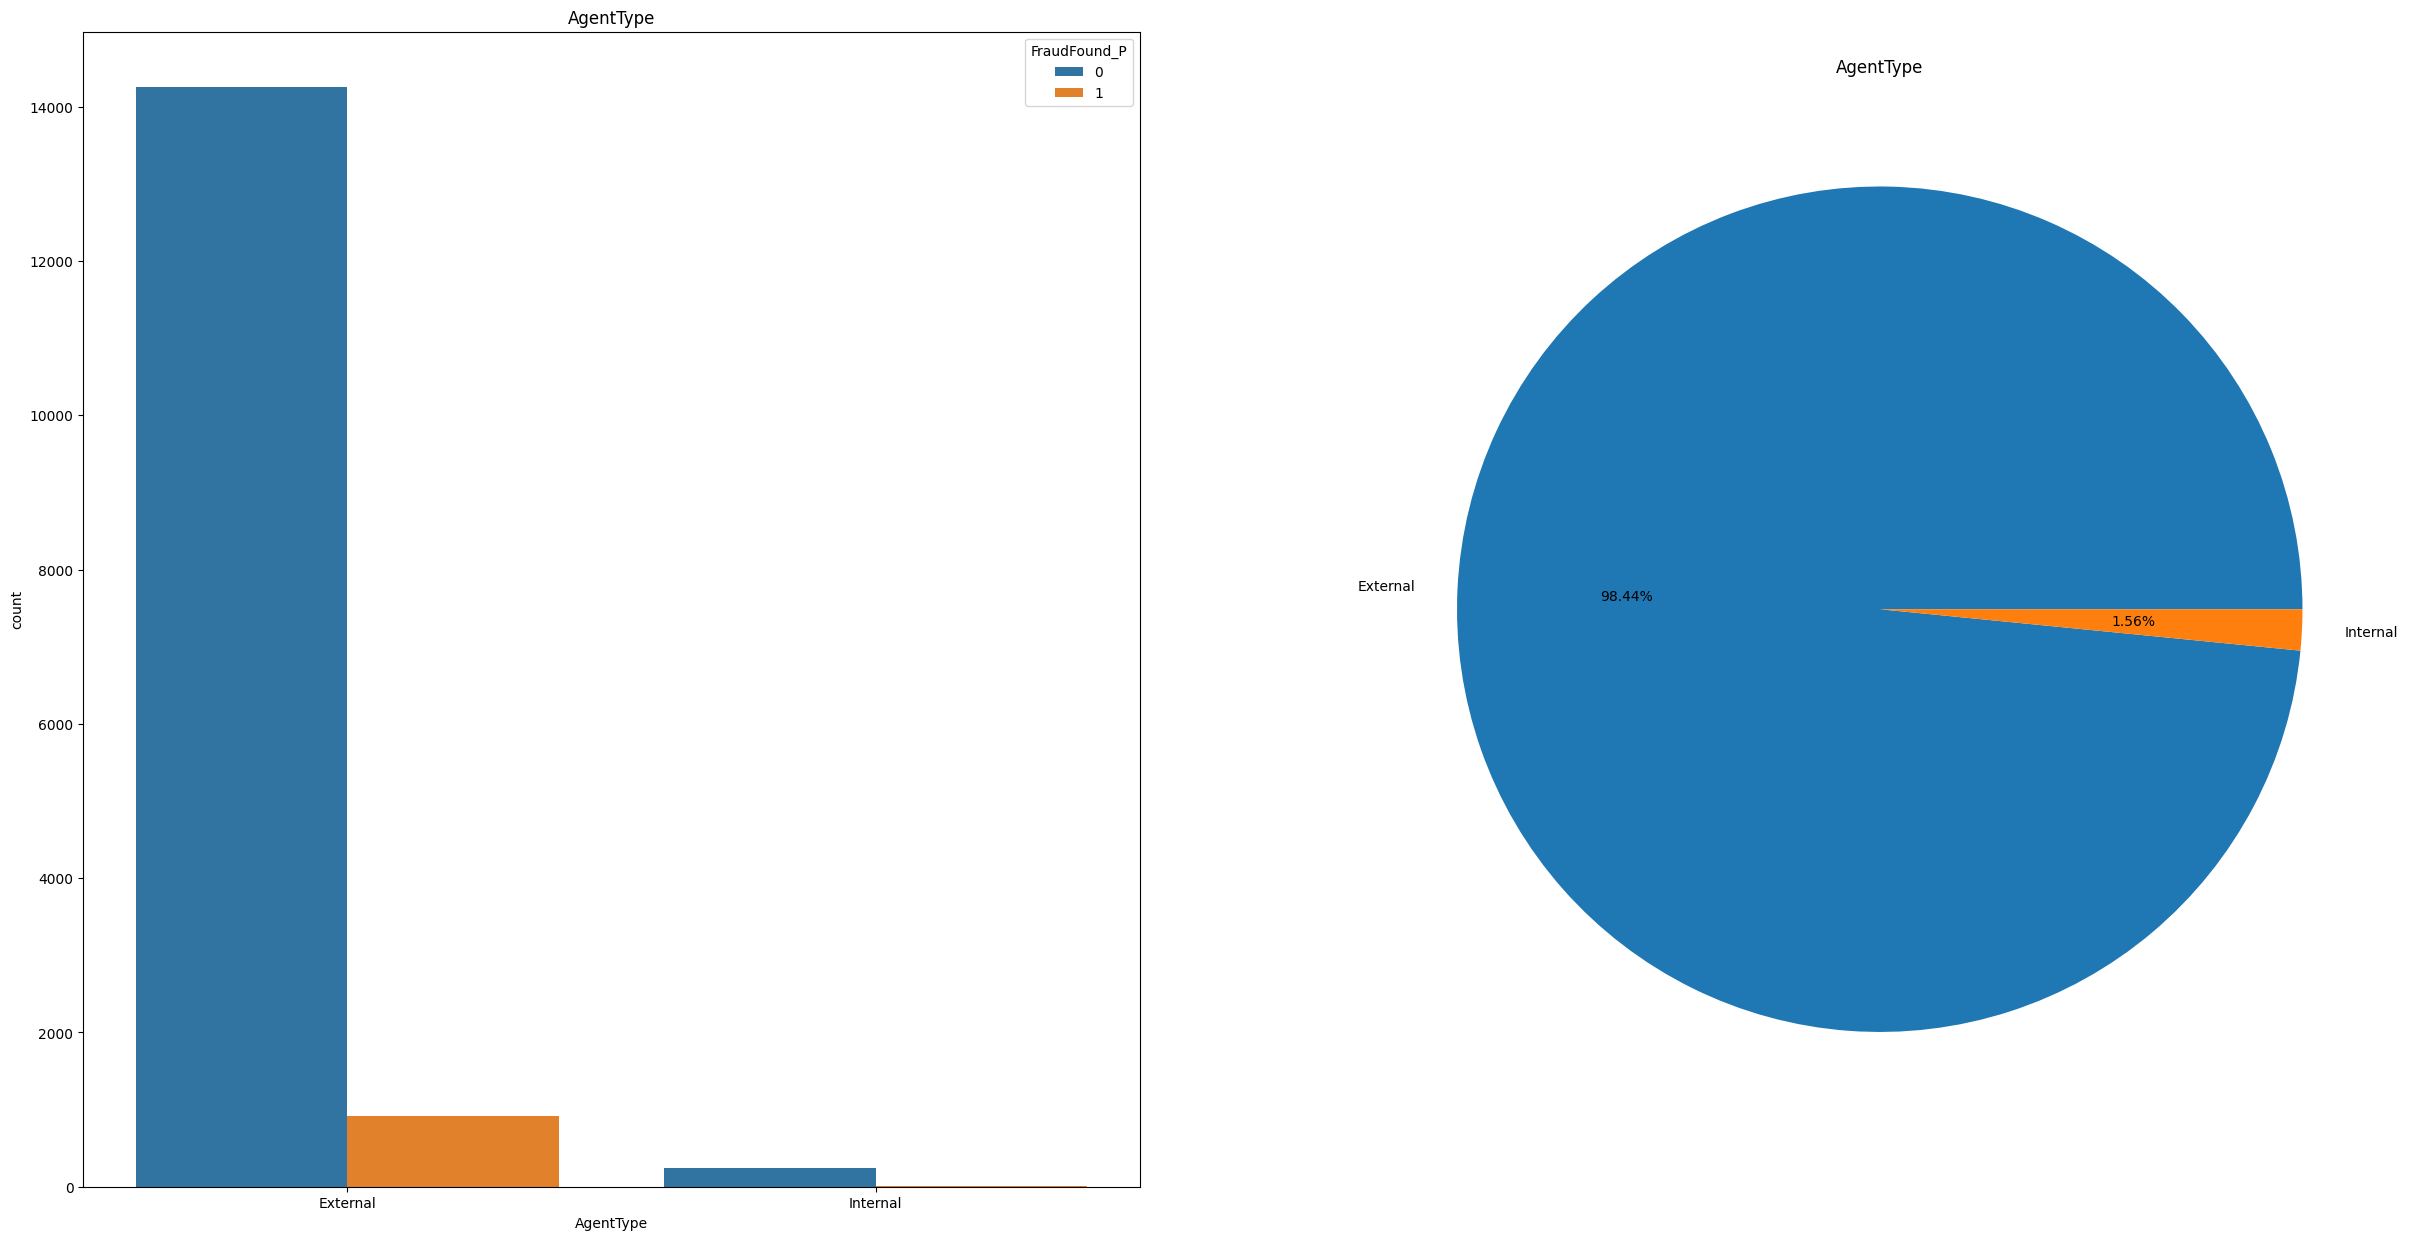

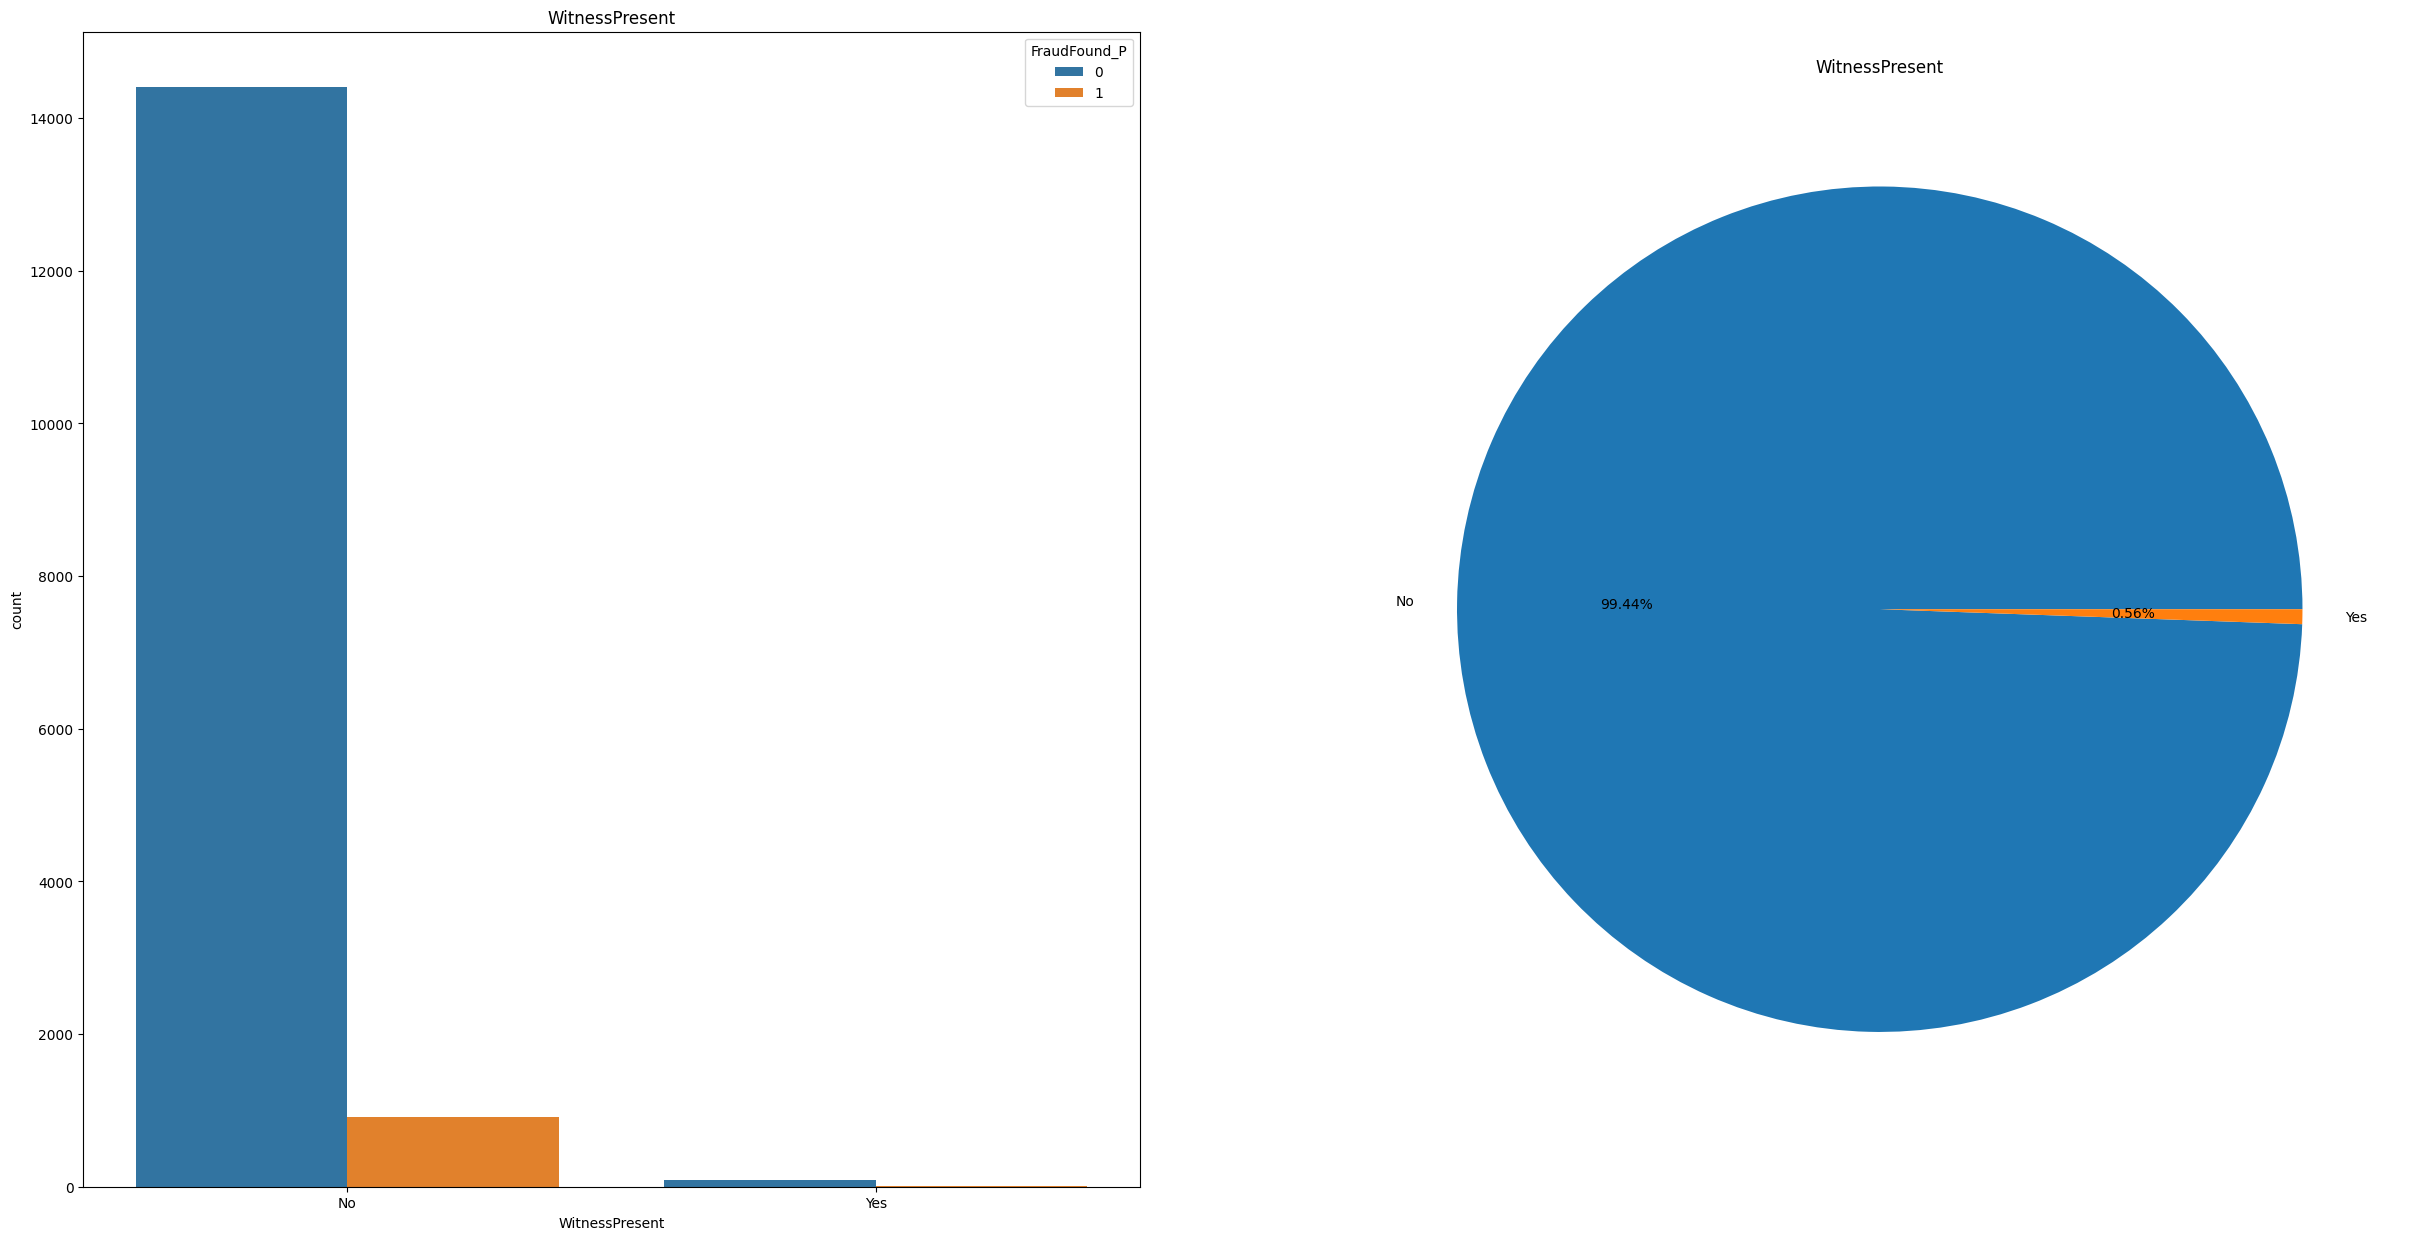

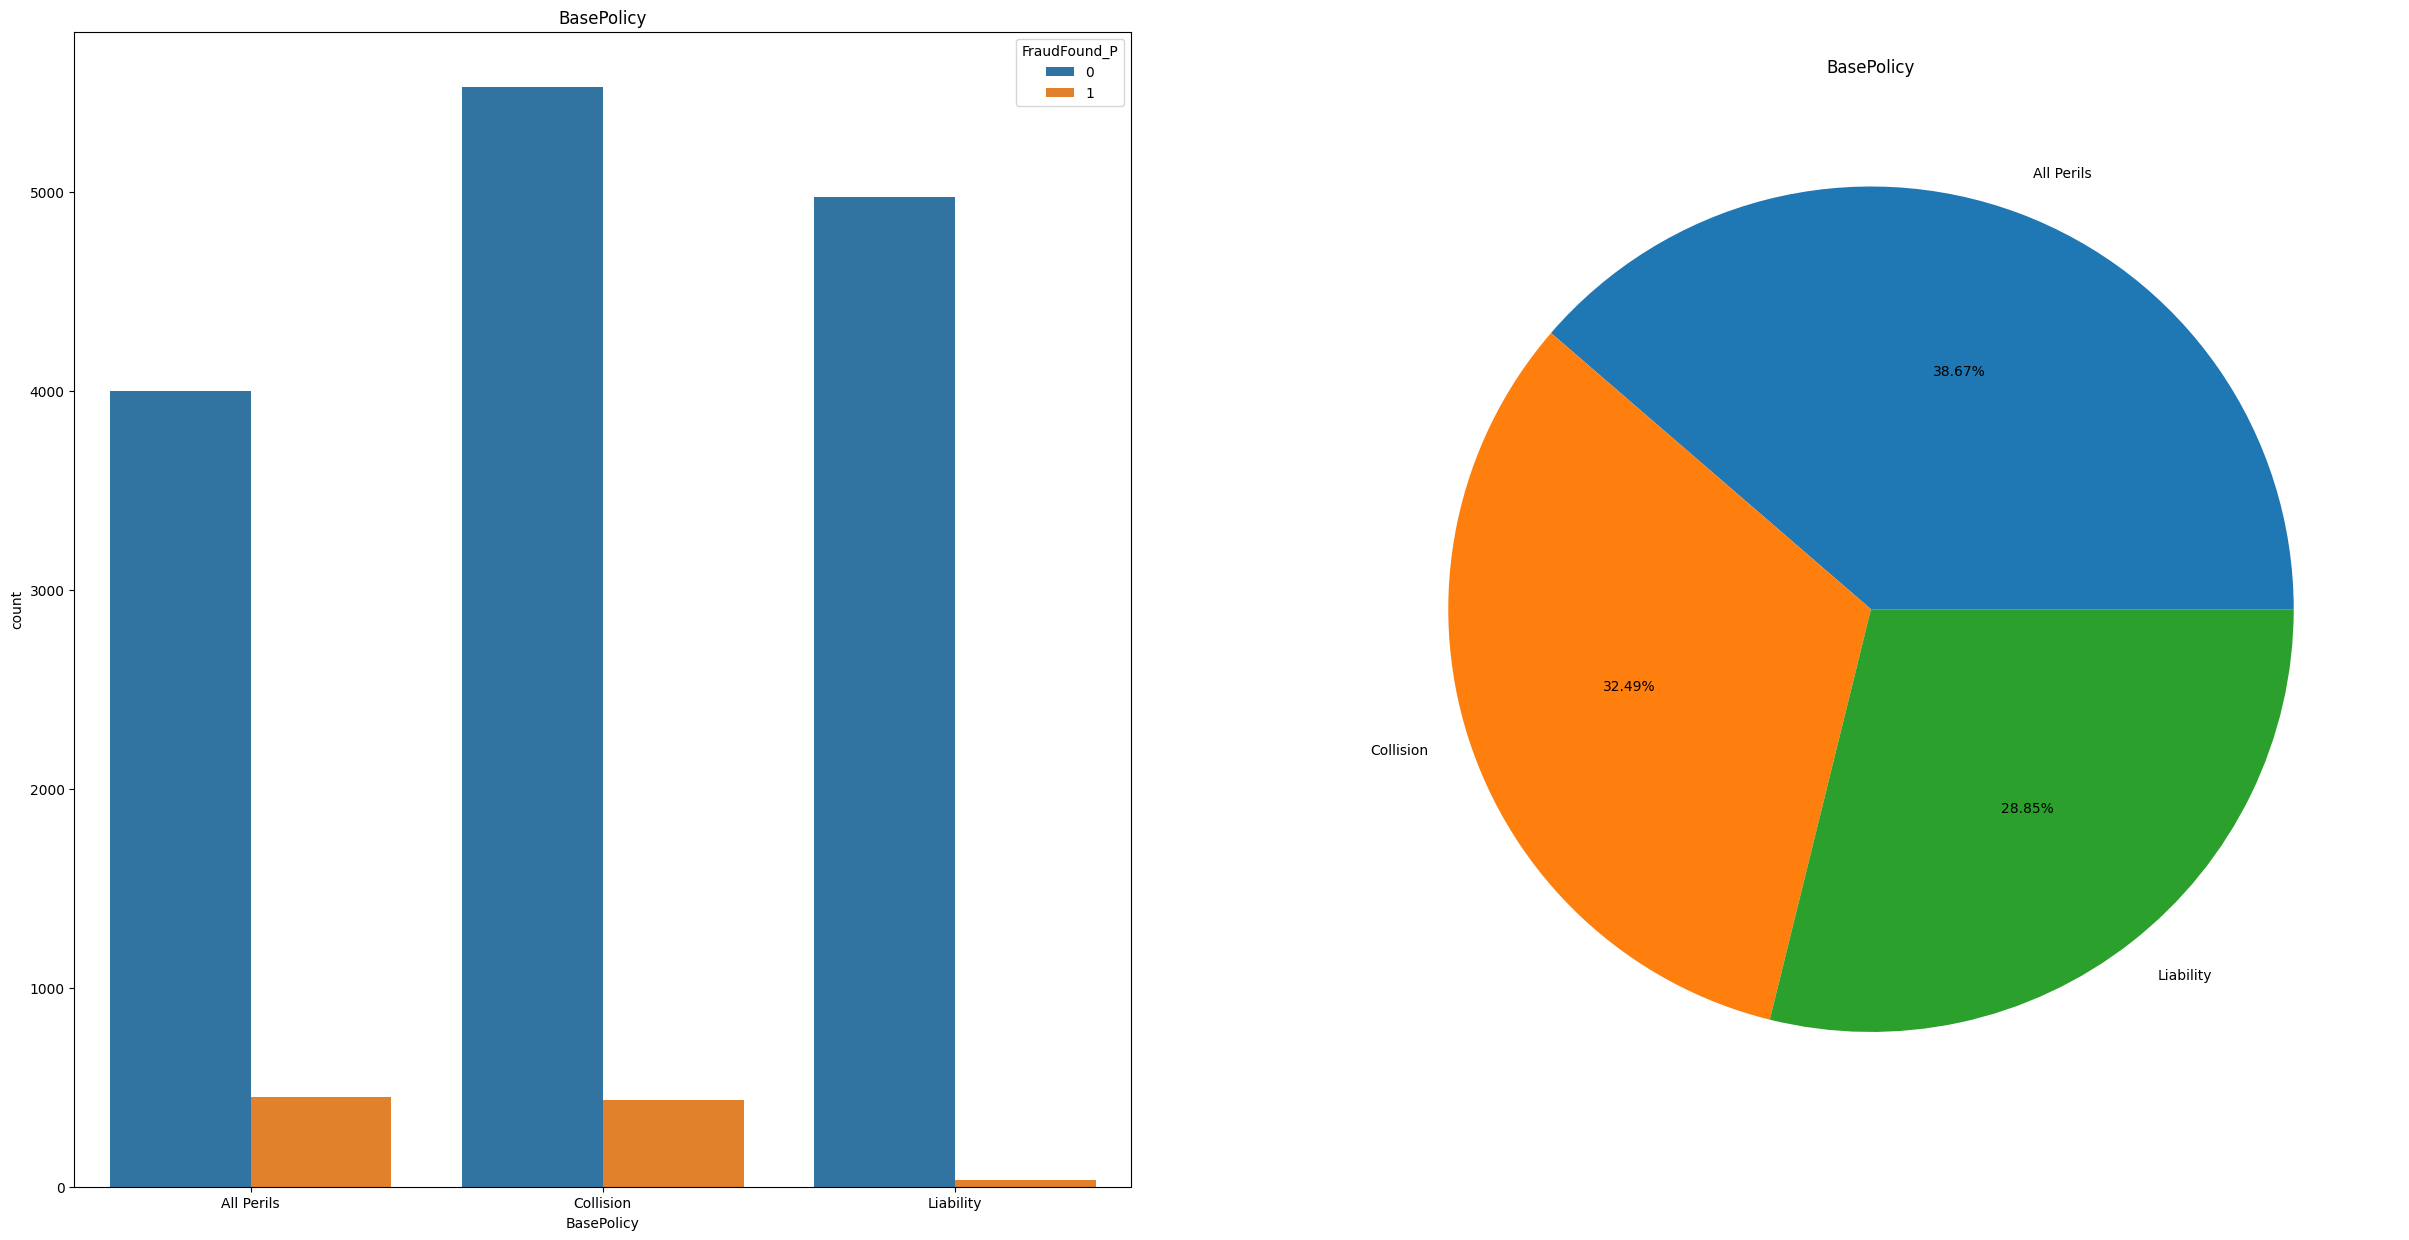

In [ ]:
displayPlotPieAndBar(["Sex" ,"Fault" ,"VehicleCategory", "RepNumber" ,"DriverRating" ,"NumberOfSuppliments" ,"Year" ,"AgentType" ,"WitnessPresent" ,"BasePolicy"],"FraudFound_P")

1- The dominant gender of the society is men and they have more positive FraudFound_P than women.

2- The accident rate of vehicles that have an insurance policy is higher and they have more positive FraudFound_P.

3- Most of the available vehicles are sedans and they have the highest FraudFound_P rates

4- In general, in the agent section, most of our data is external, and all FraudFound_P is linked to external.

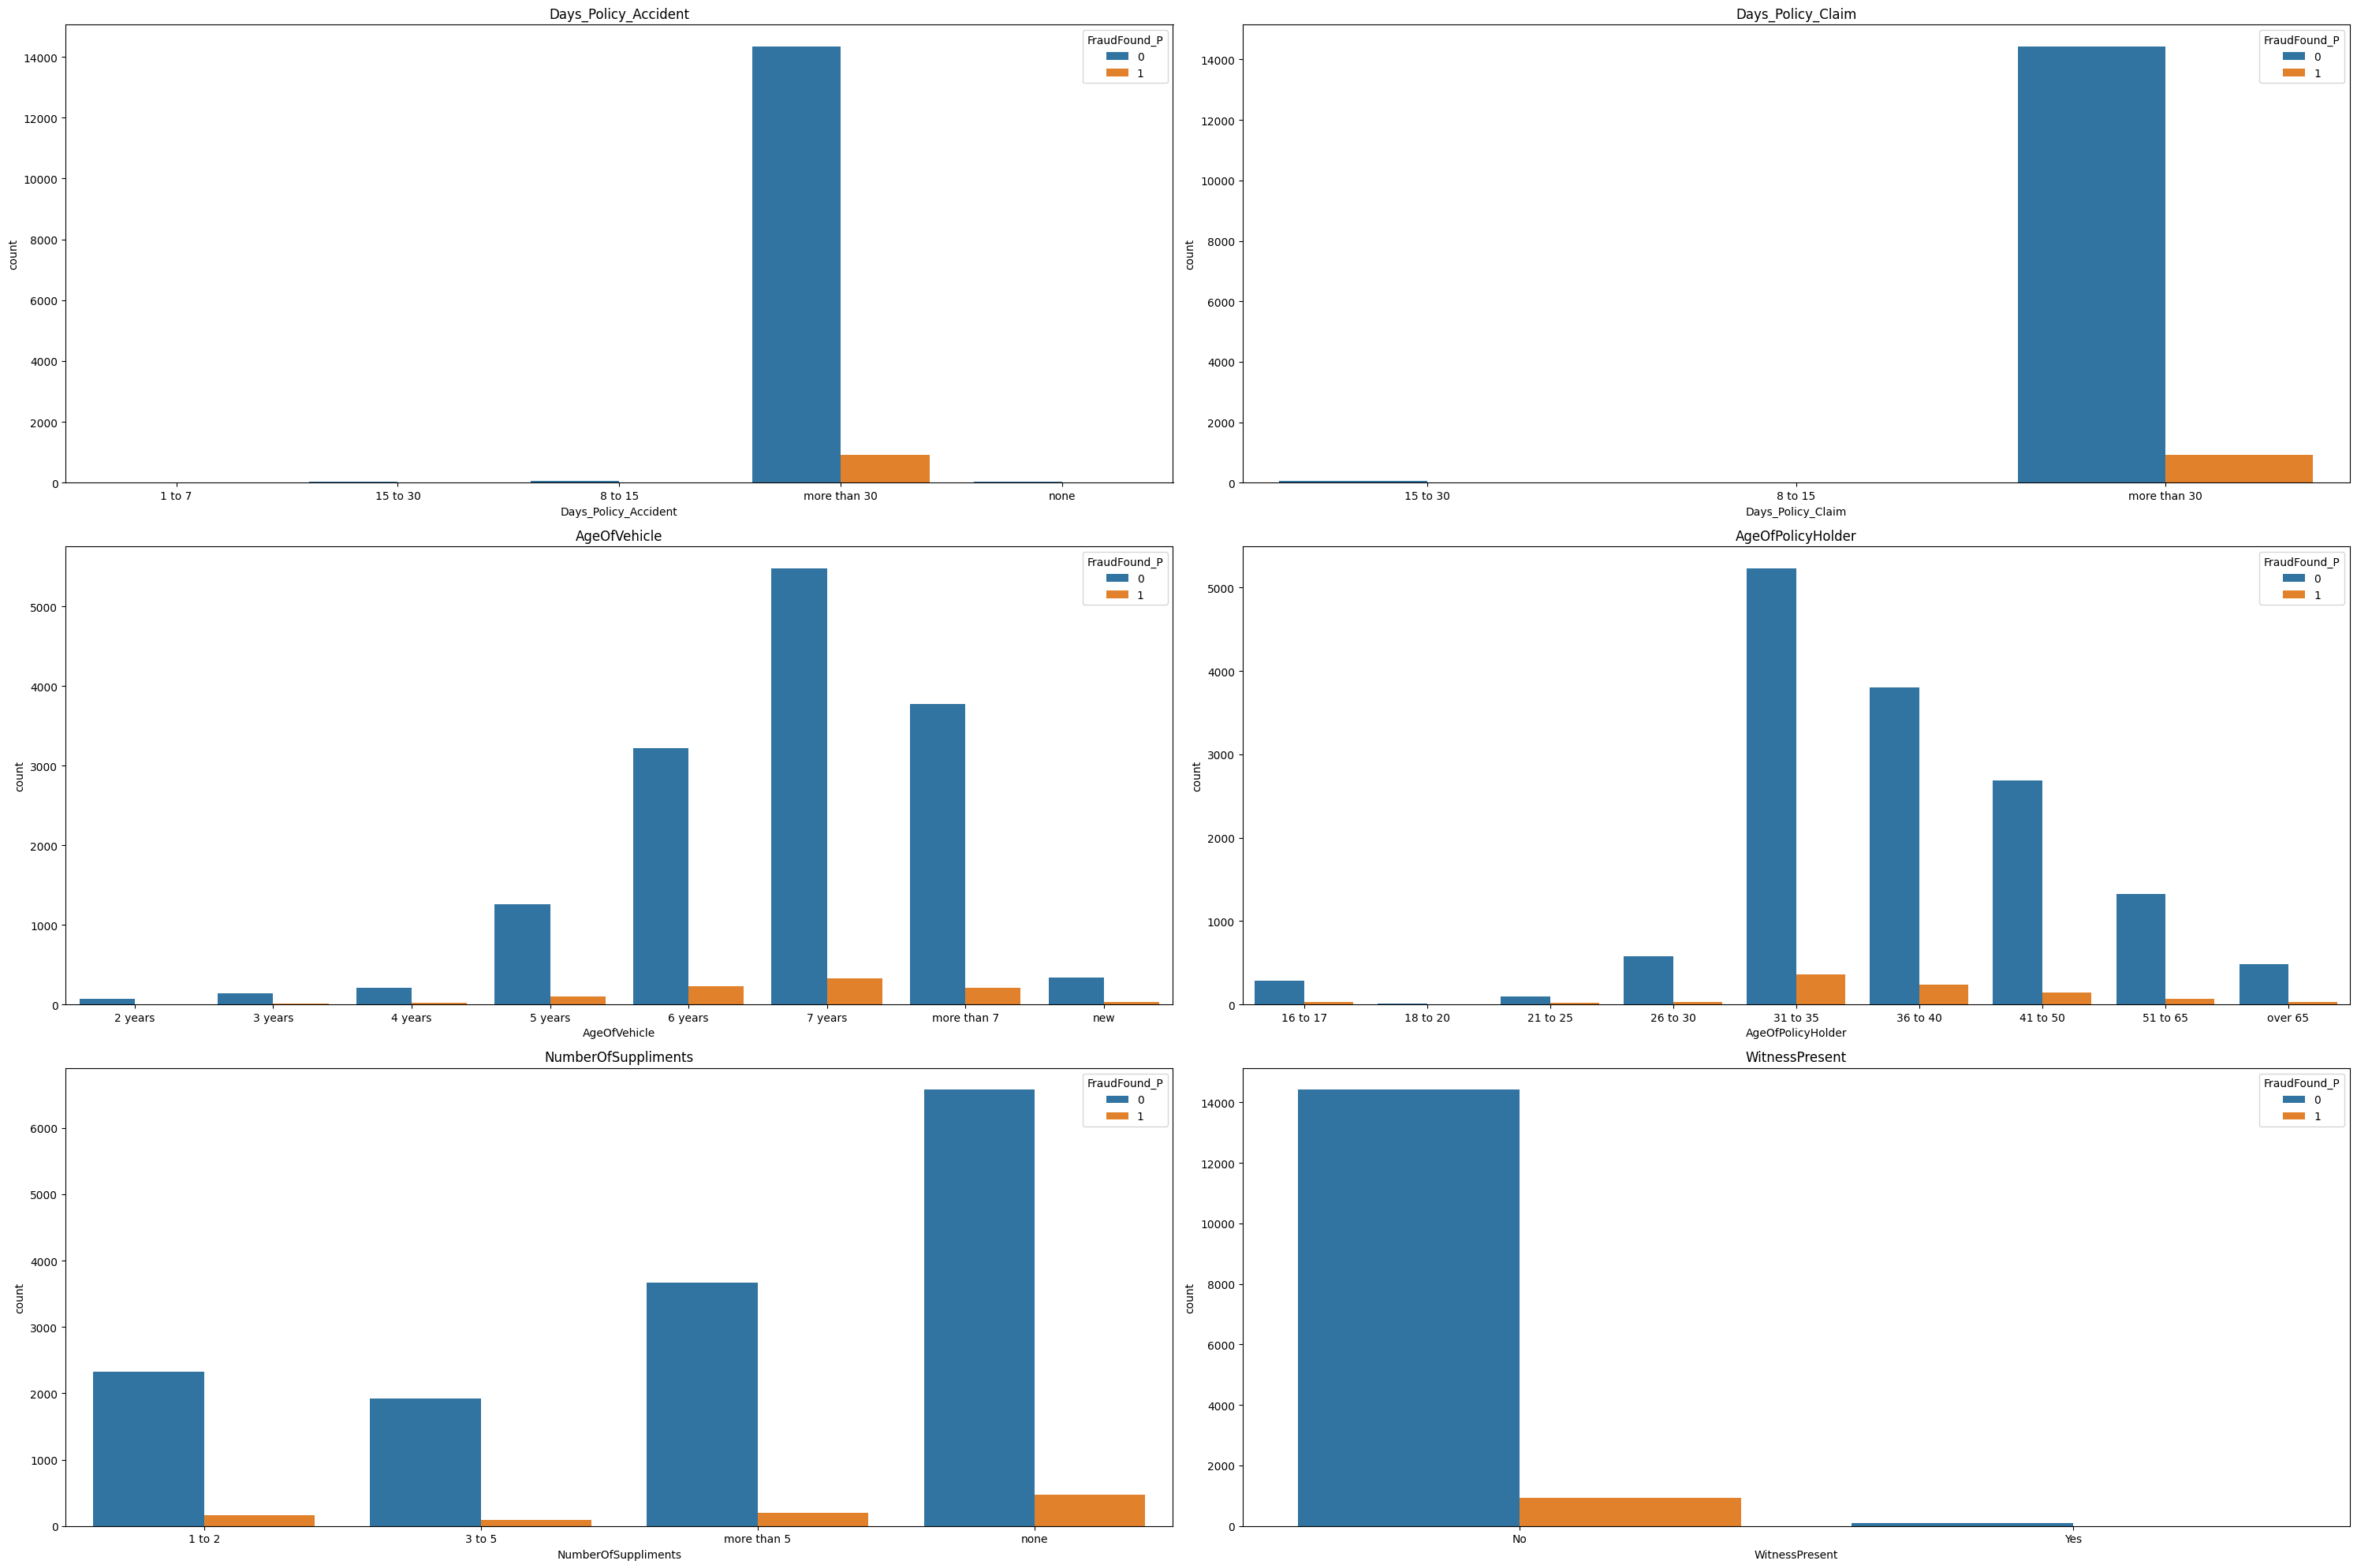

In [ ]:
plotBAR(['Days_Policy_Accident' ,'Days_Policy_Claim' ,'AgeOfVehicle' ,'AgeOfPolicyHolder' ,'NumberOfSuppliments' ,'WitnessPresent'] ,"FraudFound_P")

# PreProcessing

In [ ]:
LB = preprocessing.LabelEncoder()
for column in (data.columns):
    data[column] = LB.fit_transform(data[column])

data.shape

(15419, 32)

In [ ]:
data.head(10)

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0      2            4          6     6             1                 5   
1      4            2          6     6             1                 1   
2     10            4          0     6             1                 4   
3      6            1          2    17             0                 0   
4      4            4          1     6             1                 5   
5     10            3          0     6             1                 6   
6      3            0          2     6             1                 1   
7      9            0          0     6             1                 5   
8      2            3          2     6             1                 6   
9      0            2          5     5             1                 6   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             4                   0    0              2  ...             1   
1             4                   3    1              2  ...             4   
2             9                   1    1              1  ...             5   
3             5                   0    1              1  ...             6   
4             3                   1    0              2  ...             3   
5             9                   0    1              2  ...             3   
6             3                   2    1              1  ...             5   
7             7                   3    1              2  ...             7   
8             2                   4    1              2  ...             4   
9             0                   2    1              1  ...             6   

   AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  AgentType  \
0                  3                  0               0          0   
1                  4                  1               0          0   
2                  6                  0               0          0   
3                  7                  1               0          0   
4                  4                  0               0          0   
5                  2                  0               0          0   
6                  5                  0               0          0   
7                  0                  0               0          0   
8                  4                  0               1          0   
9                  5                  0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                    3                    0             2     0           2  
1                    3                    3             0     0           1  
2                    3                    3             0     0           1  
3                    2                    3             0     0           2  
4                    3                    3             0     0           1  
5                    1                    3             0     0           1  
6                    0                    3             0     0           1  
7                    3                    3             0     0           1  
8                    1                    3             0     0           1  
9                    1                    3             0     0           0  

[10 rows x 32 columns]

# Set Dataset

In [ ]:
X = data.drop(columns='FraudFound_P') #independent #input
y = data['FraudFound_P'] #dependent #output

In [ ]:
gneralX_train, gneralX_test, gneraly_train, gneraly_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
gneraly_train.value_counts()

0    10156
1      637
Name: FraudFound_P, dtype: int64

In [ ]:
gneraly_test.value_counts()

0    4340
1     286
Name: FraudFound_P, dtype: int64

In [ ]:
oversample = SMOTE(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(gneralX_train, gneraly_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    10156
1     5078
Name: FraudFound_P, dtype: int64


In [ ]:
undersampel = RandomUnderSampler(sampling_strategy=0.5 ,random_state=42)
X_under ,y_under = undersampel.fit_resample(gneralX_train, gneraly_train)
print('After Oversampling:\n',y_over.value_counts())

After Oversampling:
 0    10156
1     5078
Name: FraudFound_P, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def scorForTest(yTrian ,y):
    print("TEST DATA : ")
    print("accuracy_score for test data : " + str(accuracy_score(y ,yTrian)))
    print("recall_score for test data : " + str(recall_score(y ,yTrian)))
    print("precision_score for test data : " + str(precision_score(y ,yTrian)))
    print("f1_score for test data : " + str(f1_score(y ,yTrian)))
    print("roc_auc_score for test data : " + str(roc_auc_score(y ,yTrian)))
    
    
    fpr, tpr, thresholds = roc_curve(y ,yTrian)
    
    x = np.linspace(0, 1, 1000)
    
    
    #plt.figure(figsize=(10,10))
    #plt.subplot(121)
    #plt.plot(fpr ,tpr)
    #plt.plot(x ,x)
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    #plt.title("ROC")
    
    cm =  confusion_matrix(y ,yTrian)
    
    cmDisply = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=[False ,True])
    fig, (ax1 ,ax2) = plt.subplots(1 , 2 ,figsize=(15,15))
    
    ax1.plot(fpr ,tpr)
    ax1.plot(x ,x)
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title("ROC")

    
    
    
    cmDisply.plot(ax=ax2)
    plt.show()
    

In [ ]:
def scorForTrain(yTrian ,y):
    print("Train DATA : ")
    print("accuracy_score for Train data : " + str(accuracy_score(y ,yTrian)))
    print("recall_score for Train data : " + str(recall_score(y ,yTrian)))
    print("precision_score for Train data : " + str(precision_score(y ,yTrian)))
    print("f1_score for Train data : " + str(f1_score(y ,yTrian)))
    print("roc_auc_score for Train data : " + str(roc_auc_score(y ,yTrian)))
    
    
    fpr, tpr, thresholds = roc_curve(y ,yTrian)
    
    x = np.linspace(0, 1, 1000)
    
    
    cm =  confusion_matrix(y ,yTrian)
    
    cmDisply = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=[False ,True])
    fig, (ax1 ,ax2) = plt.subplots(1 , 2 ,figsize=(15,15))
    
    ax1.plot(fpr ,tpr)
    ax1.plot(x ,x)
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title("ROC")

    
    
    
    cmDisply.plot(ax=ax2)
    plt.show()
    

## Logistic Regression

### Imbalanc Data

TEST DATA : 
accuracy_score for test data : 0.9409802649865654
recall_score for test data : 0.0
precision_score for test data : 0.0
f1_score for test data : 0.0
roc_auc_score for test data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


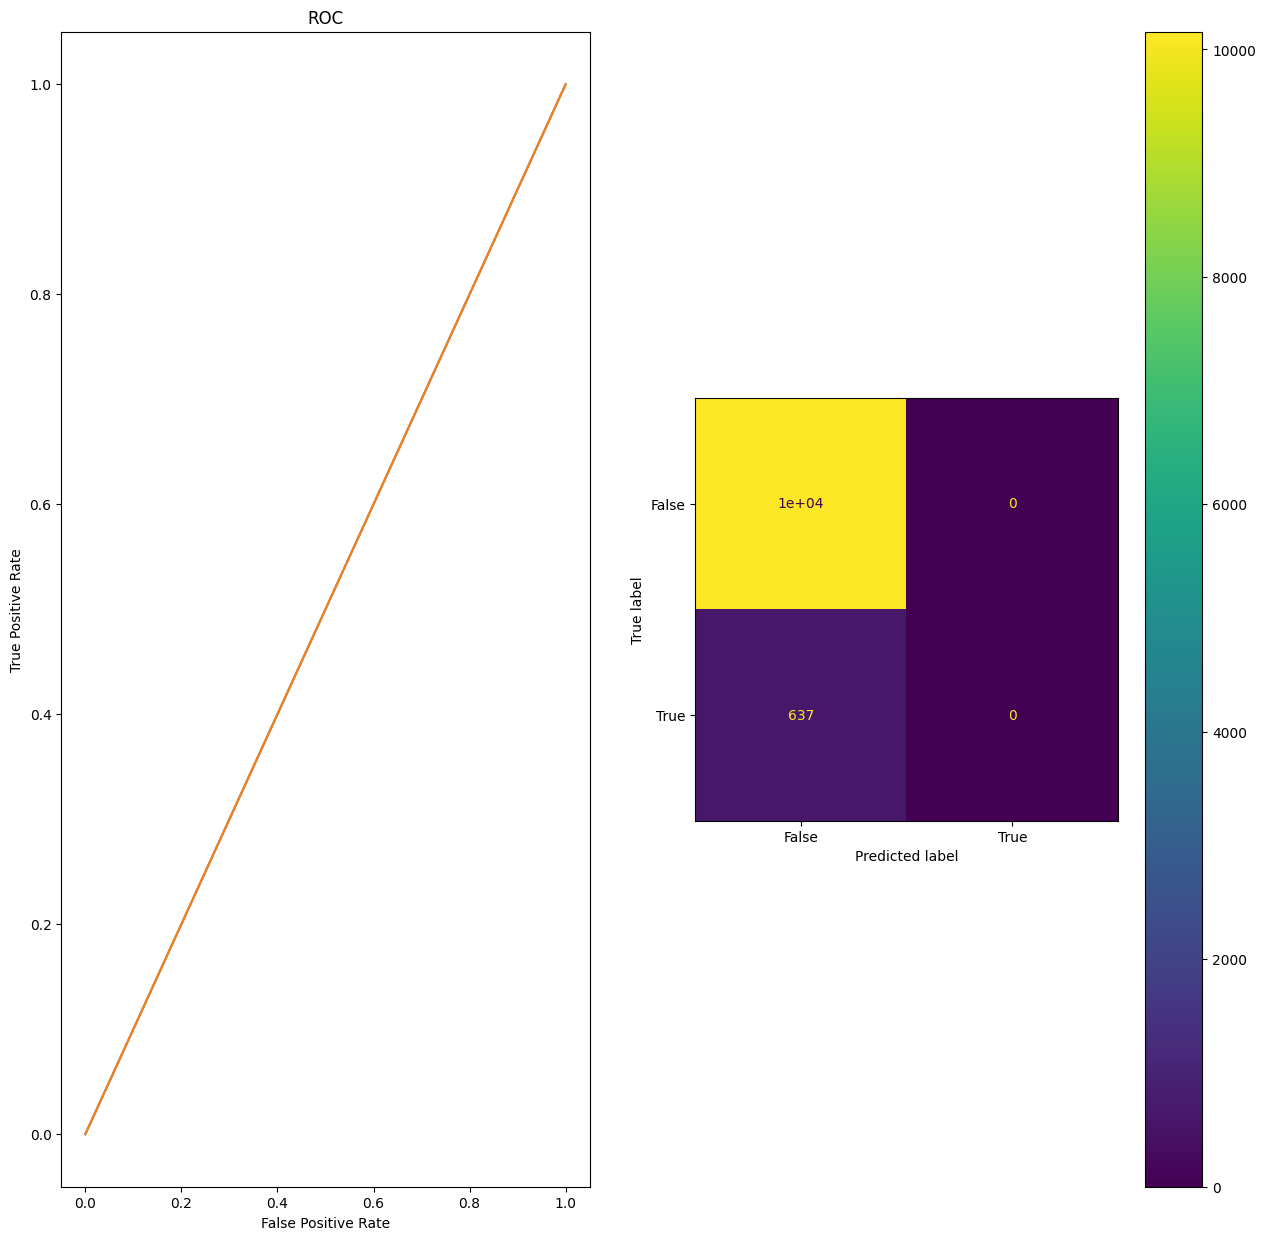

In [ ]:
logisticR = LogisticRegression(random_state=42 ,max_iter=3000).fit(gneralX_train, gneraly_train)
logsticPerecdicr = logisticR.predict(gneralX_train)
scorForTest(logsticPerecdicr ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.9381755296152183
recall_score for test data : 0.0
precision_score for test data : 0.0
f1_score for test data : 0.0
roc_auc_score for test data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


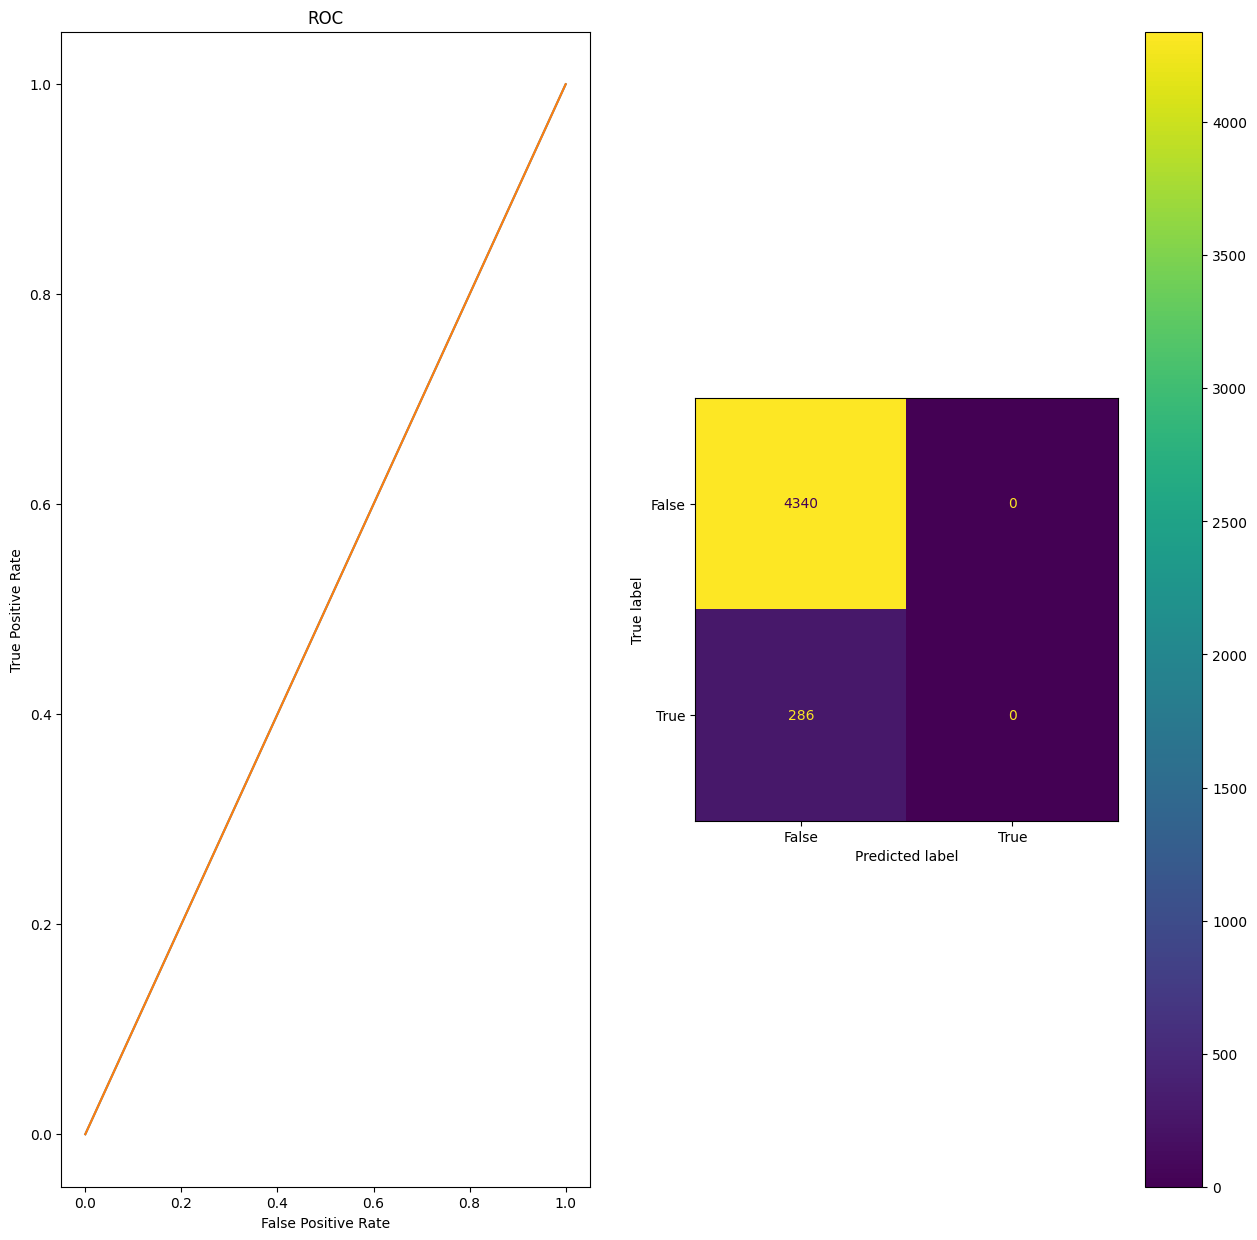

In [ ]:
logsticPerecdicr = logisticR.predict(gneralX_test)
scorForTest(logsticPerecdicr ,gneraly_test)

### Undersampling

TEST DATA : 
accuracy_score for test data : 0.7856017789307884
recall_score for test data : 0.565149136577708
precision_score for test data : 0.15018773466833543
f1_score for test data : 0.23731048121292025
roc_auc_score for test data : 0.6822890227985036


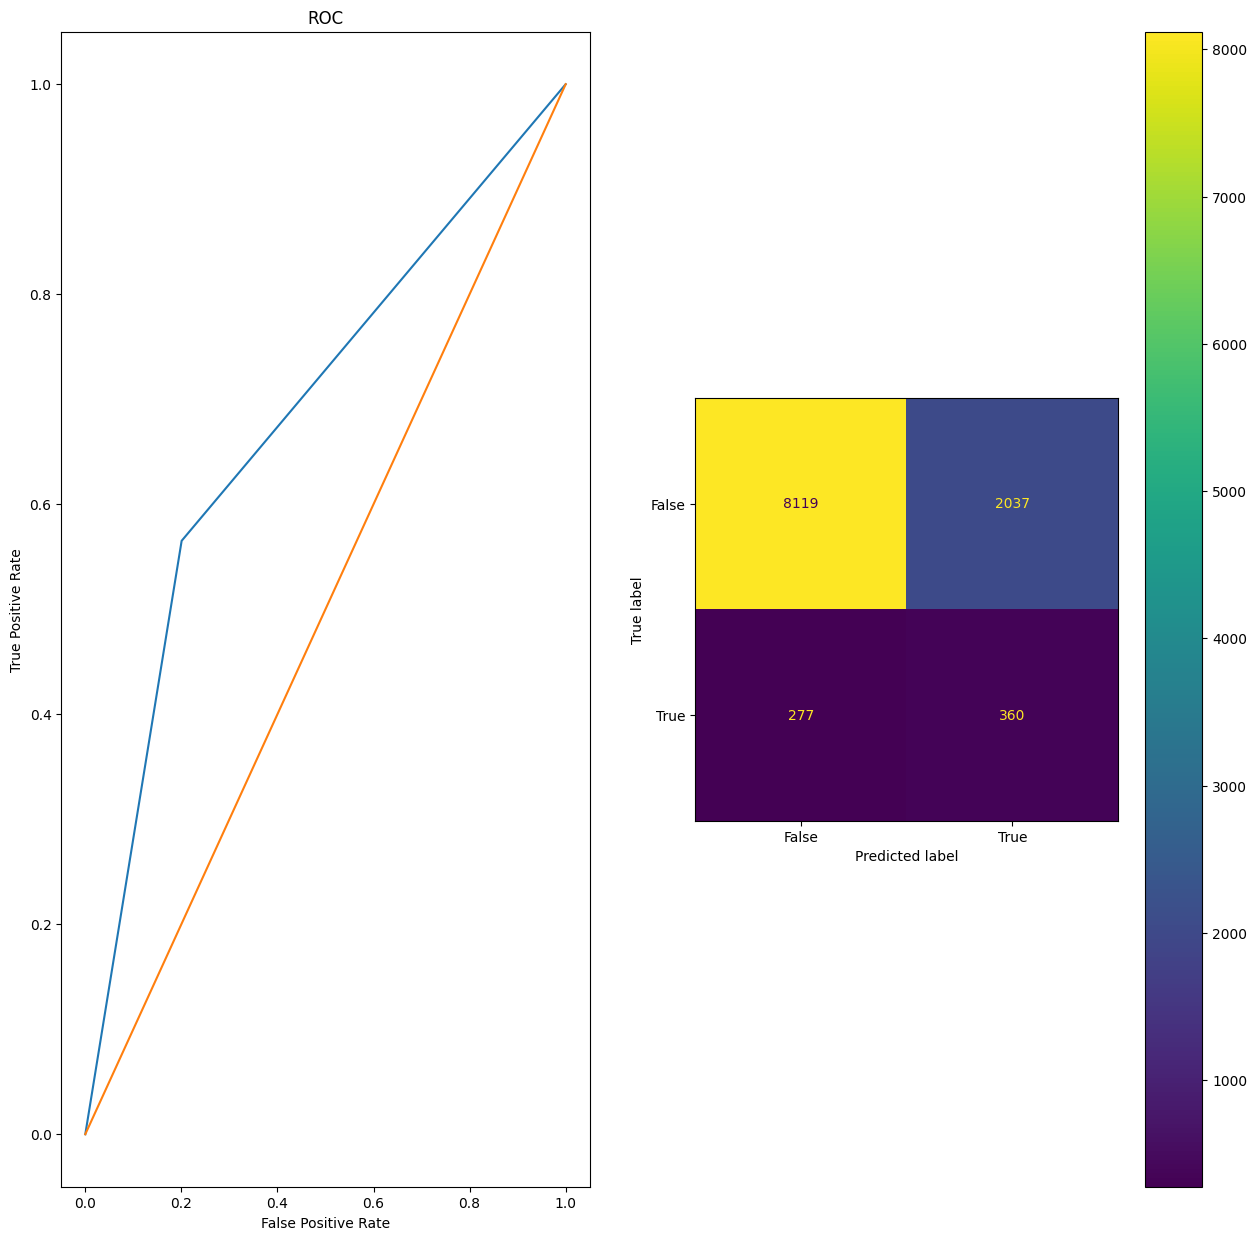

In [ ]:
logisticR = LogisticRegression(random_state=42 ,max_iter=3000).fit(X_under, y_under)
logsticPerecdicr = logisticR.predict(gneralX_train)
scorForTest(logsticPerecdicr ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.7747514051015997
recall_score for test data : 0.5524475524475524
precision_score for test data : 0.14738805970149255
f1_score for test data : 0.23269513991163474
roc_auc_score for test data : 0.6709242370532693


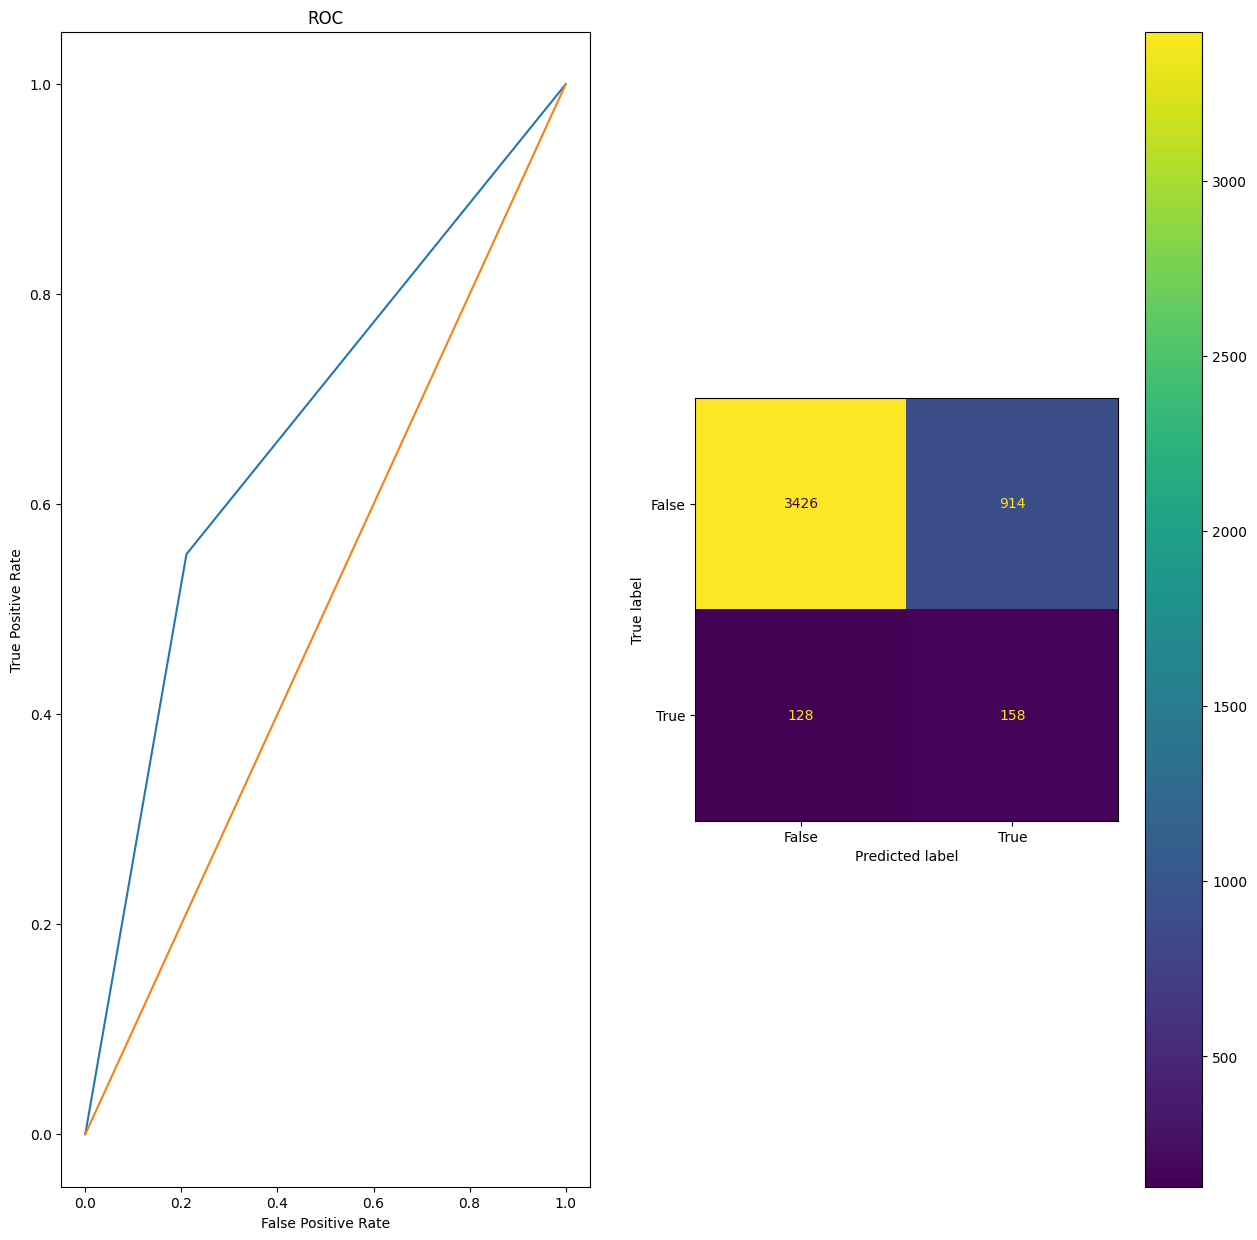

In [ ]:
logsticPerecdicr = logisticR.predict(gneralX_test)
scorForTest(logsticPerecdicr ,gneraly_test)

### Oversampling

TEST DATA : 
accuracy_score for test data : 0.8459186509774854
recall_score for test data : 0.3704866562009419
precision_score for test data : 0.157543391188251
f1_score for test data : 0.22107728337236532
roc_auc_score for test data : 0.6231125679586829


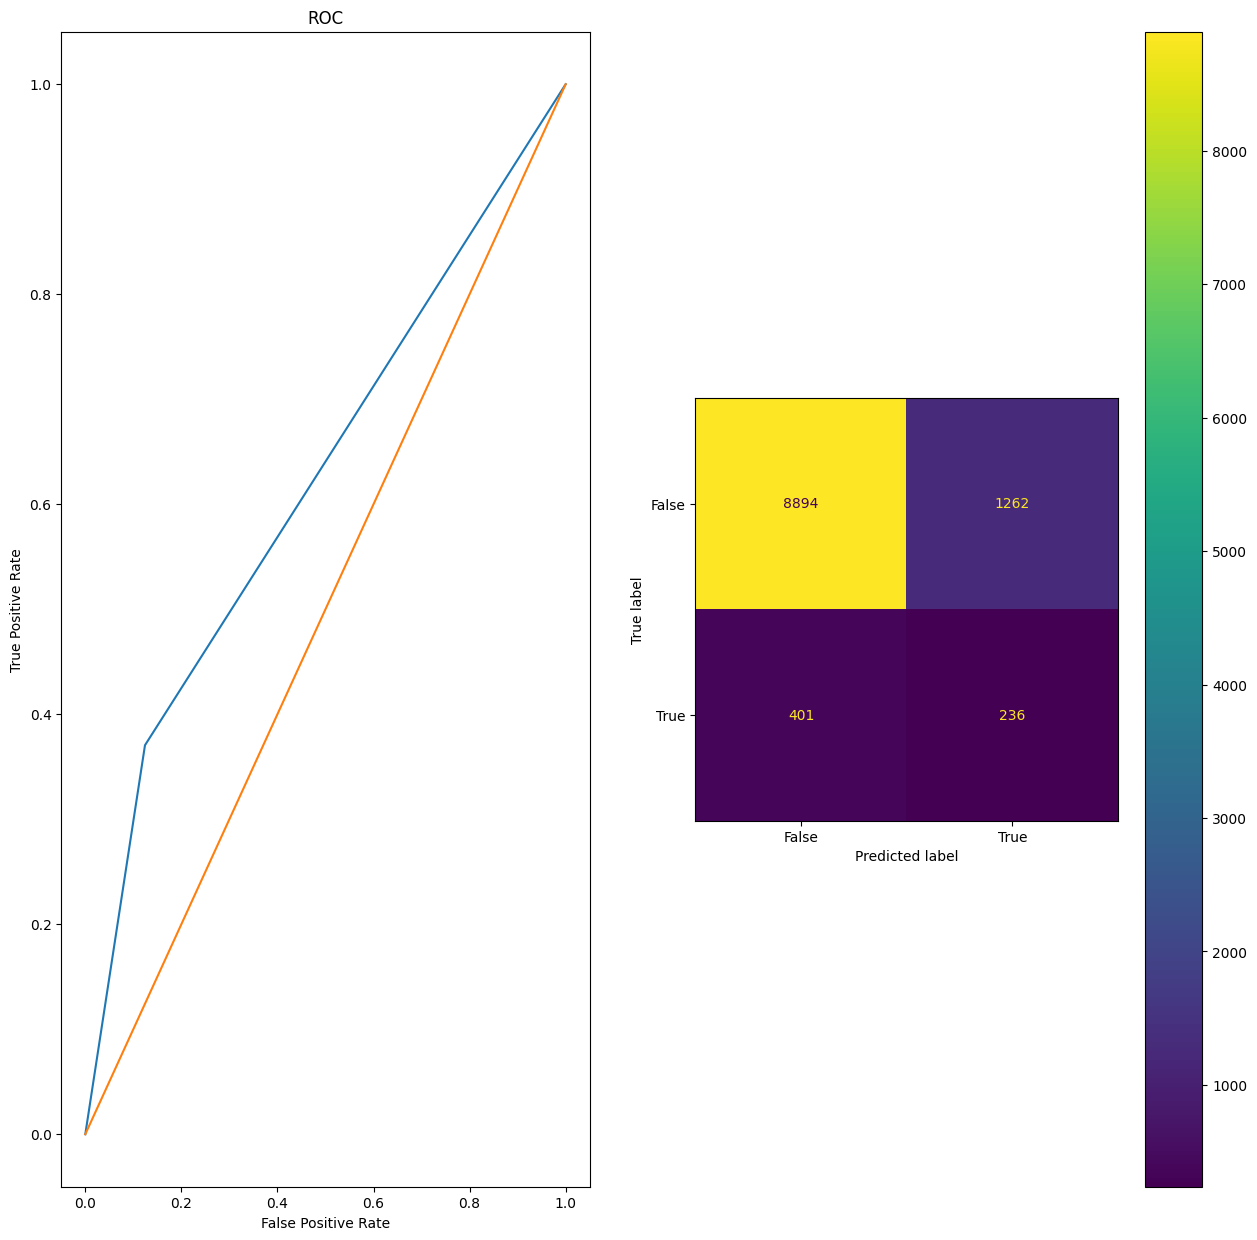

In [ ]:
logisticR = LogisticRegression(random_state=42 ,max_iter=3000).fit(X_over, y_over)
logsticPerecdicr = logisticR.predict(gneralX_train)
scorForTest(logsticPerecdicr ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8476005188067445
recall_score for test data : 0.3881118881118881
precision_score for test data : 0.1731669266770671
f1_score for test data : 0.2394822006472492
roc_auc_score for test data : 0.6329960362218426


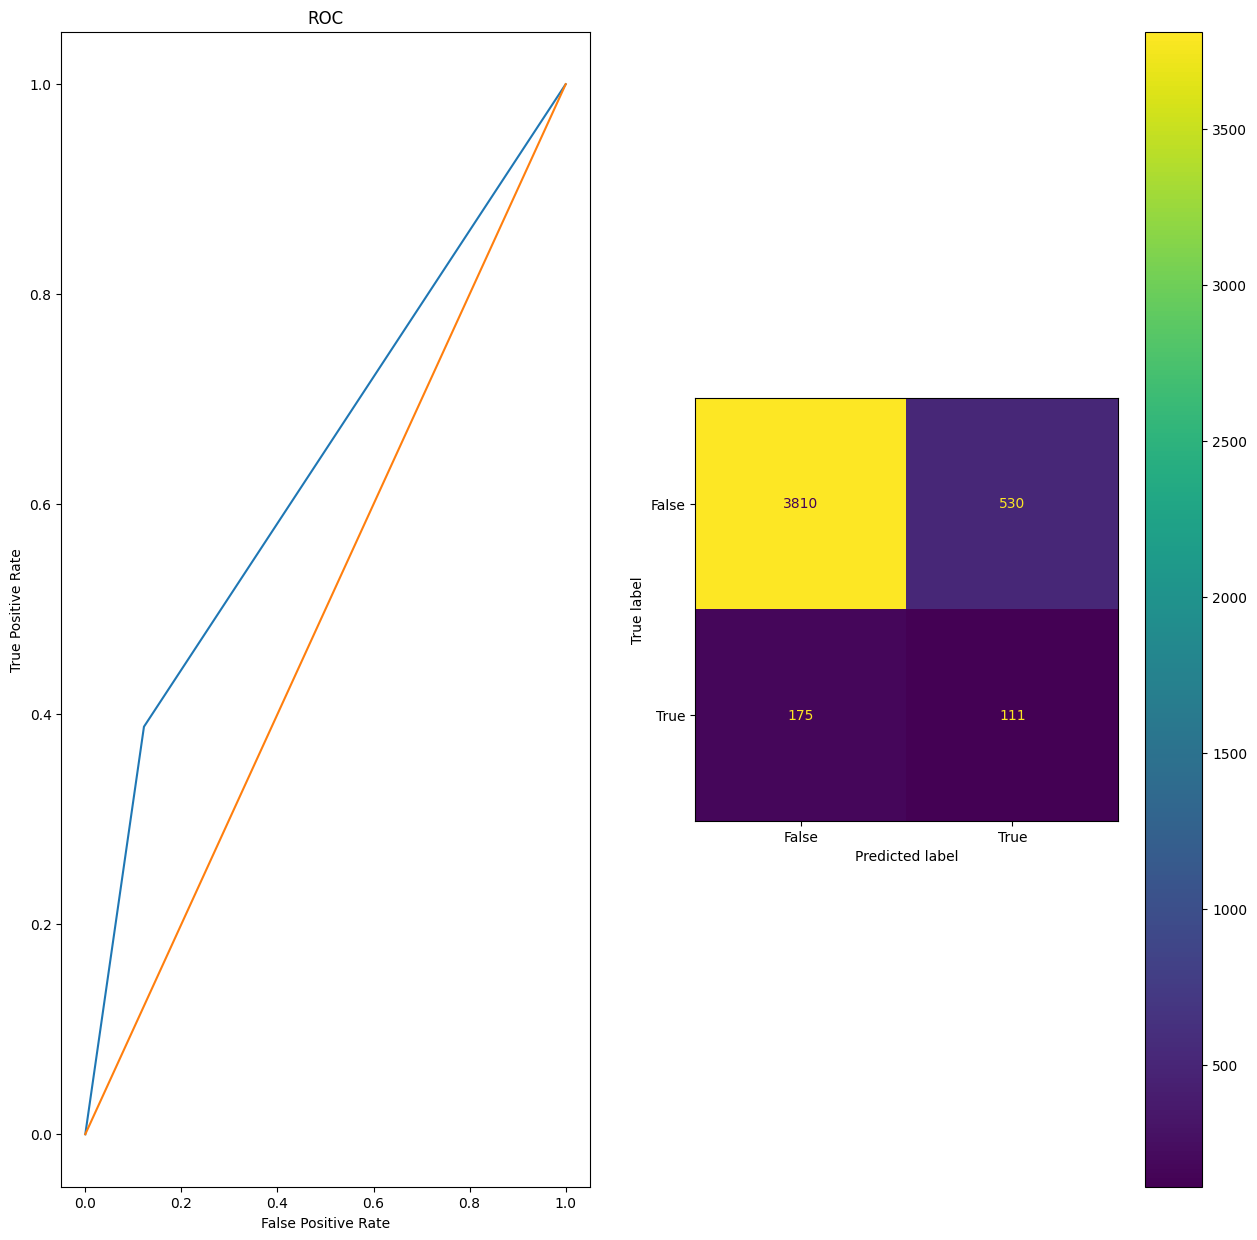

In [ ]:
logsticPerecdicr = logisticR.predict(gneralX_test)
scorForTest(logsticPerecdicr ,gneraly_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# SVM Models

## Linear SVC

### Imbalanc Data

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train DATA : 
accuracy_score for Train data : 0.9409802649865654
recall_score for Train data : 0.0
precision_score for Train data : 0.0
f1_score for Train data : 0.0
roc_auc_score for Train data : 0.5


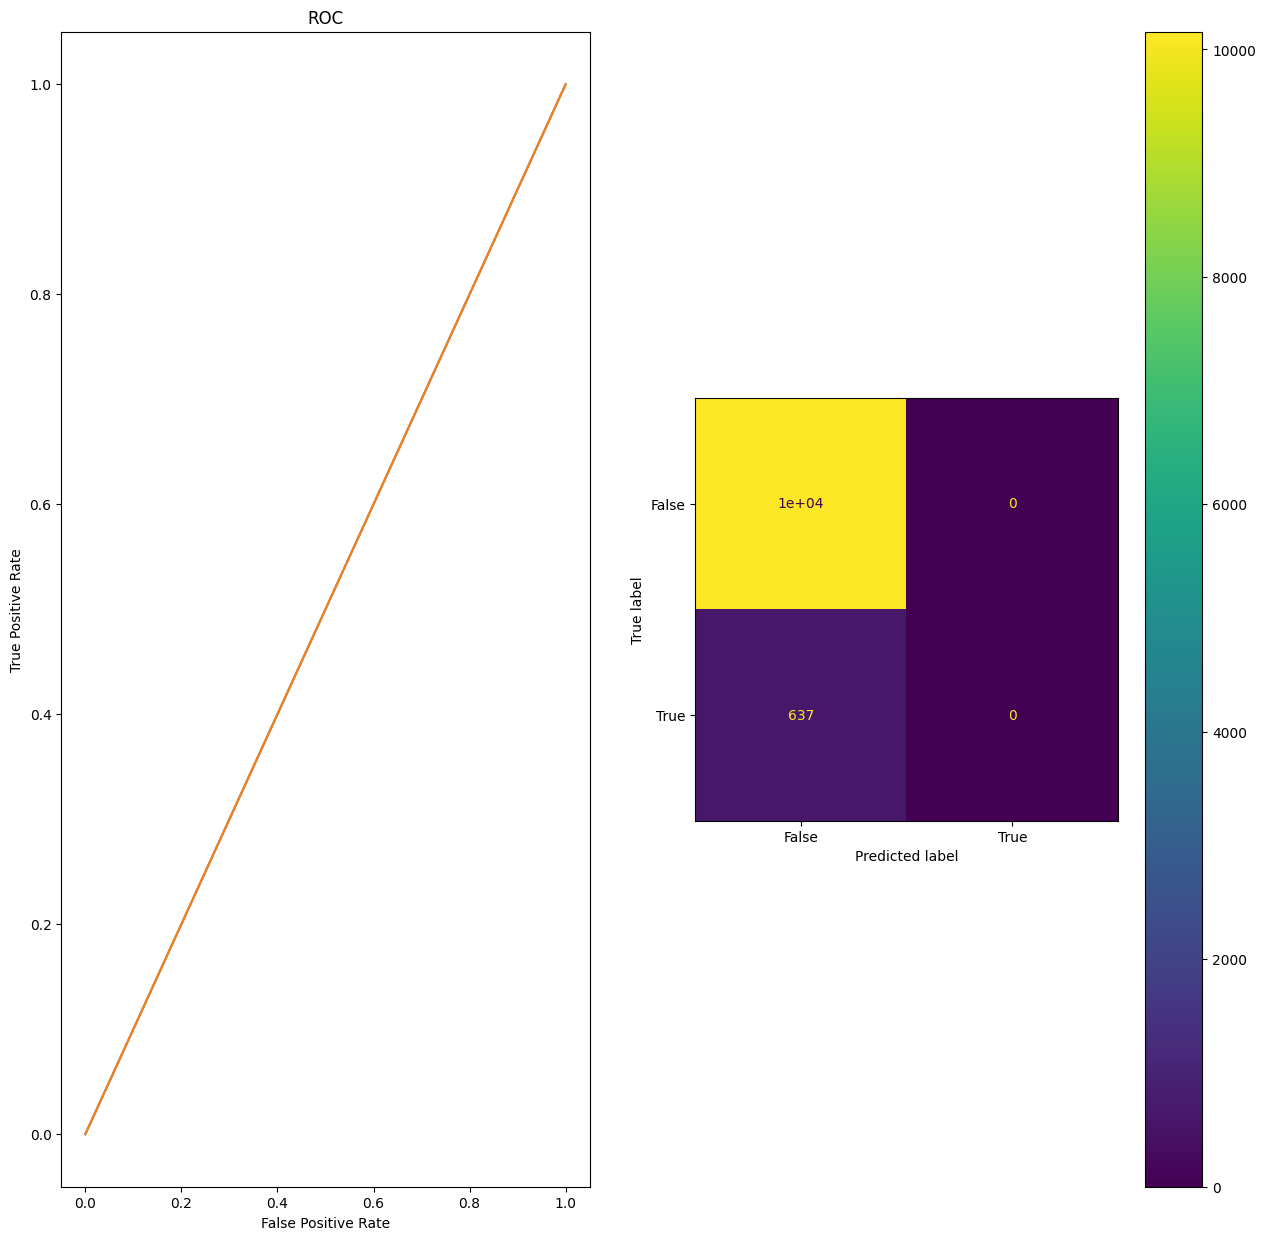

In [ ]:
model = make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5))
model.fit(gneralX_train ,gneraly_train)
predictSVCLinear = model.predict(gneralX_train)
scorForTrain(predictSVCLinear ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.9381755296152183
recall_score for test data : 0.0
precision_score for test data : 0.0
f1_score for test data : 0.0
roc_auc_score for test data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


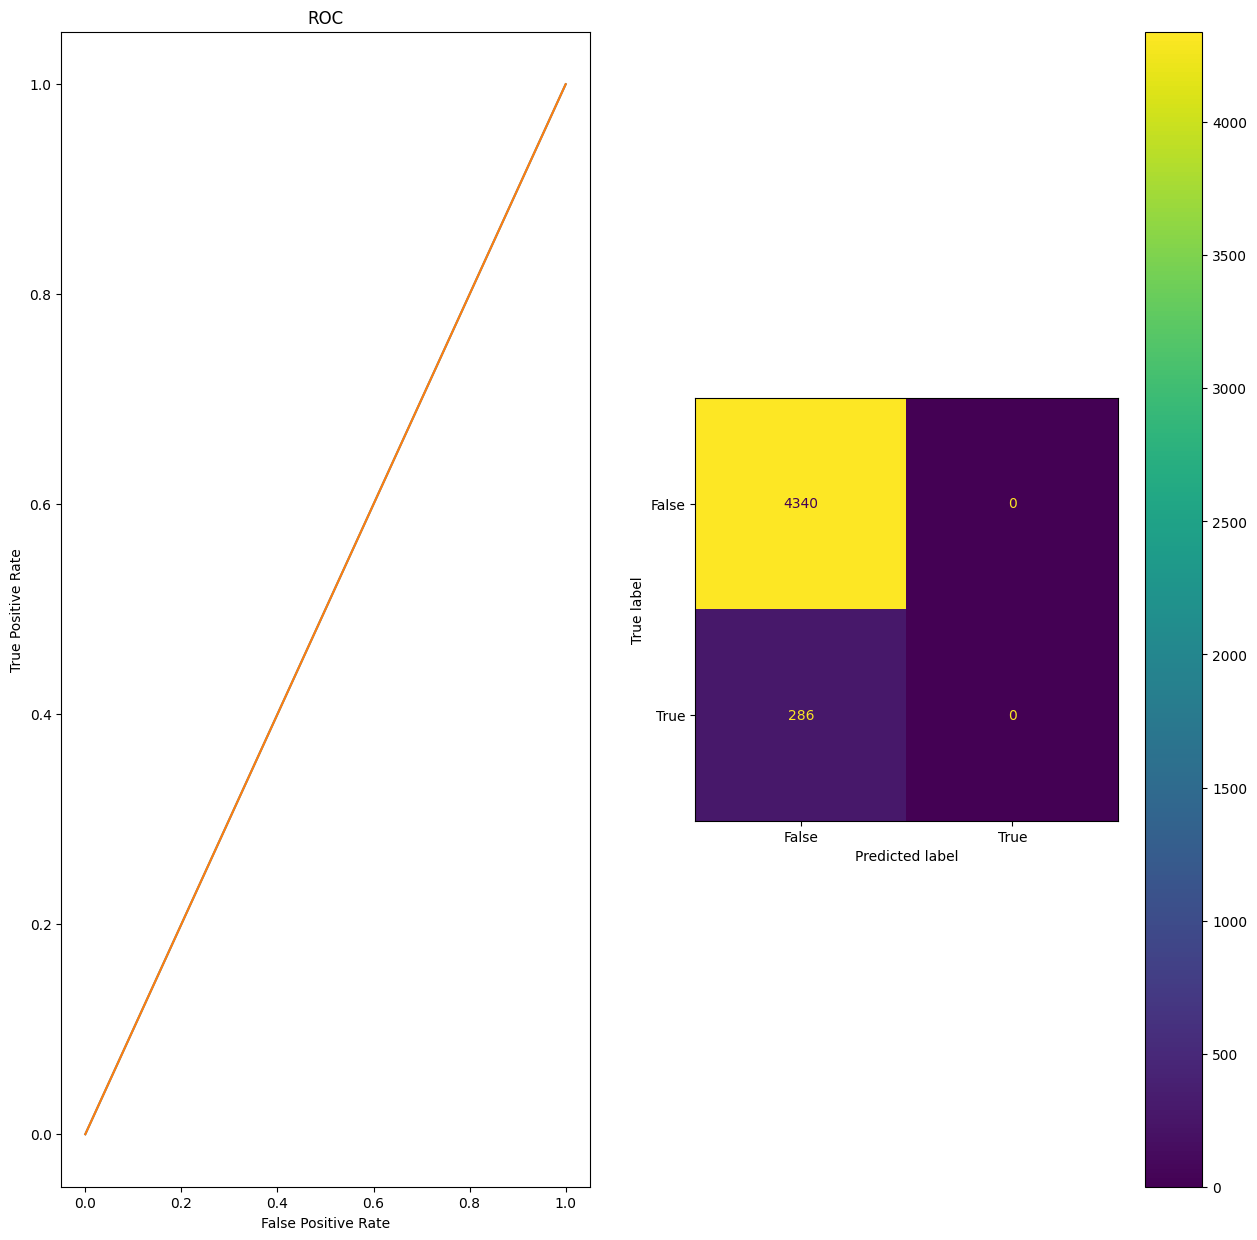

In [ ]:
predictSVCLinear = model.predict(gneralX_test)
scorForTest(predictSVCLinear ,gneraly_test)

### Undersampling

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train DATA : 
accuracy_score for Train data : 0.770777355693505
recall_score for Train data : 0.6043956043956044
precision_score for Train data : 0.14767932489451477
f1_score for Train data : 0.2373612823674476
roc_auc_score for Train data : 0.6928043402048917


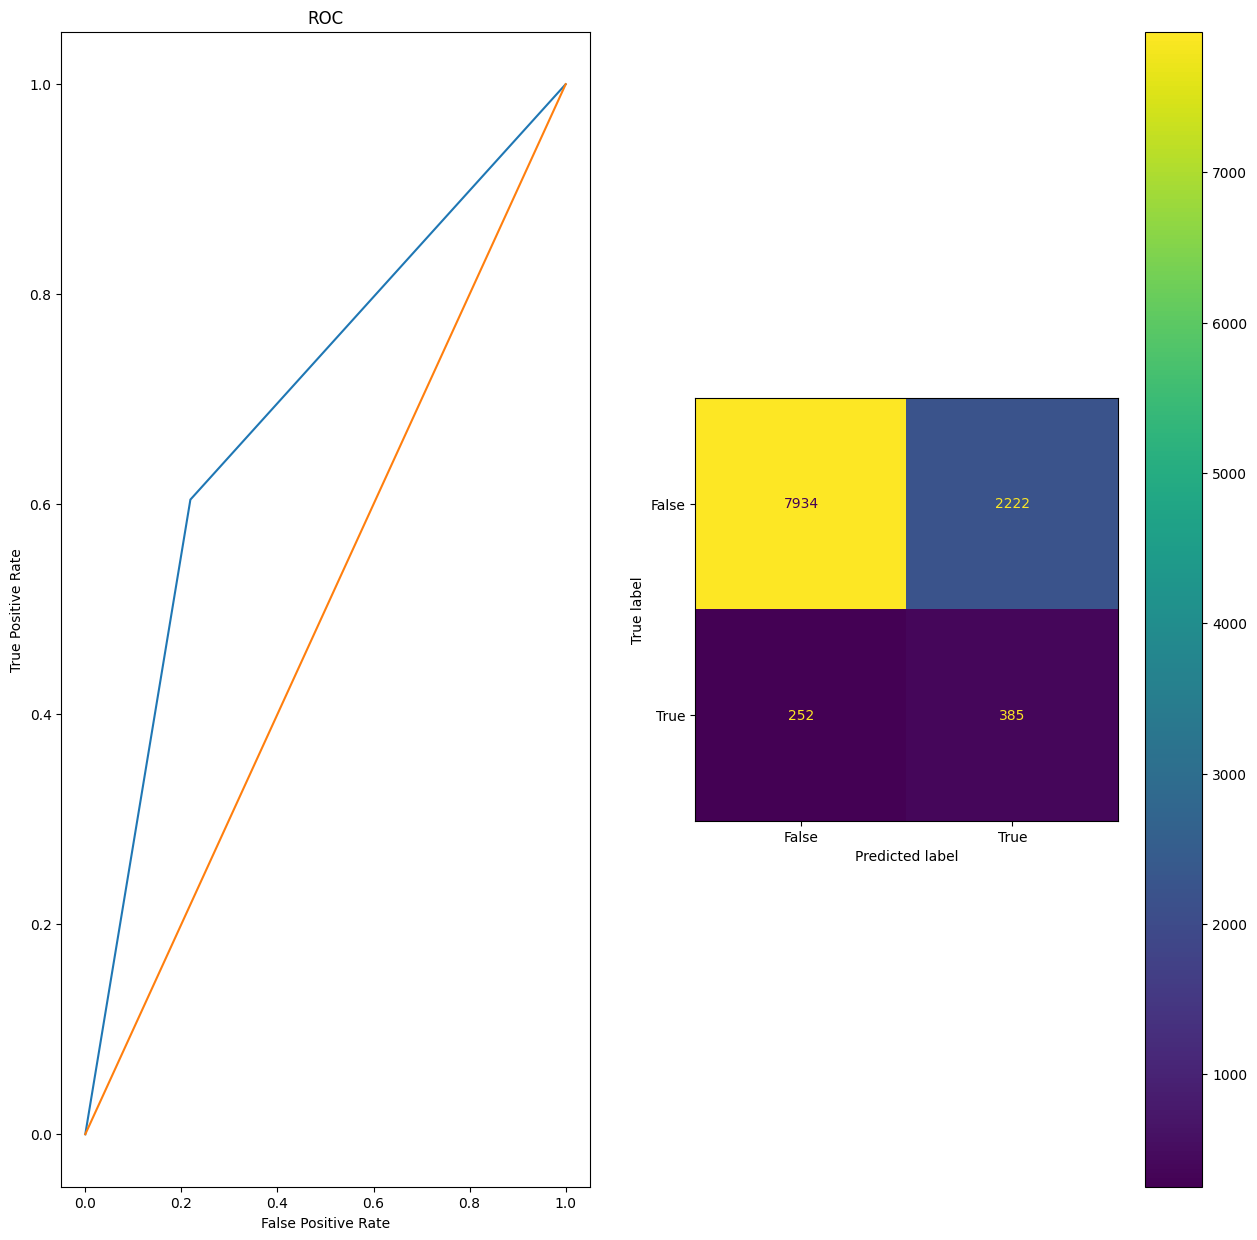

In [ ]:
model = make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5))
model.fit(X_under ,y_under)
predictSVCLinear = model.predict(gneralX_train)
scorForTrain(predictSVCLinear ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.7615650670125378
recall_score for test data : 0.5979020979020979
precision_score for test data : 0.14754098360655737
f1_score for test data : 0.23667820069204157
roc_auc_score for test data : 0.6851261641584222


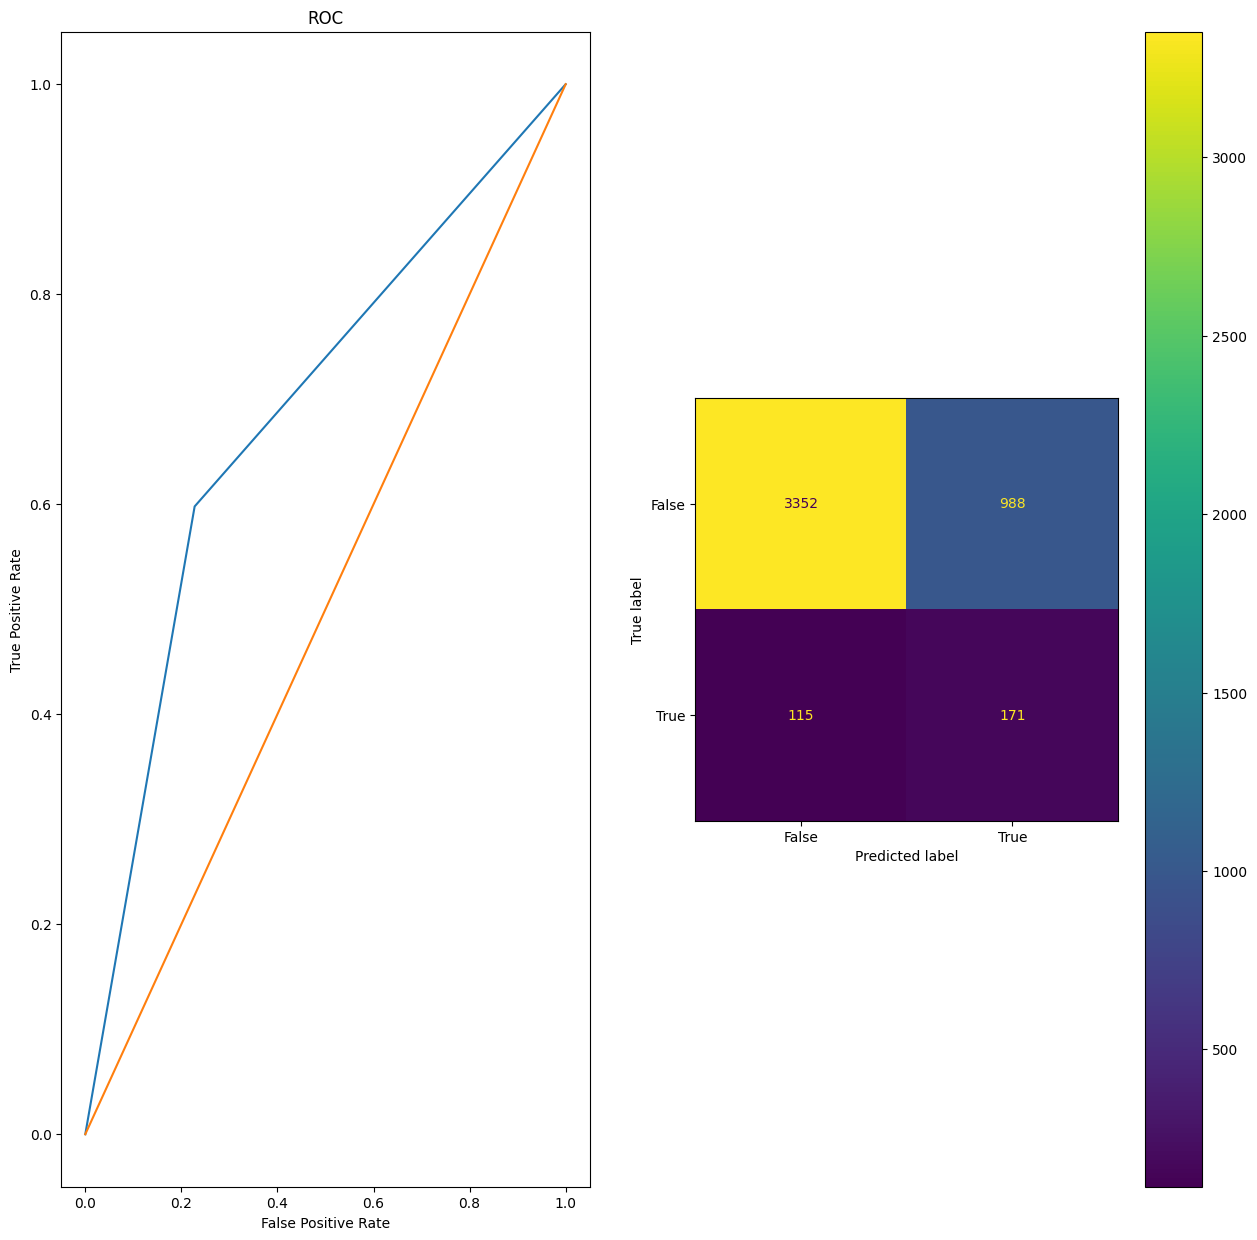

In [ ]:
predictSVCLinear = model.predict(gneralX_test)
scorForTest(predictSVCLinear ,gneraly_test)

### Oversampling

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train DATA : 
accuracy_score for Train data : 0.8426758083943297
recall_score for Train data : 0.37362637362637363
precision_score for Train data : 0.15484710474951205
f1_score for Train data : 0.218951241950322
roc_auc_score for Train data : 0.6228608433708868


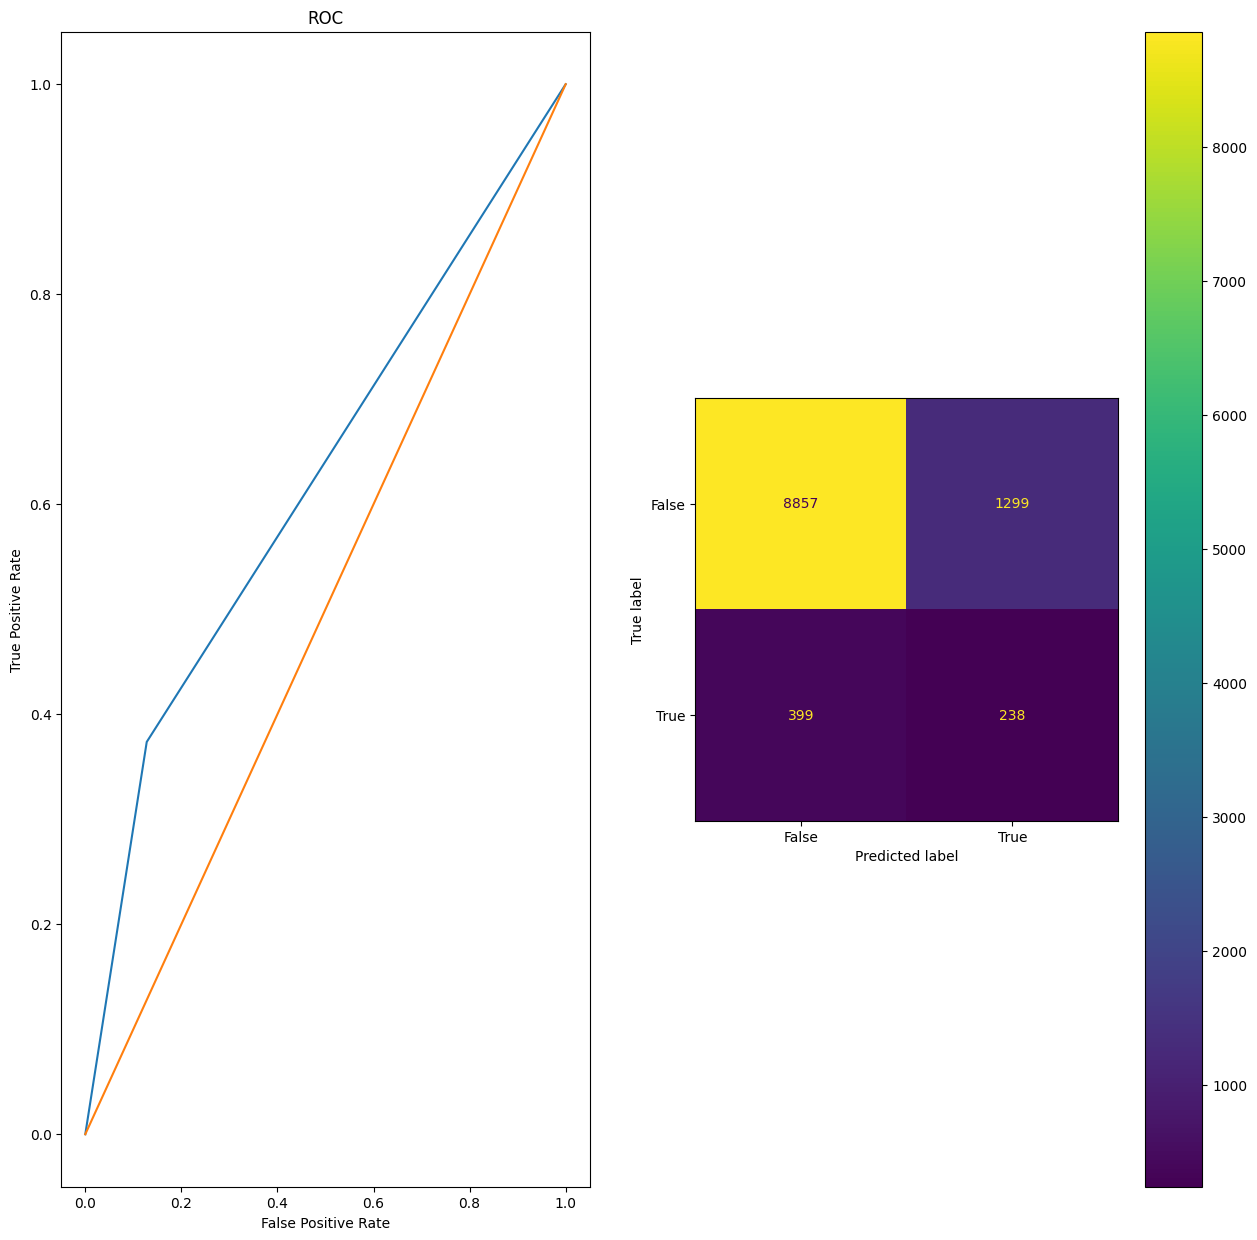

In [ ]:
model = make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5))
model.fit(X_over ,y_over)
predictSVCLinear = model.predict(gneralX_train)
scorForTrain(predictSVCLinear ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8450064850843061
recall_score for test data : 0.3916083916083916
precision_score for test data : 0.17099236641221374
f1_score for test data : 0.23804463336875661
roc_auc_score for test data : 0.6332465921175598


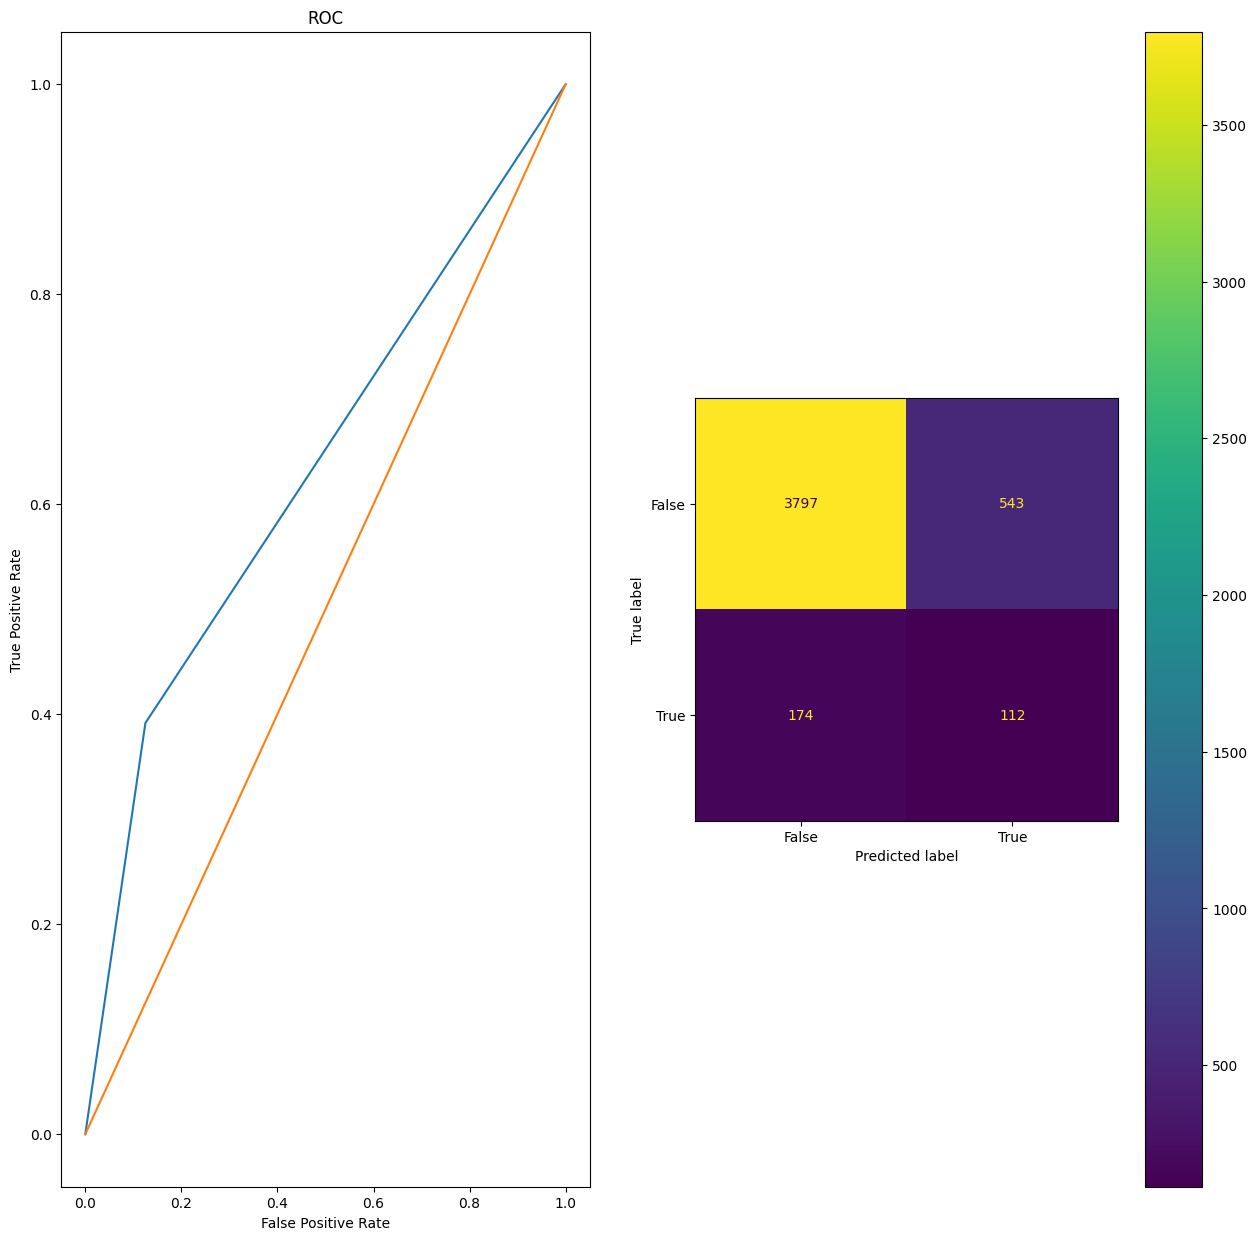

In [ ]:
predictSVCLinear = model.predict(gneralX_test)
scorForTest(predictSVCLinear ,gneraly_test)

# Kernels

## Polynomial

### Imbalanc Data

Train DATA : 
accuracy_score for Train data : 0.9409802649865654
recall_score for Train data : 0.0
precision_score for Train data : 0.0
f1_score for Train data : 0.0
roc_auc_score for Train data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


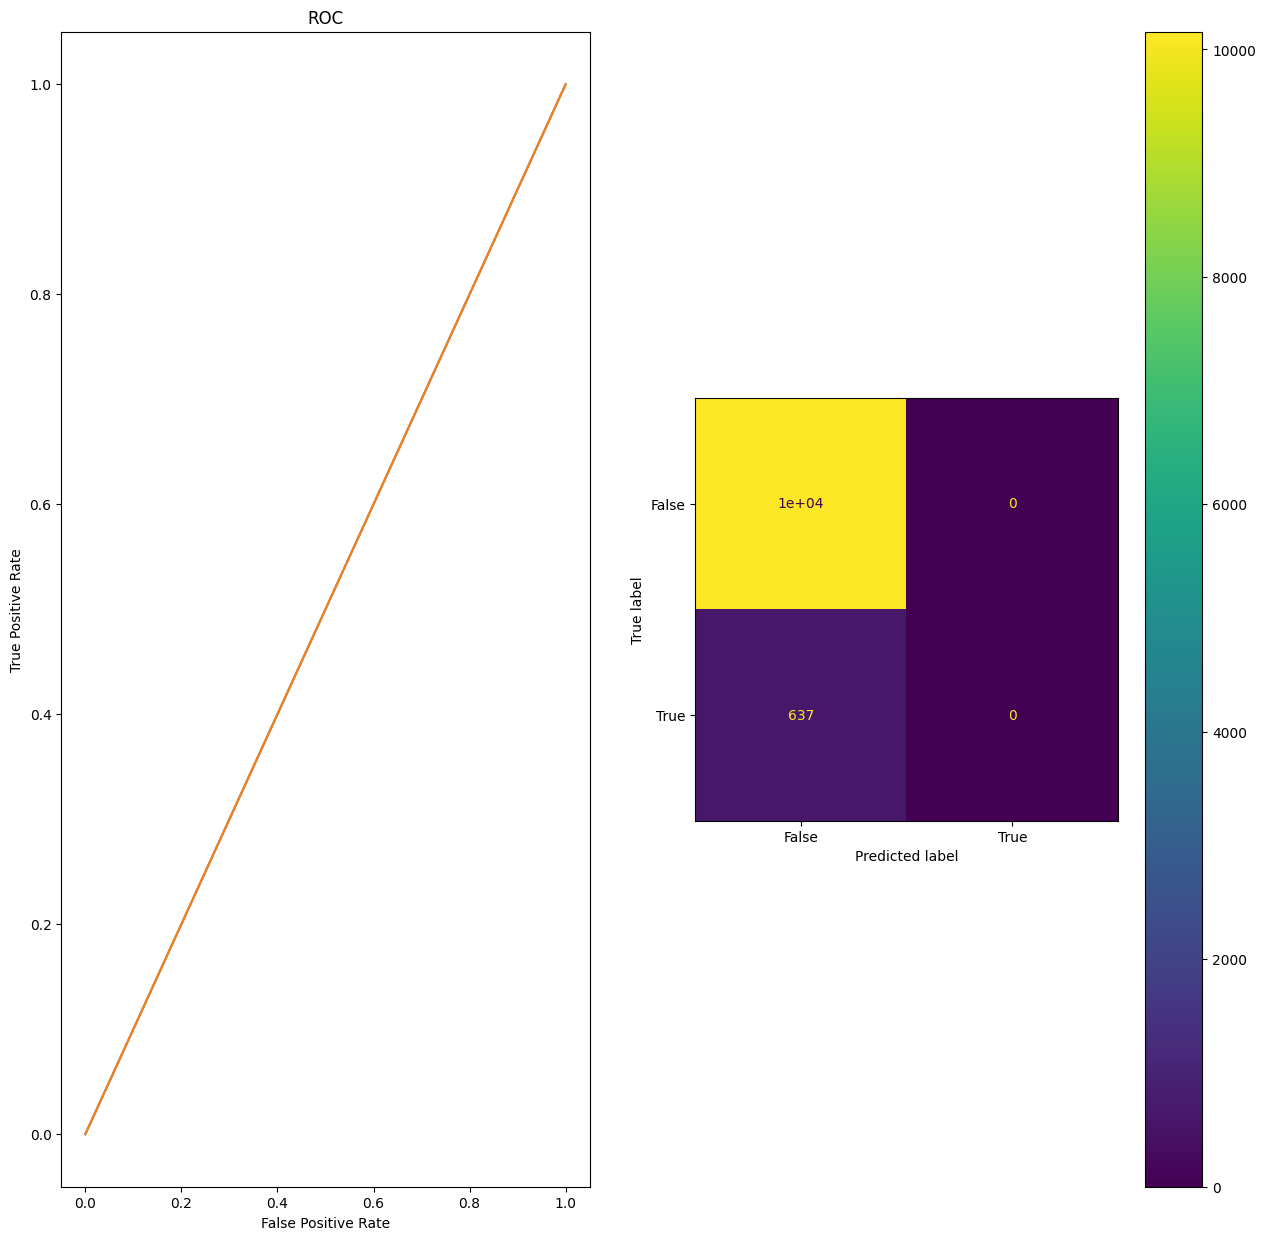

In [ ]:
model = svm.SVC(kernel="poly",degree=3 ,C = 5)
model.fit(gneralX_train, gneraly_train)
predictPoly = model.predict(gneralX_train)
scorForTrain(predictPoly ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.9381755296152183
recall_score for test data : 0.0
precision_score for test data : 0.0
f1_score for test data : 0.0
roc_auc_score for test data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


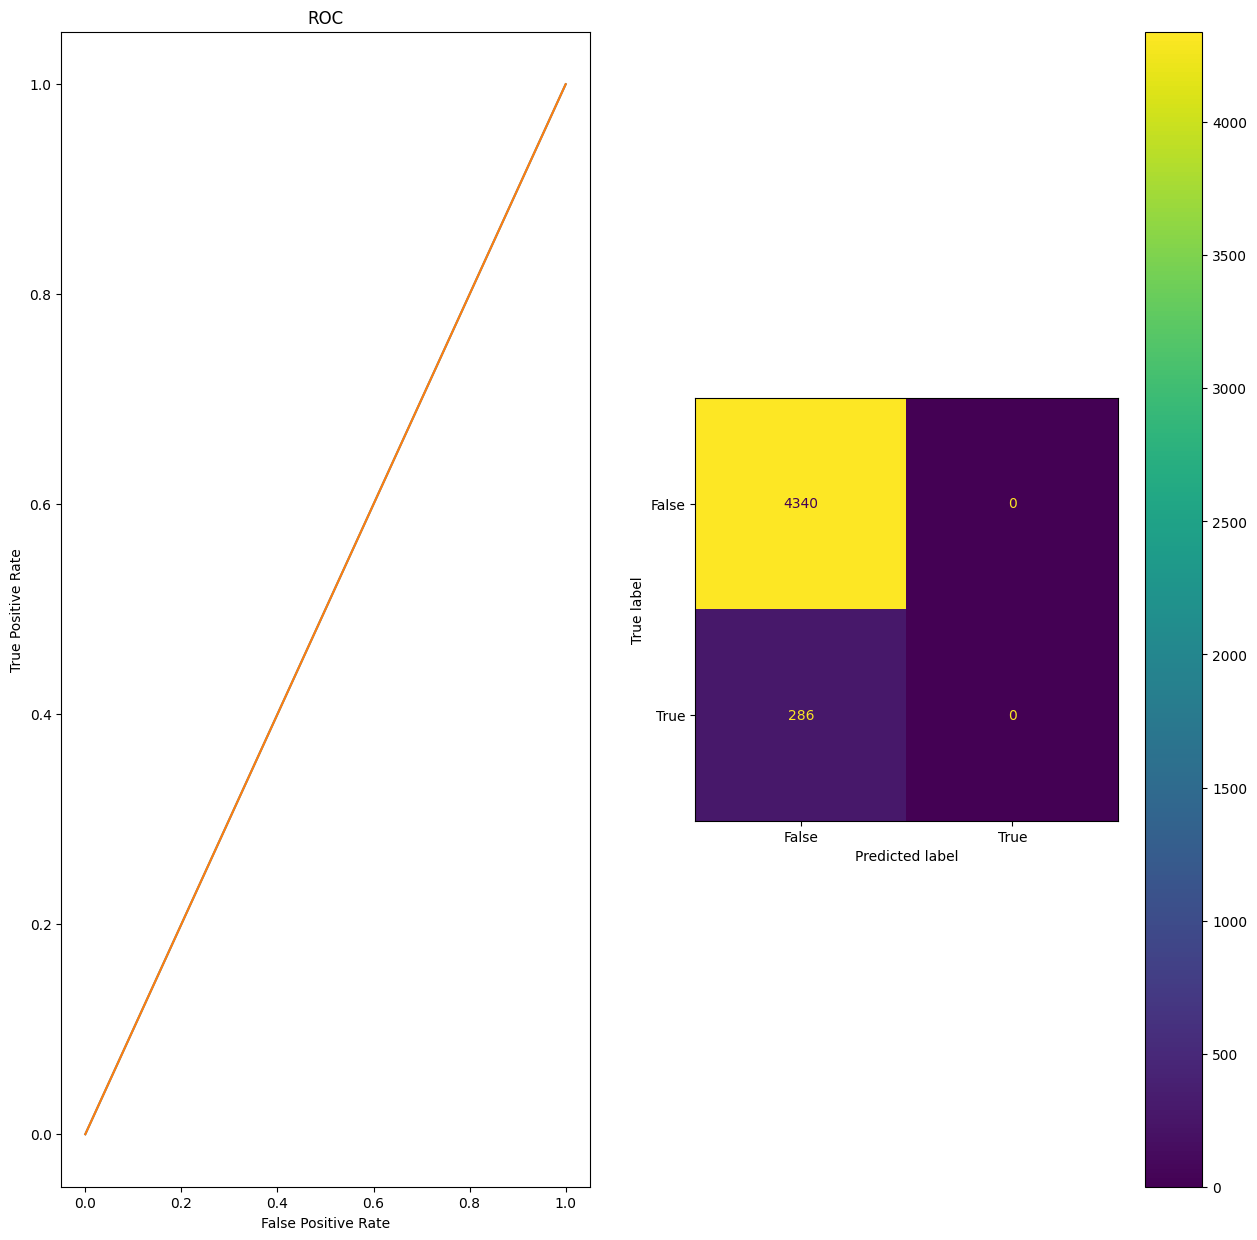

In [ ]:
predictPoly = model.predict(gneralX_test)
scorForTest(predictPoly ,gneraly_test)

### Undersmapling

Train DATA : 
accuracy_score for Train data : 0.8908551839155008
recall_score for Train data : 0.2119309262166405
precision_score for Train data : 0.16646115906288533
f1_score for Train data : 0.18646408839779008
roc_auc_score for Train data : 0.5726846438881549


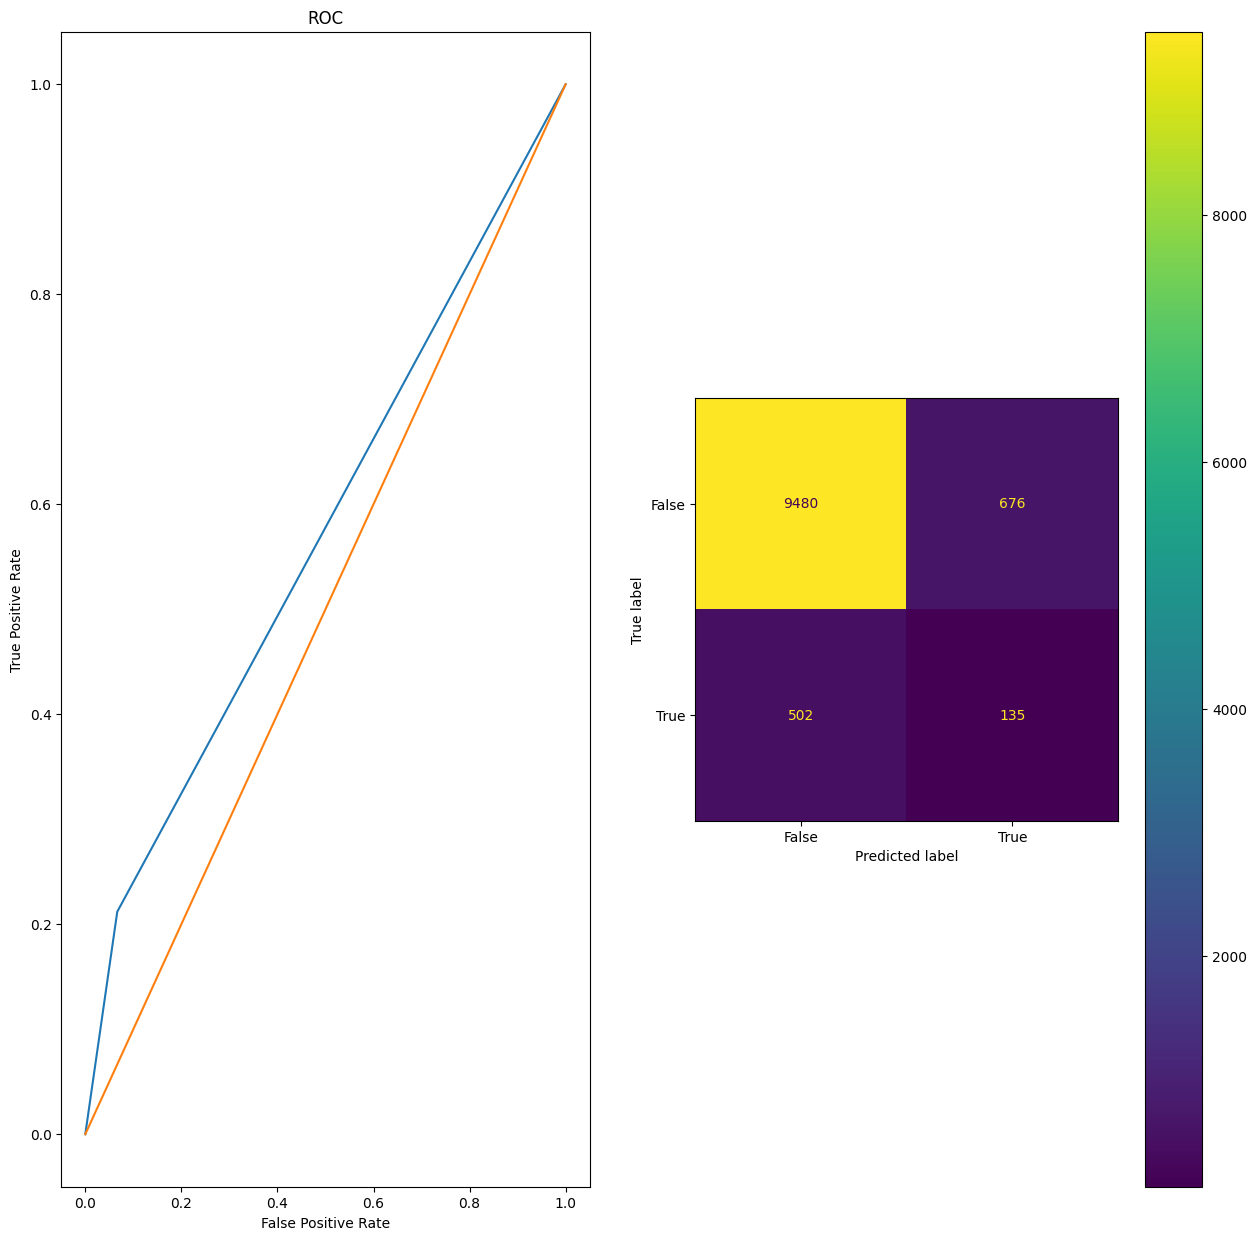

In [ ]:
model = svm.SVC(kernel="poly",degree=3 ,C = 5)
model.fit(X_under, y_under)
predictPoly = model.predict(gneralX_train)
scorForTrain(predictPoly ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.885430177258971
recall_score for test data : 0.1888111888111888
precision_score for test data : 0.1534090909090909
f1_score for test data : 0.16927899686520378
roc_auc_score for test data : 0.5600737971705714


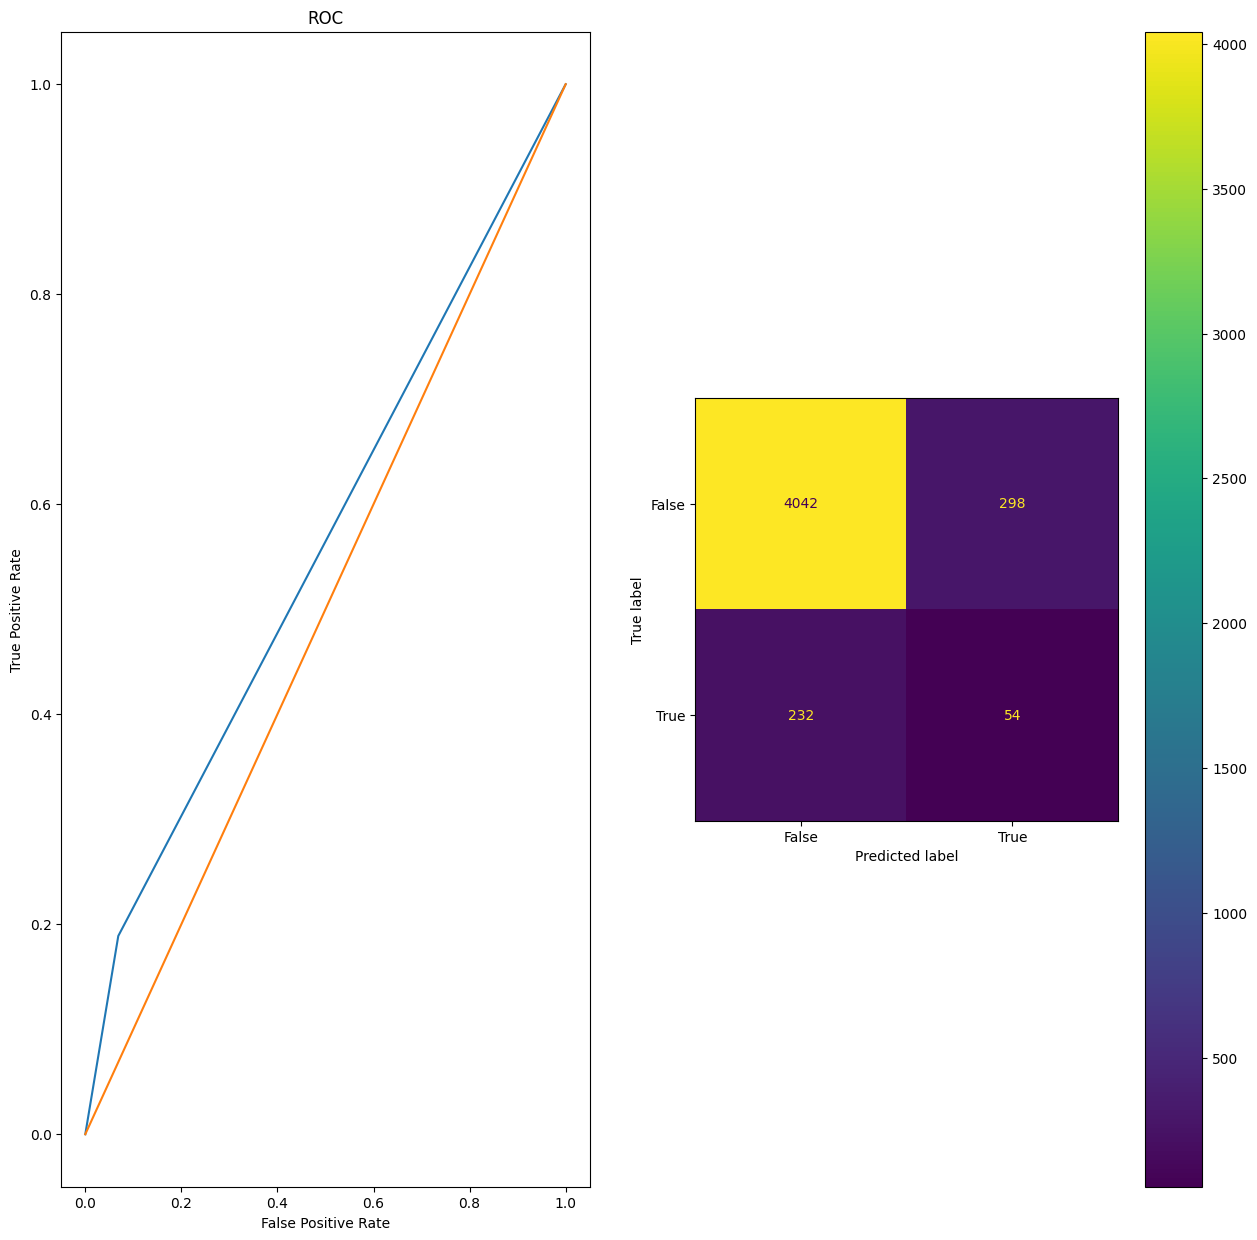

In [ ]:
predictPoly = model.predict(gneralX_test)
scorForTest(predictPoly ,gneraly_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

Train DATA : 
accuracy_score for Train data : 0.8363597060095115
recall_score for Train data : 0.38461538461538464
precision_score for Train data : 0.15918958031837915
f1_score for Train data : 0.22517911975435007
roc_auc_score for Train data : 0.6253722084367245


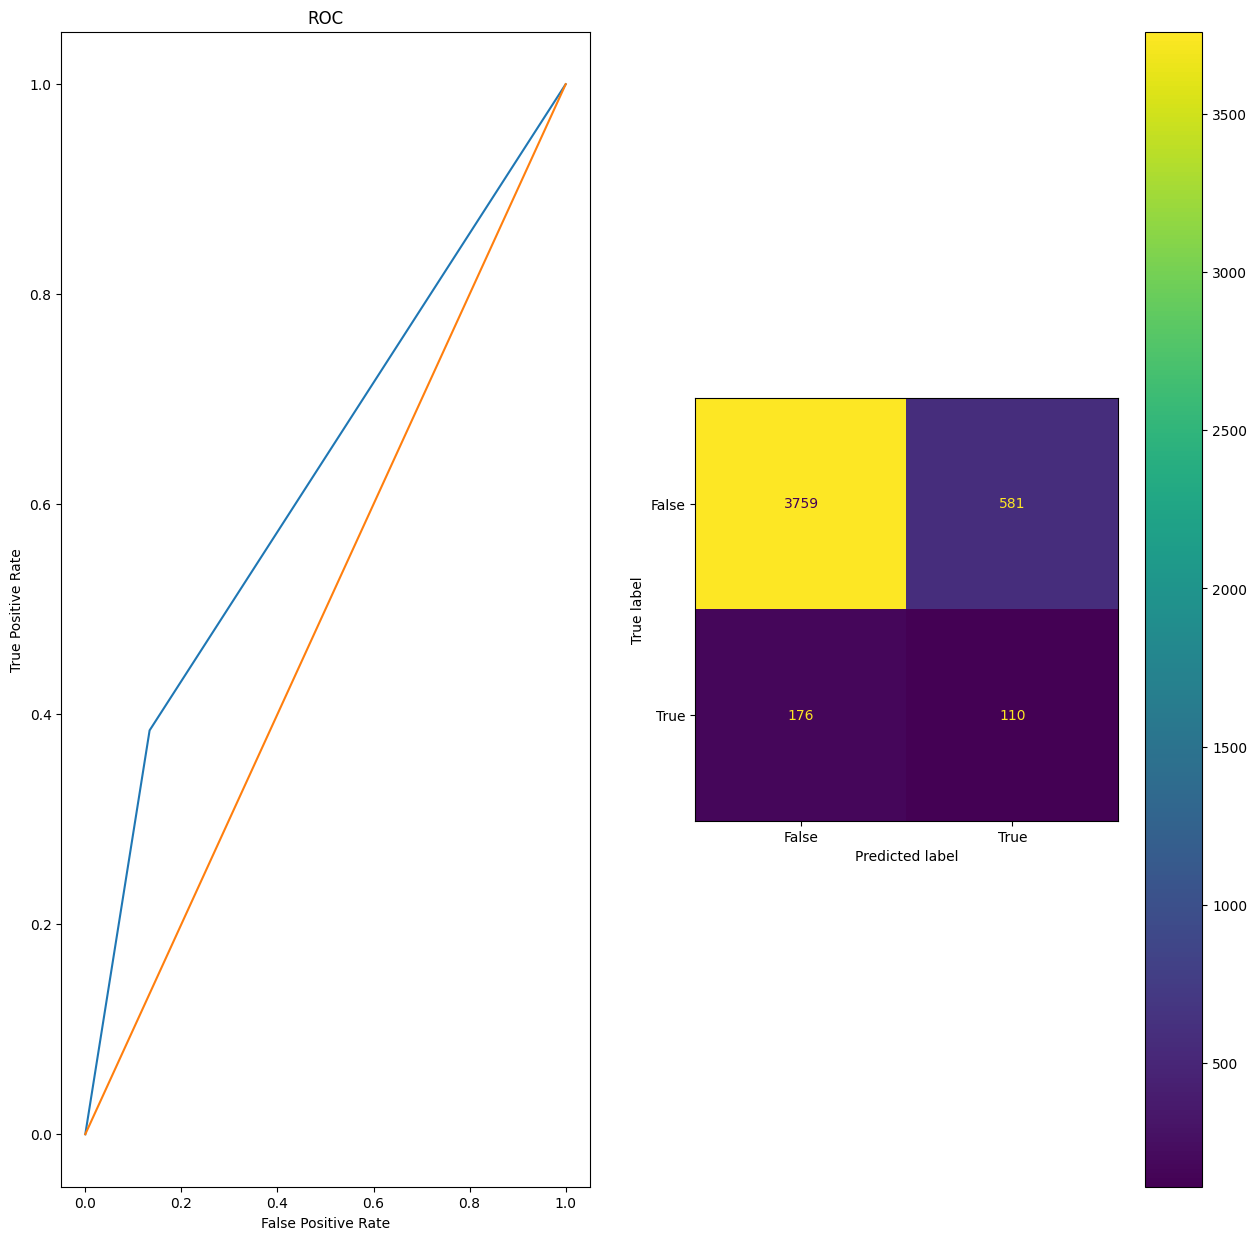

In [199]:
svc = svm.SVC()
parameters = {'C':[1, 10] ,'kernel':('linear', 'rbf')}
model = GridSearchCV(svc, parameters)
model.fit(X_under, y_under)
predictPoly = model.predict(gneralX_test)
scorForTrain(predictPoly ,gneraly_test)

Train DATA : 
accuracy_score for Train data : 0.7749675745784695
recall_score for Train data : 0.5699300699300699
precision_score for Train data : 0.150786308973173
f1_score for Train data : 0.23847841989758592
roc_auc_score for Train data : 0.6792046663014405


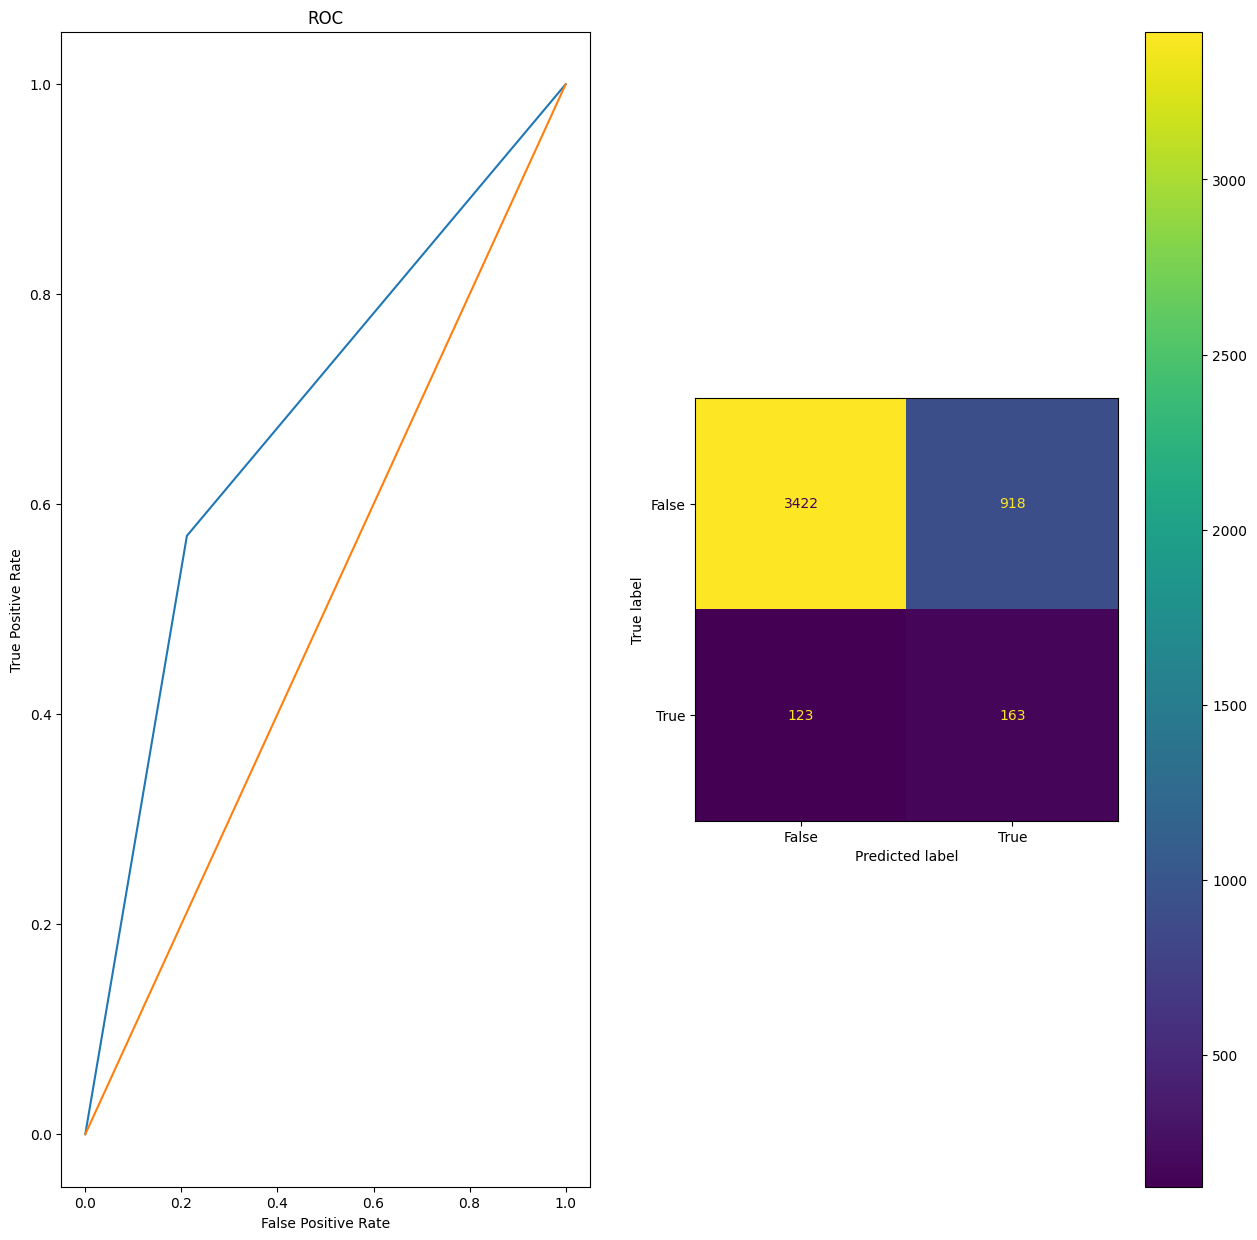

In [200]:
svc = svm.SVC()
parameters = {"kernel":["poly"],"degree": [2, 3, 4],"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
model = GridSearchCV(svc, parameters)
model.fit(X_under, y_under)
predictPoly = model.predict(gneralX_test)
scorForTrain(predictPoly ,gneraly_test)

### Ondersampling

Train DATA : 
accuracy_score for Train data : 0.8550912628555545
recall_score for Train data : 0.40188383045525905
precision_score for Train data : 0.17790132036136205
f1_score for Train data : 0.24662813102119463
roc_auc_score for Train data : 0.64270048159234


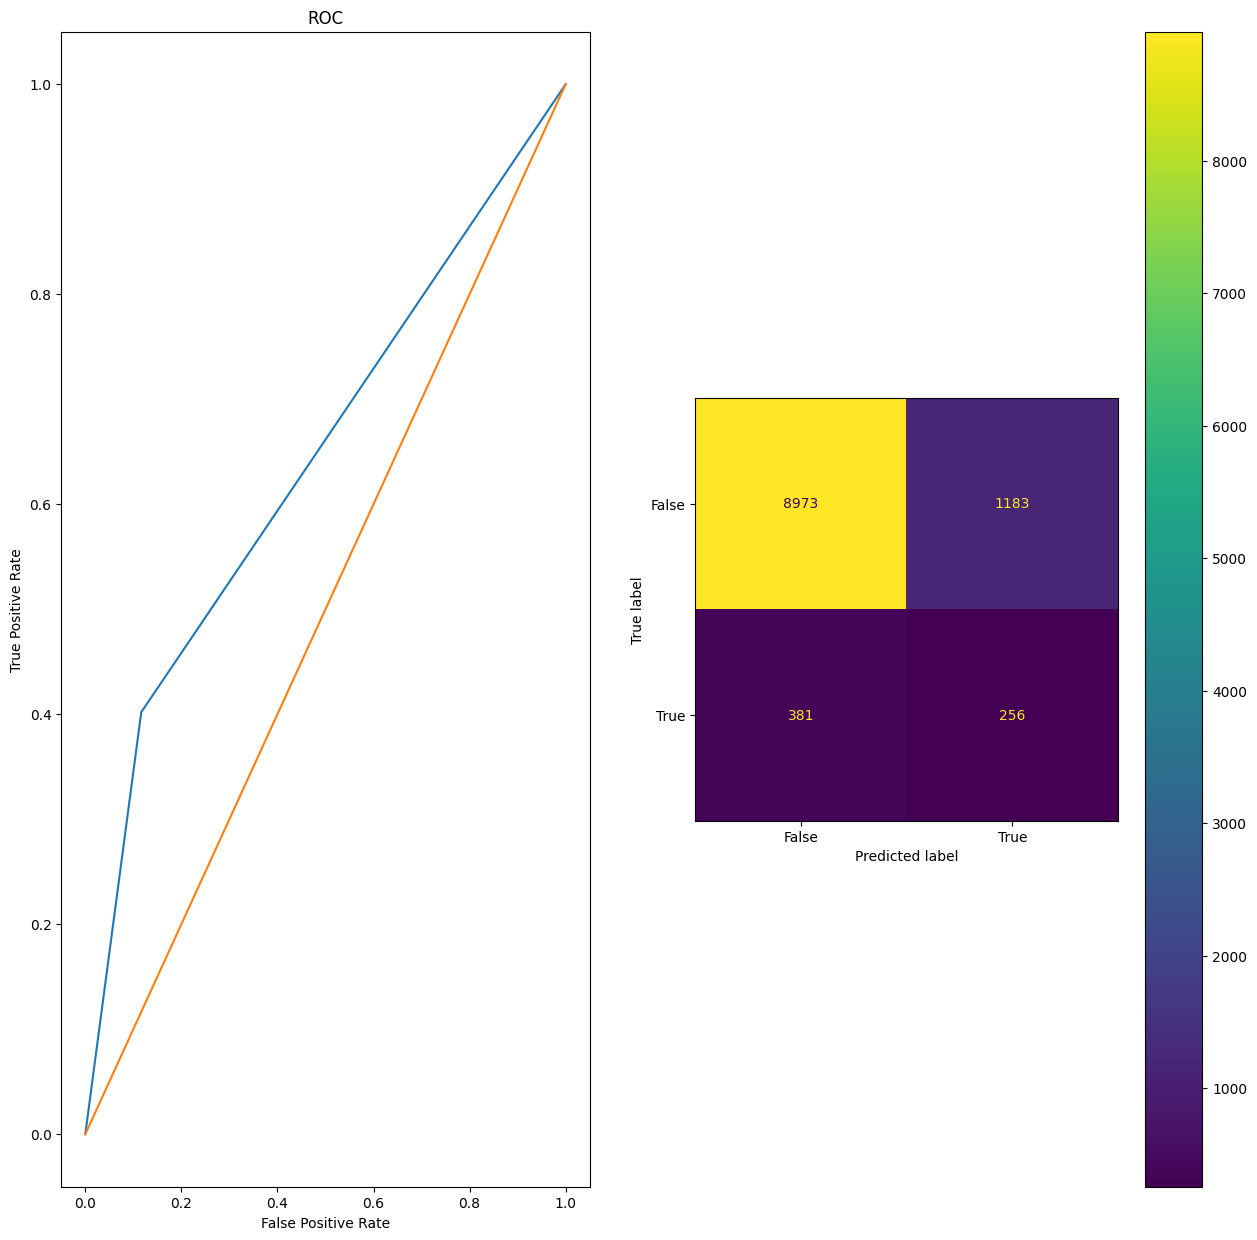

In [ ]:
model = svm.SVC(kernel="poly",degree=3 ,C = 5)
model.fit(X_over, y_over)
predictPoly = model.predict(gneralX_train)
scorForTrain(predictPoly ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8480328577604842
recall_score for test data : 0.3706293706293706
precision_score for test data : 0.1685214626391097
f1_score for test data : 0.23169398907103822
roc_auc_score for test data : 0.6250612290934872


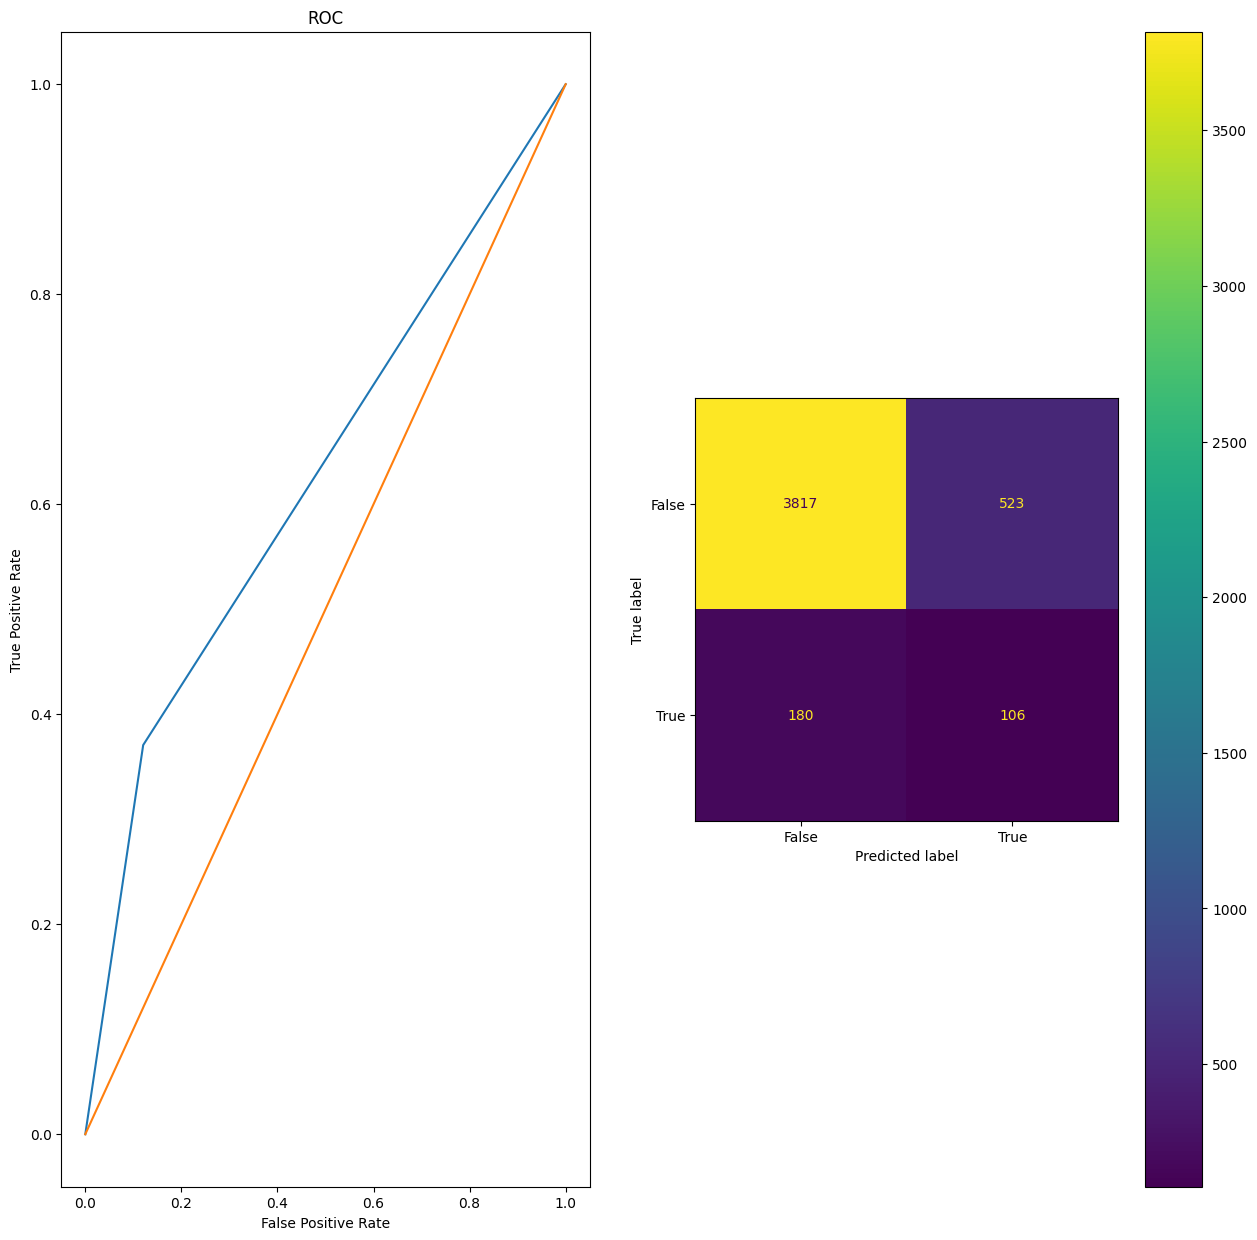

In [ ]:
predictPoly = model.predict(gneralX_test)
scorForTest(predictPoly ,gneraly_test)

In [202]:
svc = svm.SVC()
parameters = {"kernel":["poly"],"degree": [2, 3],"C": [0.0001, 0.001, 0.1, 1, 10]}
model = GridSearchCV(svc, parameters)
model.fit(X_over, y_over)
predictPoly = model.predict(gneralX_test)
scorForTrain(predictPoly ,gneraly_test)

KeyboardInterrupt: ignored

## RBF Kernel

### Imbalance Data

Train DATA : 
accuracy_score for Train data : 0.9409802649865654
recall_score for Train data : 0.0
precision_score for Train data : 0.0
f1_score for Train data : 0.0
roc_auc_score for Train data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


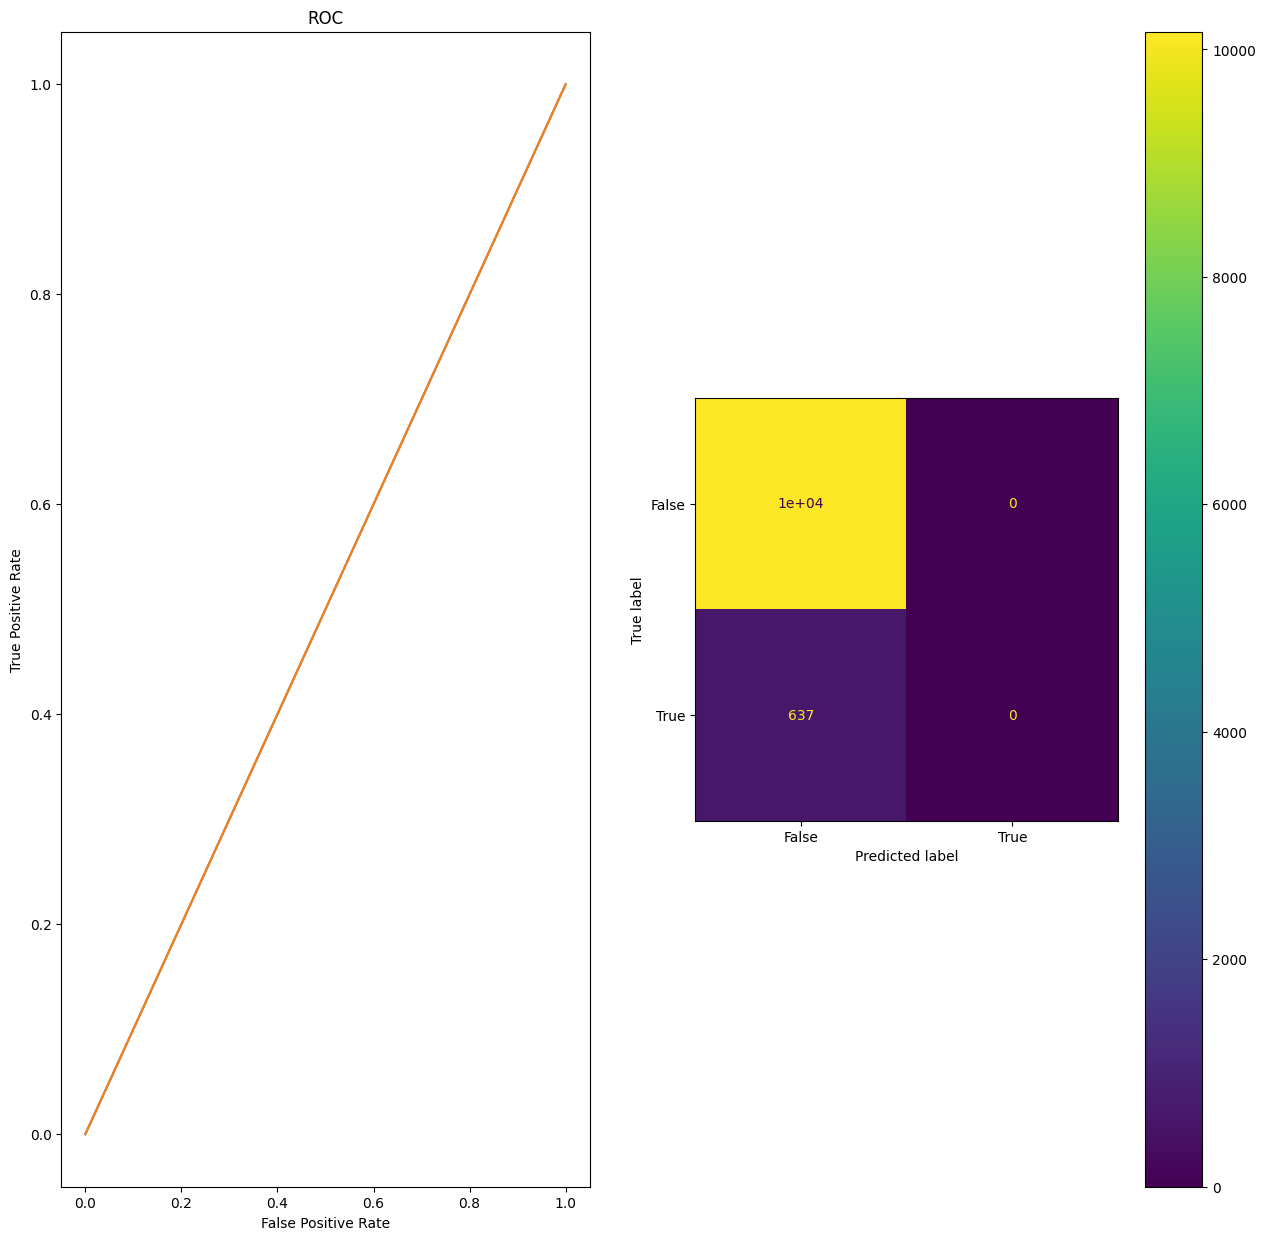

In [ ]:
model = svm.SVC(kernel="rbf")
model.fit(gneralX_train, gneraly_train)
predictRbf = model.predict(gneralX_train)
scorForTrain(predictRbf ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.9381755296152183
recall_score for Train data : 0.0
precision_score for Train data : 0.0
f1_score for Train data : 0.0
roc_auc_score for Train data : 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


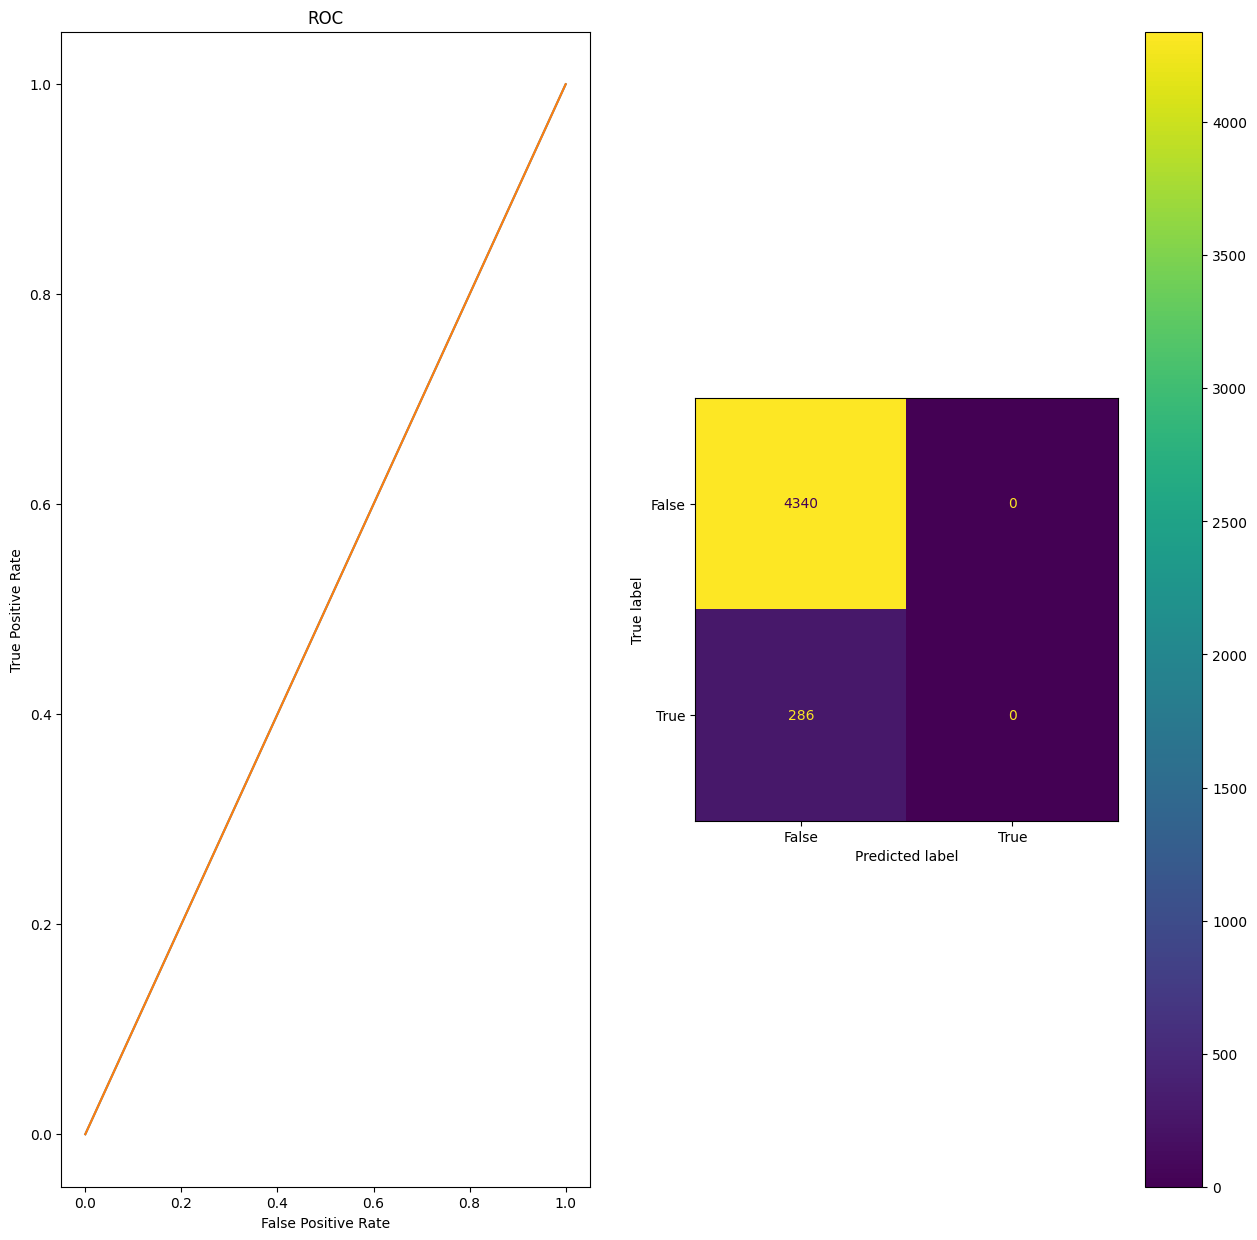

In [ ]:
predictRbf = model.predict(gneralX_test)
scorForTrain(predictRbf ,gneraly_test)

In [ ]:
y_under

0       0
1       0
2       0
3       0
4       0
       ..
1906    1
1907    1
1908    1
1909    1
1910    1
Name: FraudFound_P, Length: 1911, dtype: int64

### Oversampling

Train DATA : 
accuracy_score for Train data : 0.8776985082924117
recall_score for Train data : 0.34379905808477235
precision_score for Train data : 0.19536128456735058
f1_score for Train data : 0.24914675767918087
roc_auc_score for Train data : 0.627492282094769


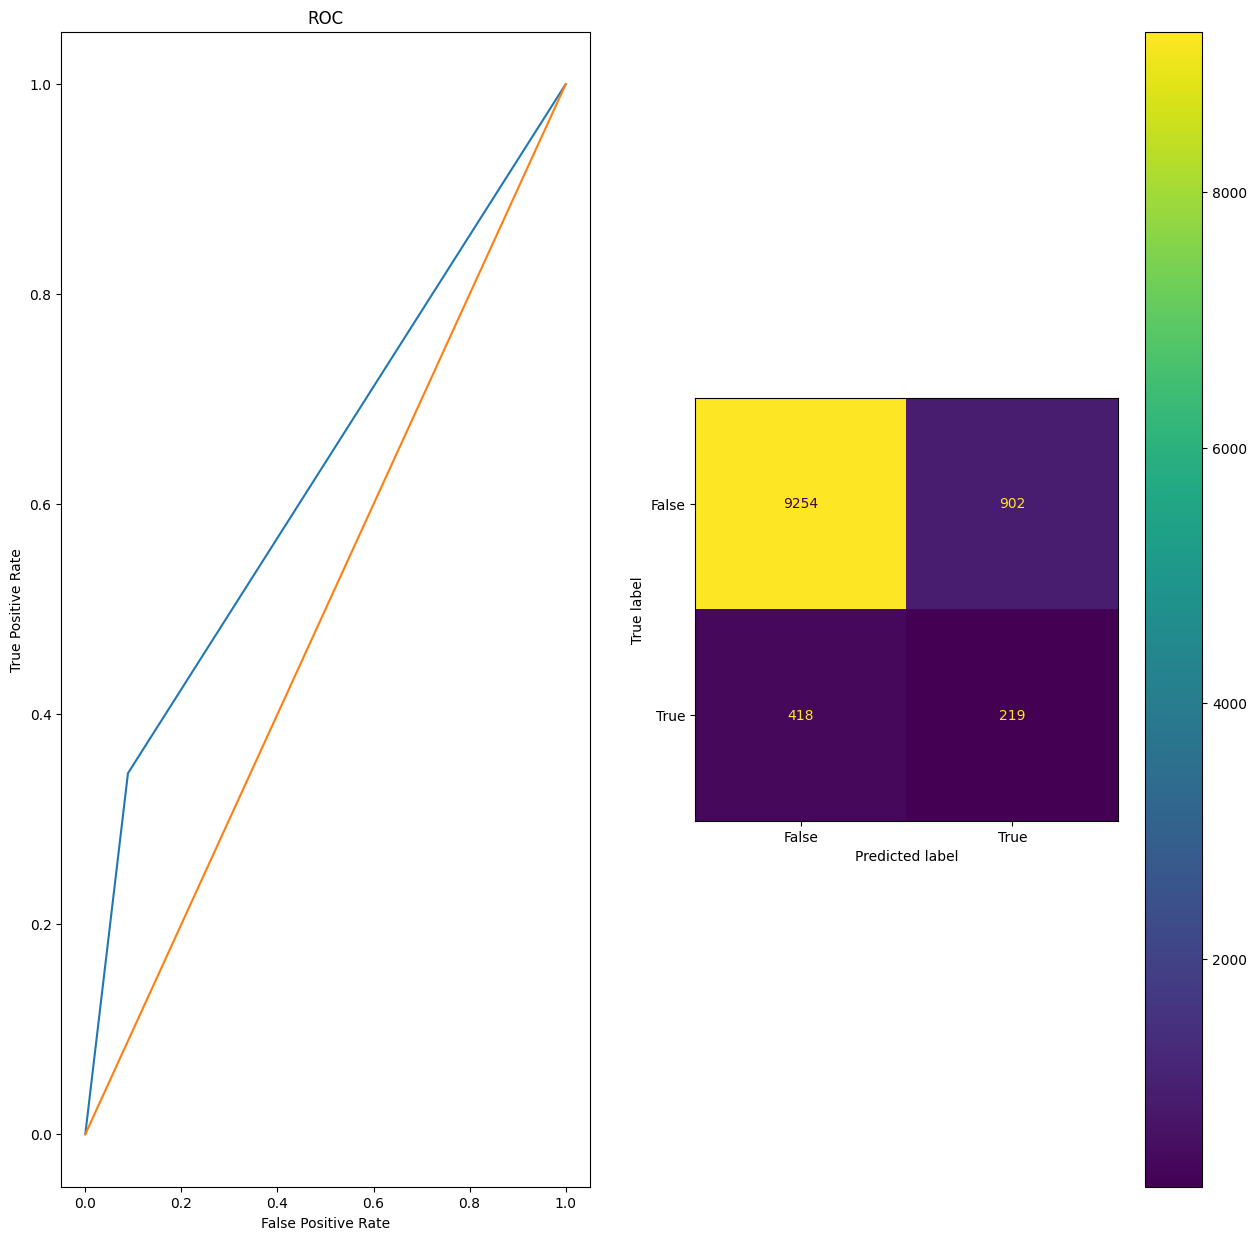

In [ ]:
model = svm.SVC(kernel="rbf")
model.fit(X_over, y_over)
predictRbf = model.predict(gneralX_train)
scorForTrain(predictRbf ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.8674881106787722
recall_score for test data : 0.2902097902097902
precision_score for test data : 0.16835699797160245
f1_score for test data : 0.2130937098844673
roc_auc_score for test data : 0.5978698720634205


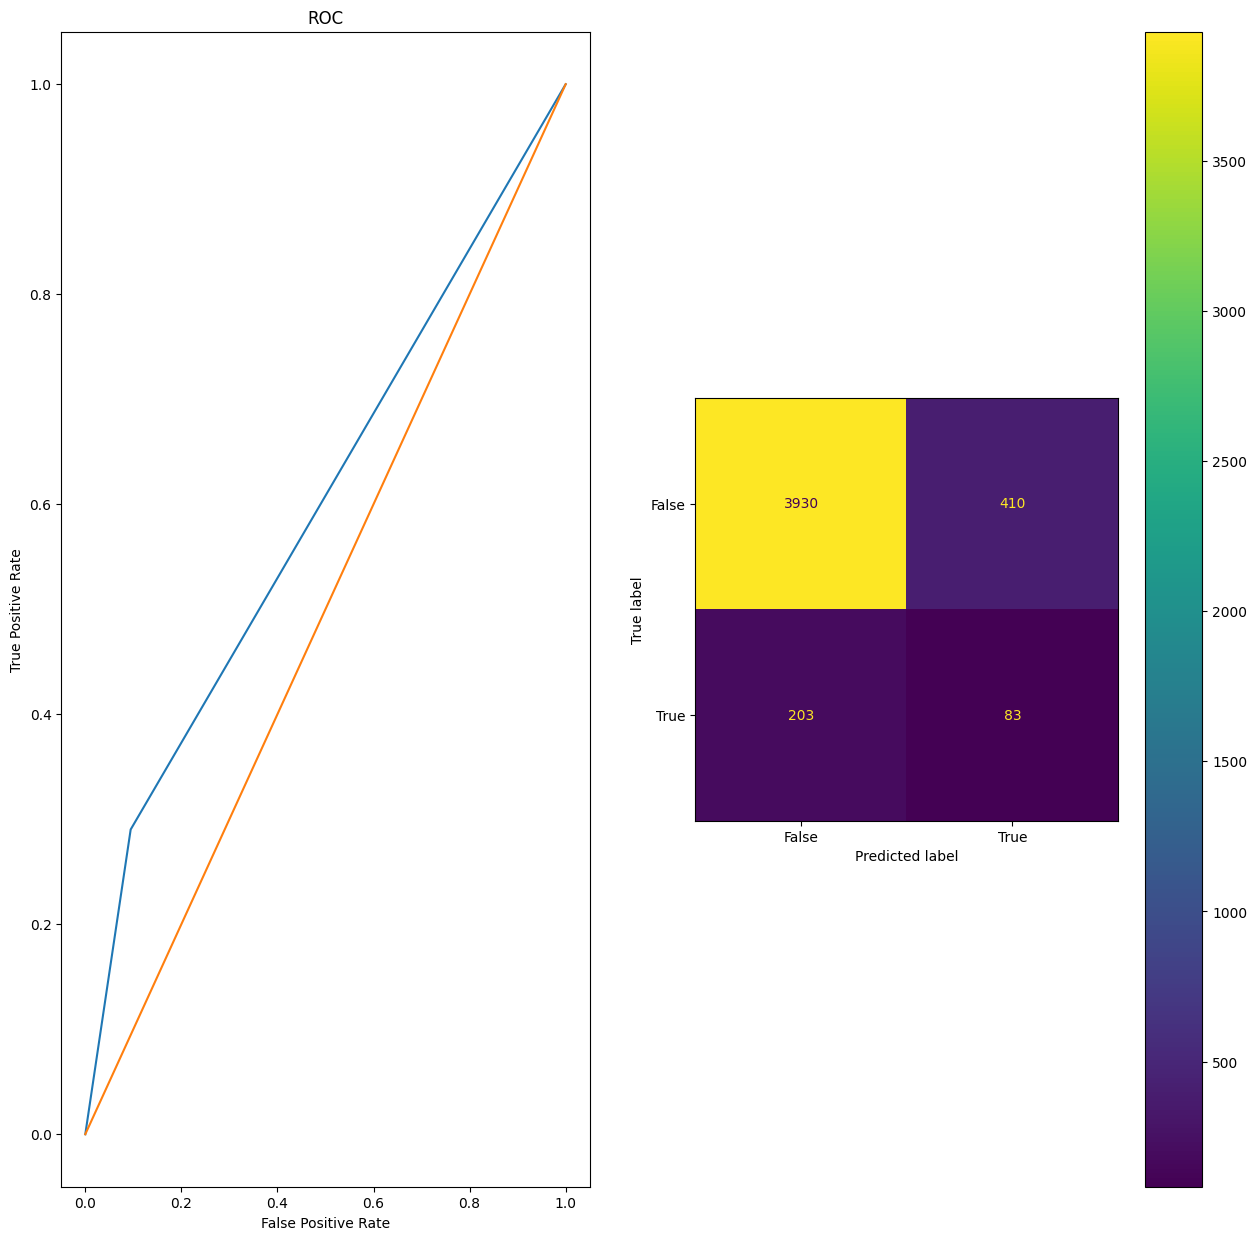

In [ ]:
predictRbf = model.predict(gneralX_test)
scorForTest(predictRbf ,gneraly_test)

In [ ]:
from sklearn import tree

## Decision Tree

### imblance data

Train DATA : 
accuracy_score for Train data : 1.0
recall_score for Train data : 1.0
precision_score for Train data : 1.0
f1_score for Train data : 1.0
roc_auc_score for Train data : 1.0


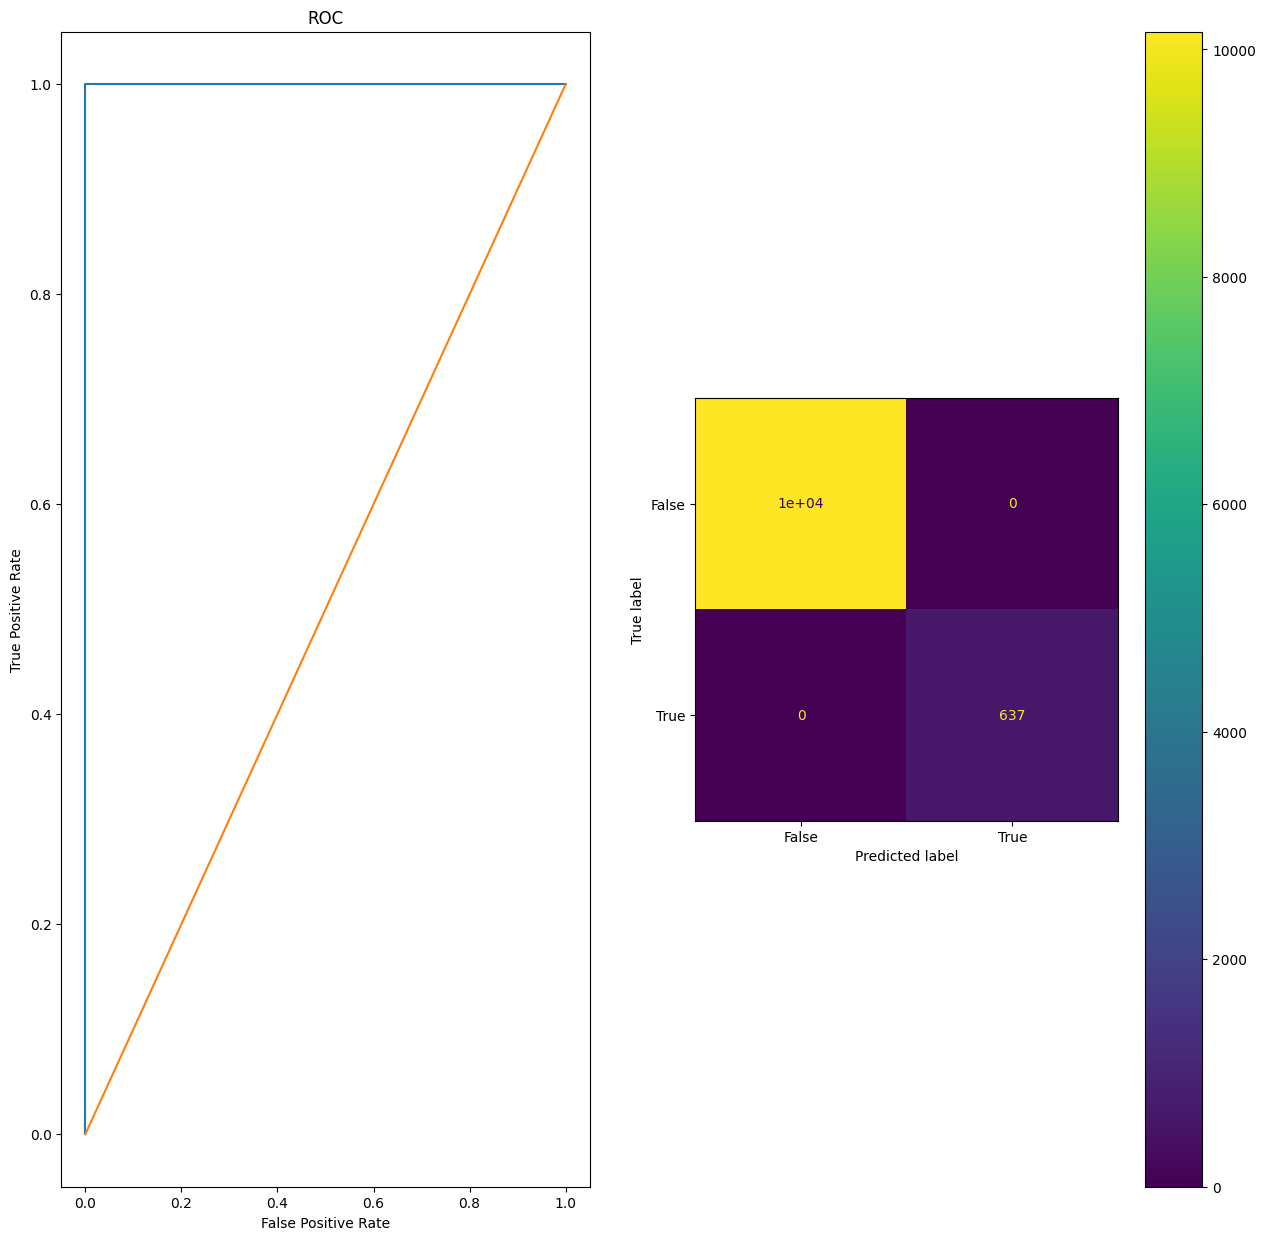

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(gneralX_train, gneraly_train)
predictTree = model.predict(gneralX_train)
scorForTrain(predictTree ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.8024645603631984
recall_score for Train data : 1.0
precision_score for Train data : 0.2300469483568075
f1_score for Train data : 0.37404580152671757
roc_auc_score for Train data : 0.8950374163056322


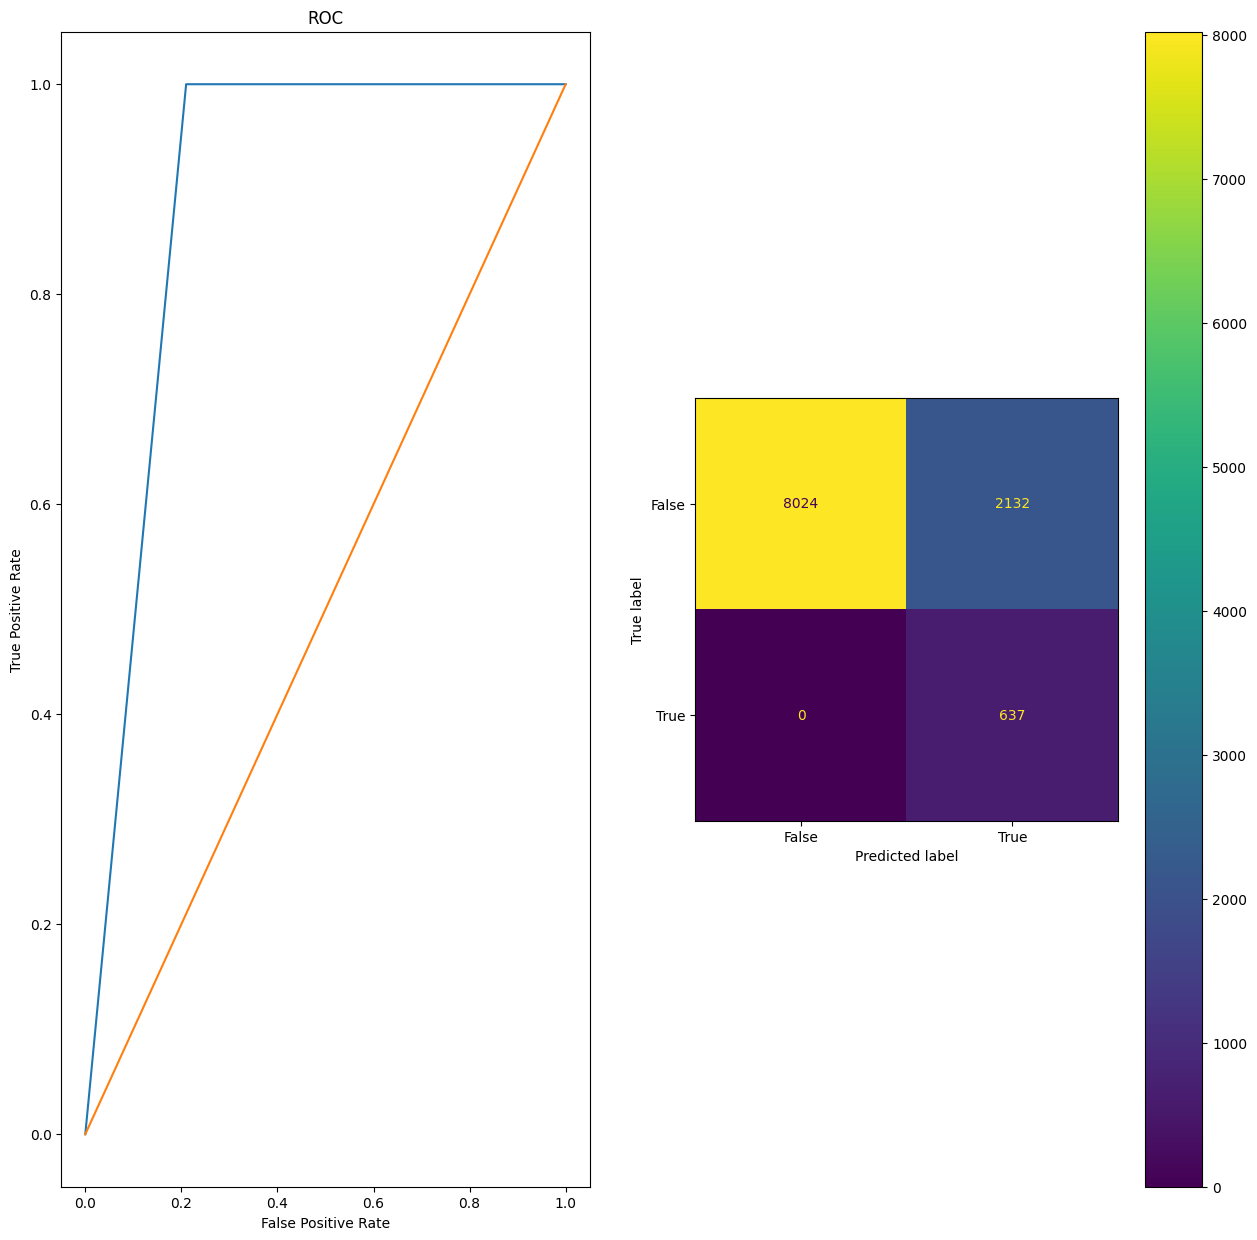

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_under, y_under)
predictTree = model.predict(gneralX_train)
scorForTrain(predictTree ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.7507565931690445
recall_score for Train data : 0.583916083916084
precision_score for Train data : 0.13905079100749376
f1_score for Train data : 0.22461331540013452
roc_auc_score for Train data : 0.6728336179949084


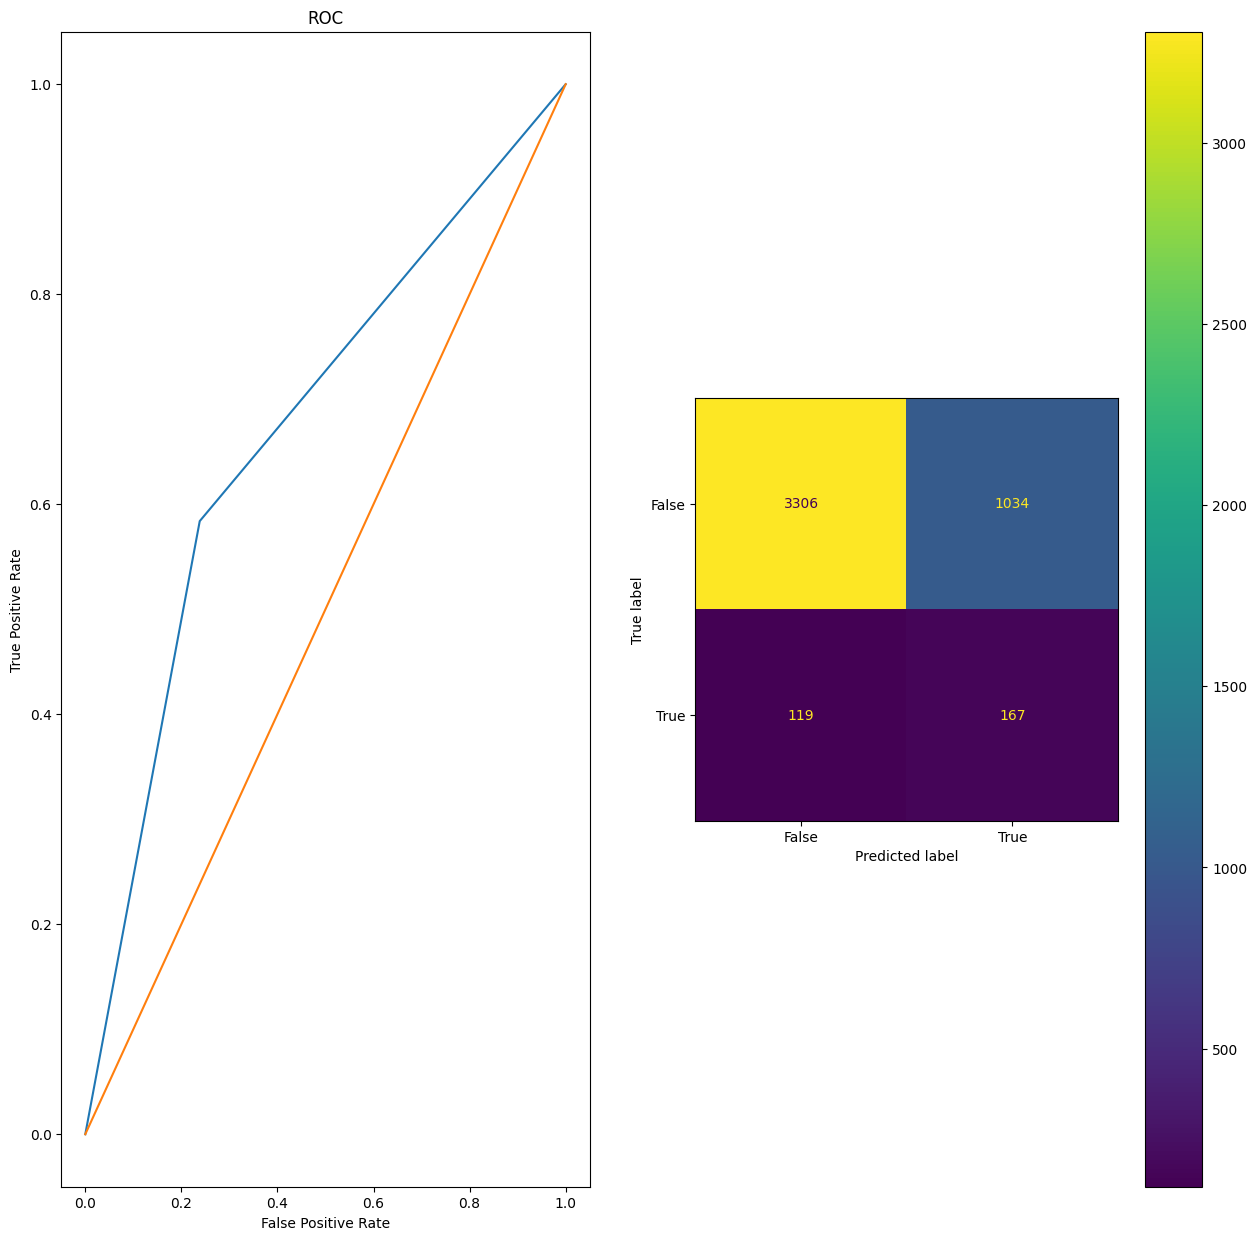

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_under, y_under)
predictTree = model.predict(gneralX_test)
scorForTrain(predictTree ,gneraly_test)

In [ ]:
import statistics

In [ ]:
len(ccp_alphas)

703

Train DATA : 
accuracy_score for Train data : 0.8149726674696562
recall_score for Train data : 0.4725274725274725
precision_score for Train data : 0.15341488277268095
f1_score for Train data : 0.2316275490573297
roc_auc_score for Train data : 0.6544894156650753


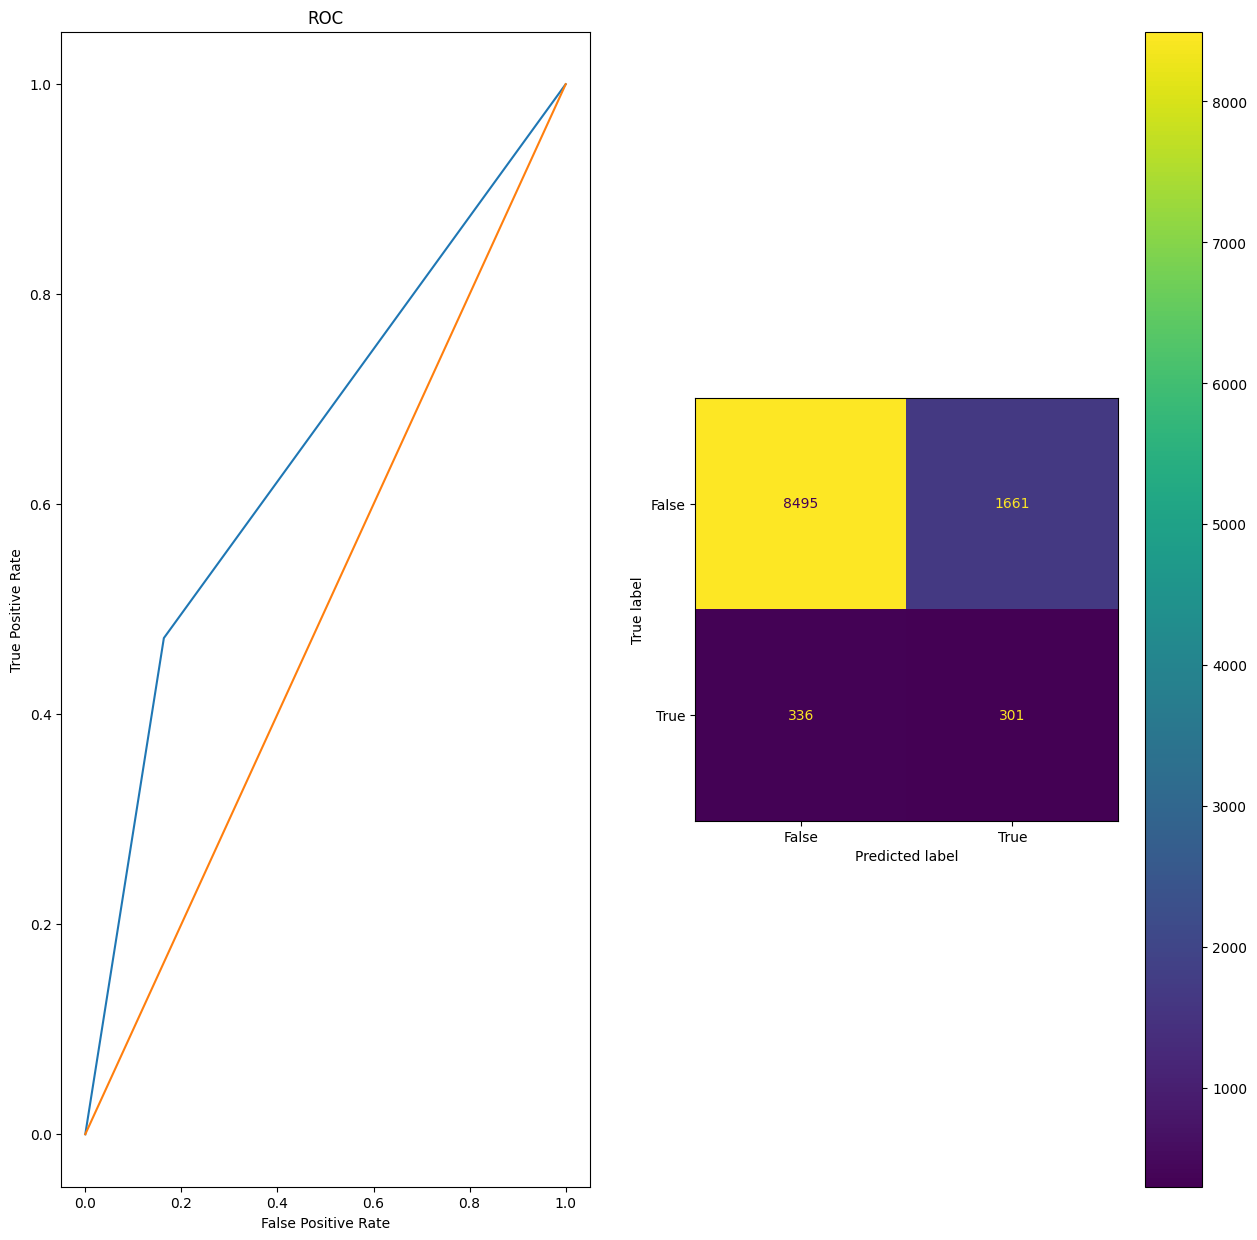

In [ ]:
model = tree.DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(X_over, y_over)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#for ccp_alpha in ccp_alphas:
clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=(ccp_alphas[700]))
clf.fit(X_over, y_over)
predictTree = clf.predict(gneralX_train)
scorForTrain(predictTree ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.8162559446606139
recall_score for Train data : 0.47202797202797203
precision_score for Train data : 0.1618705035971223
f1_score for Train data : 0.24107142857142858
roc_auc_score for Train data : 0.6554840320969353


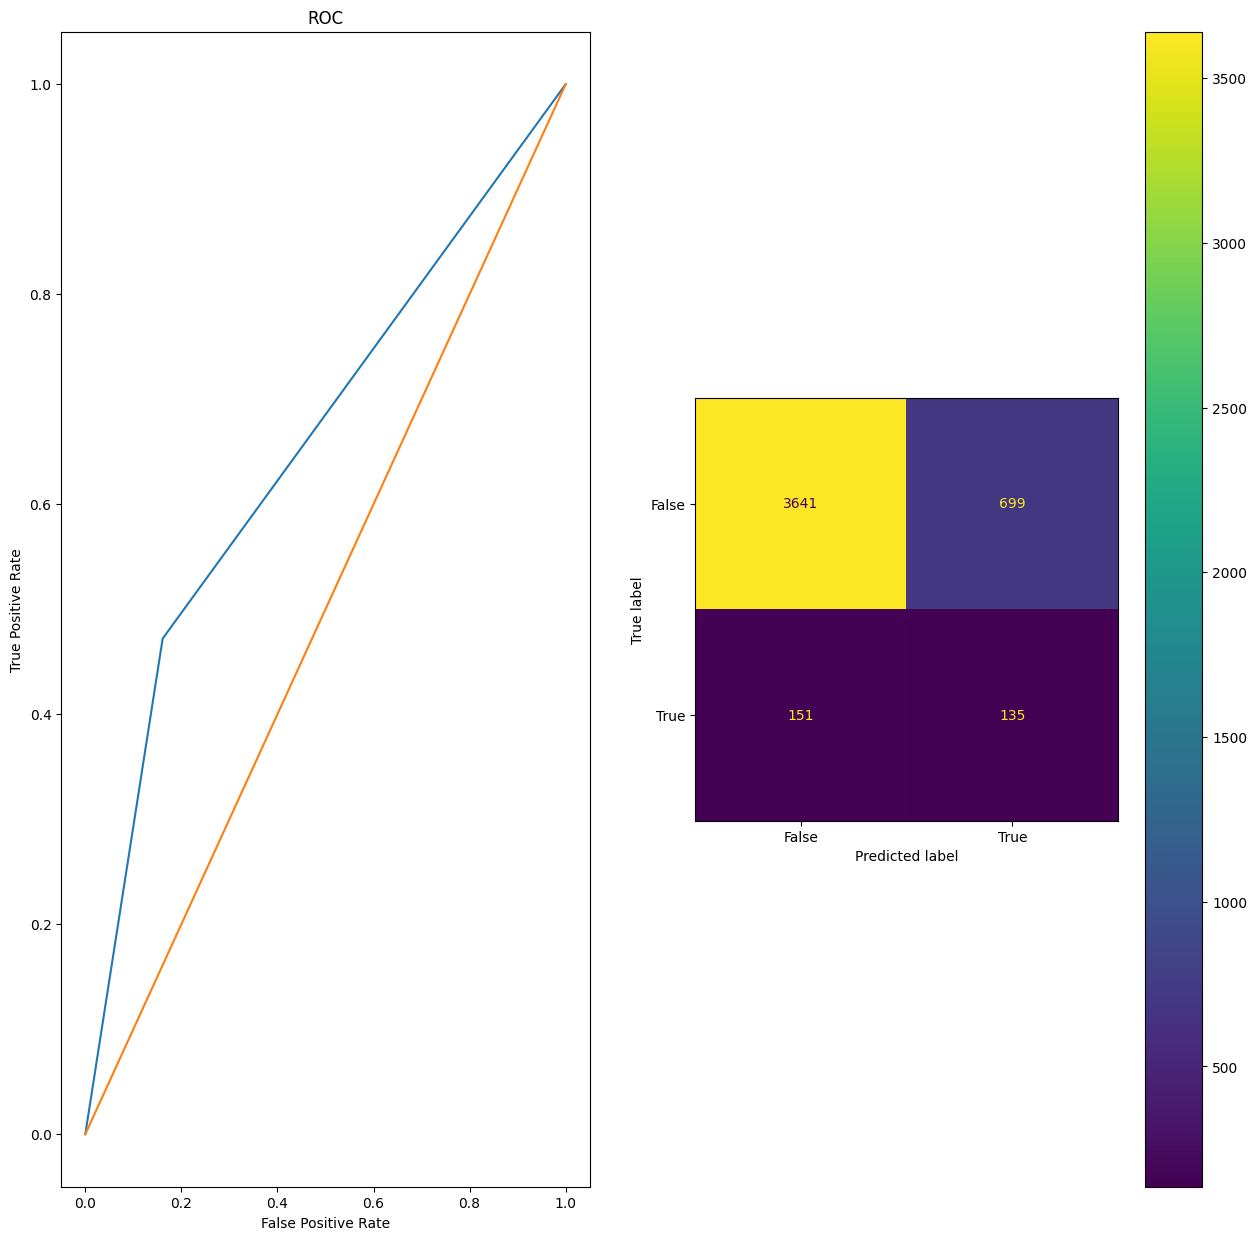

In [ ]:
predictTree = clf.predict(gneralX_test)
scorForTrain(predictTree ,gneraly_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier

### imblance data

Train DATA : 
accuracy_score for Train data : 0.9822106921152599
recall_score for Train data : 0.6985871271585558
precision_score for Train data : 1.0
f1_score for Train data : 0.822550831792976
roc_auc_score for Train data : 0.8492935635792779


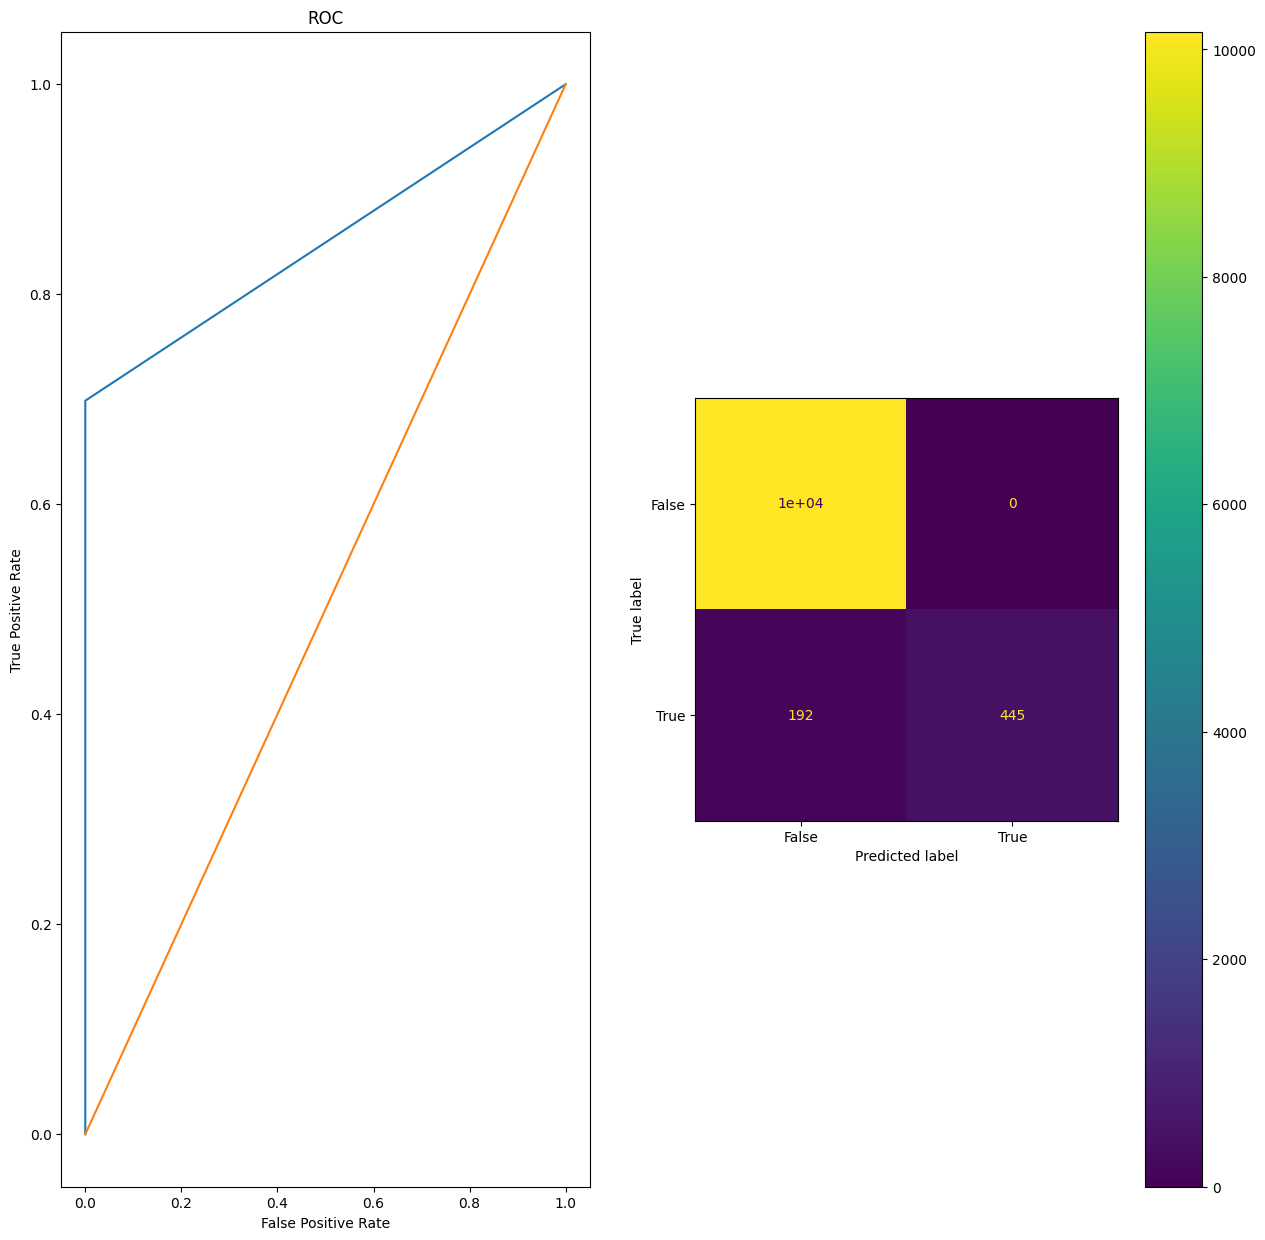

In [ ]:
model = RandomForestClassifier(max_depth=17, random_state=0)
model.fit(gneralX_train, gneraly_train)
predic = model.predict(gneralX_train)
scorForTrain(predic ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.9383916990920882
recall_score for Train data : 0.0034965034965034965
precision_score for Train data : 1.0
f1_score for Train data : 0.006968641114982578
roc_auc_score for Train data : 0.5017482517482518


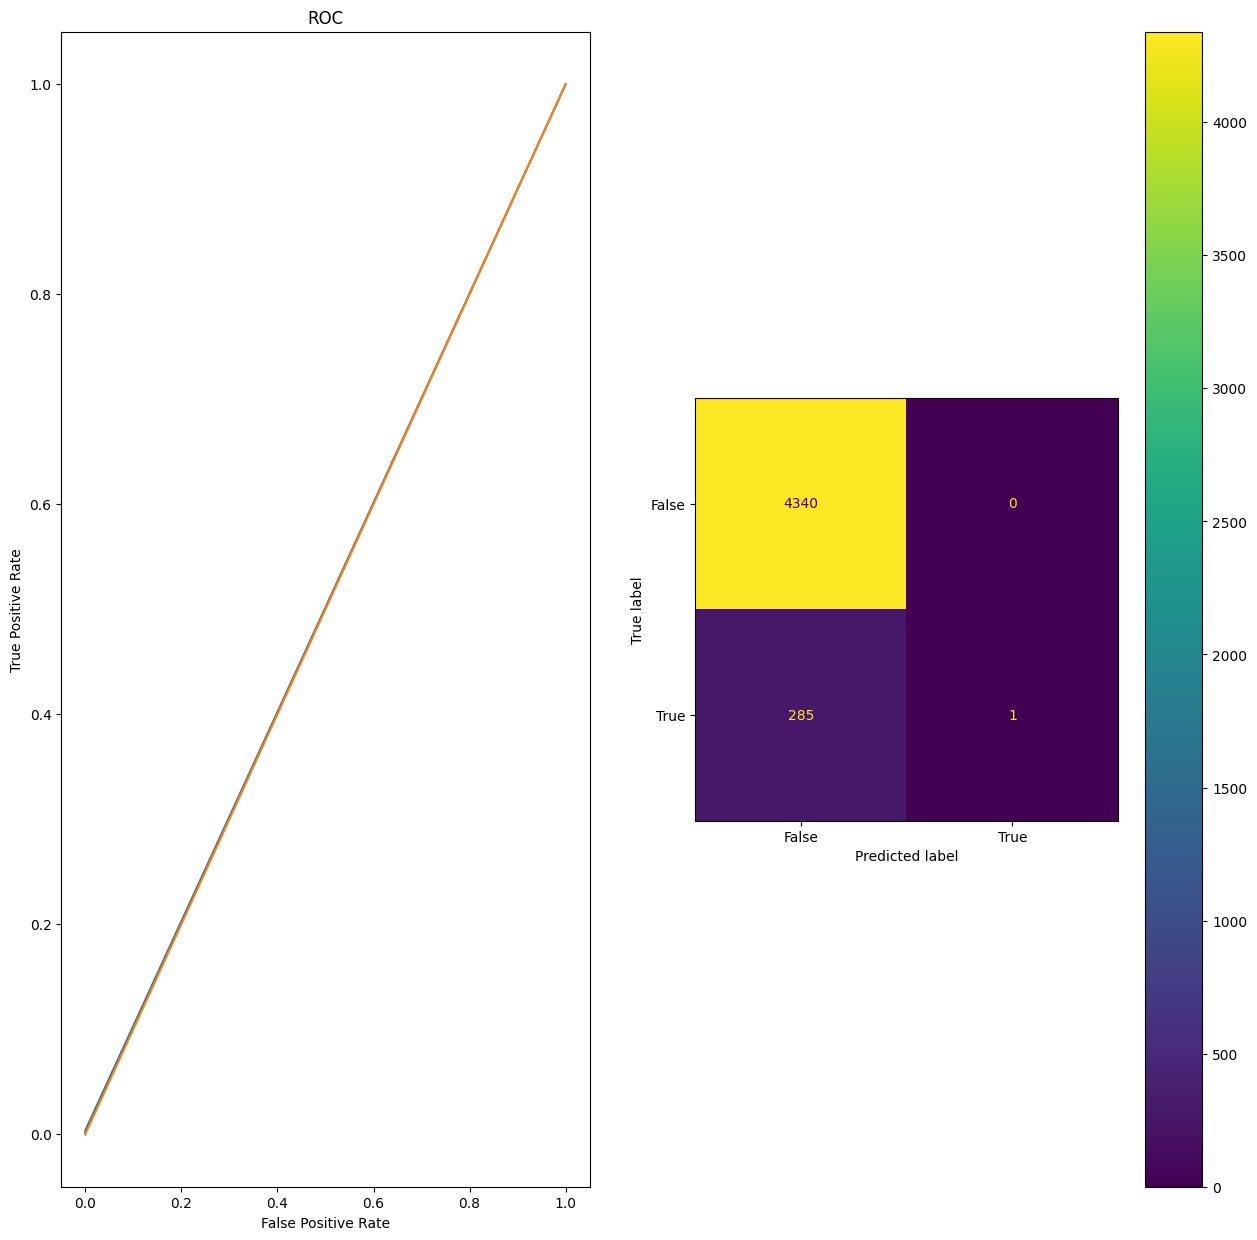

In [ ]:
predic = model.predict(gneralX_test)
scorForTrain(predic ,gneraly_test)

## *Oversampling*

Train DATA : 
accuracy_score for Train data : 0.9881404614101733
recall_score for Train data : 0.9843014128728415
precision_score for Train data : 0.8416107382550335
f1_score for Train data : 0.9073806078147612
roc_auc_score for Train data : 0.9863413326672202


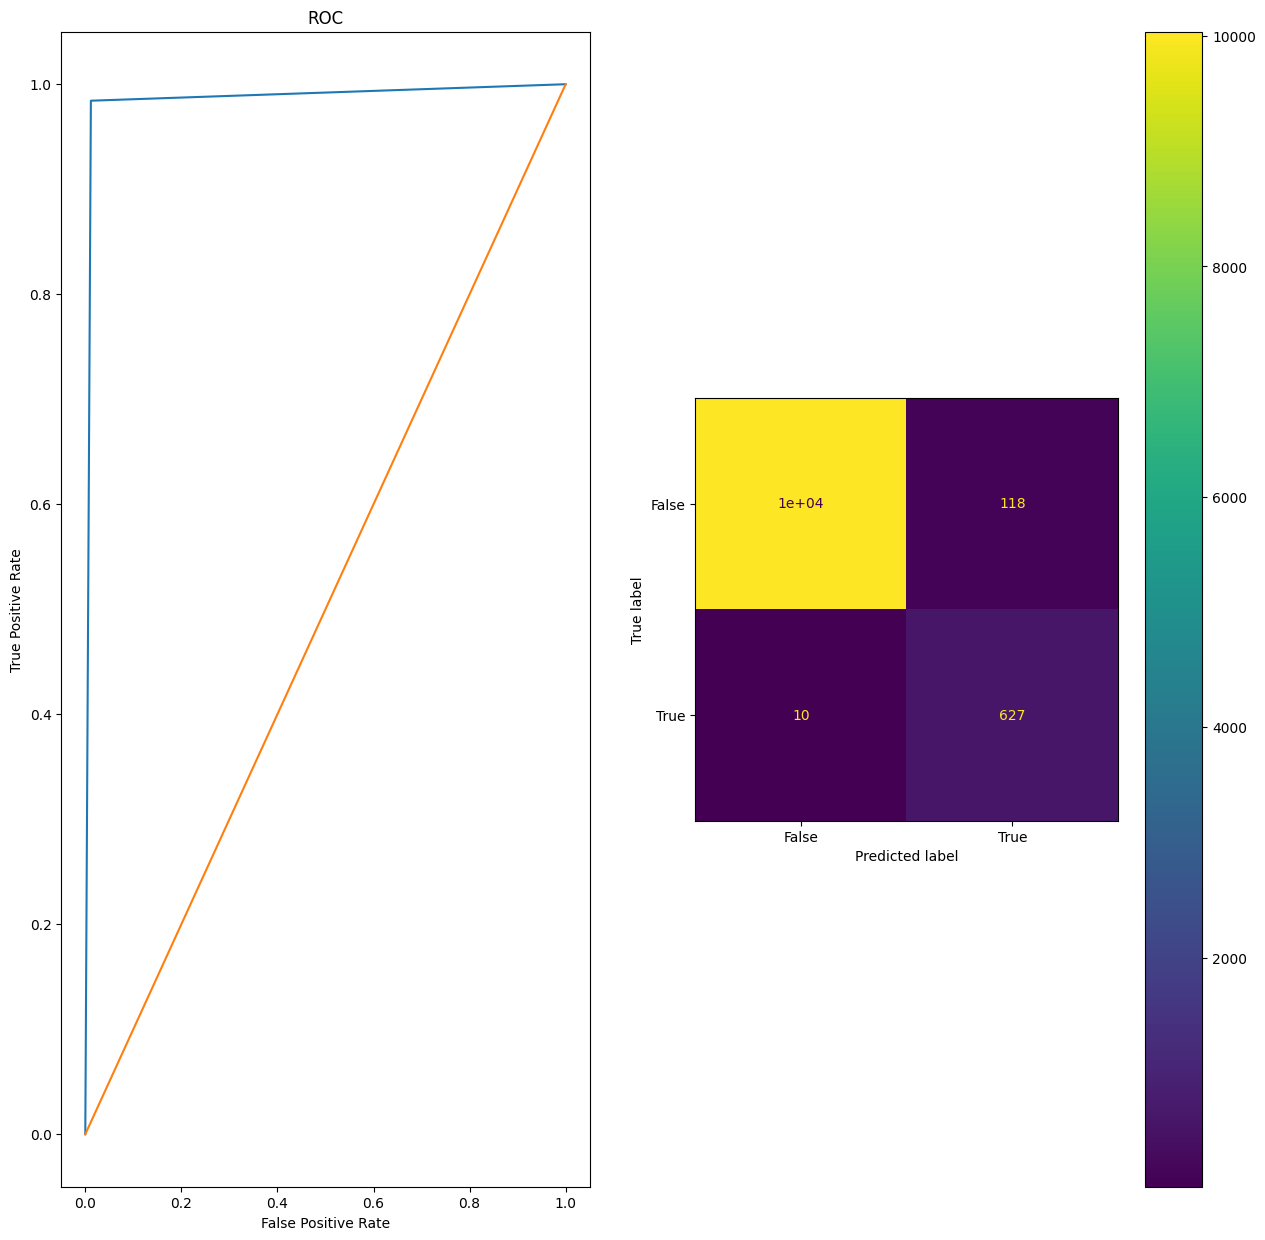

In [ ]:
model = RandomForestClassifier(max_depth=17, random_state=0)
model.fit(X_over, y_over)
predic = model.predict(gneralX_train)
scorForTrain(predic ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.9092088197146563
recall_score for Train data : 0.16433566433566432
precision_score for Train data : 0.20614035087719298
f1_score for Train data : 0.18287937743190658
roc_auc_score for Train data : 0.5613152976056202


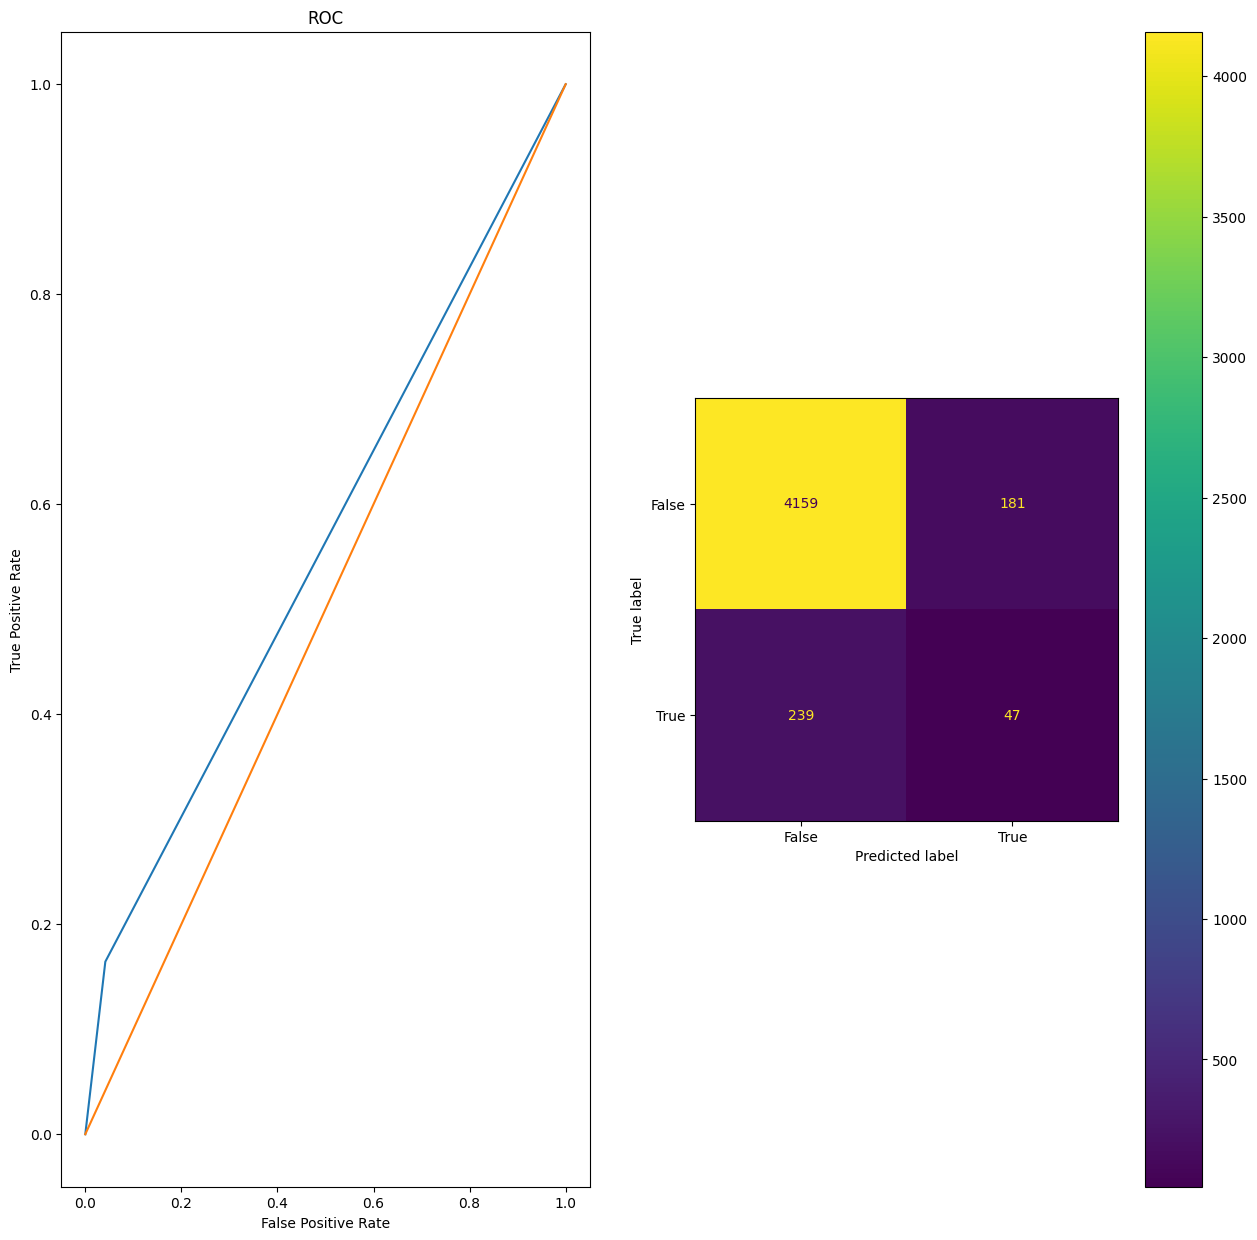

In [ ]:
predic = model.predict(gneralX_test)
scorForTrain(predic ,gneraly_test)

## undersampling

Train DATA : 
accuracy_score for Train data : 0.8507365885296025
recall_score for Train data : 1.0
precision_score for Train data : 0.2833629893238434
f1_score for Train data : 0.4415944540727903
roc_auc_score for Train data : 0.920687278456085


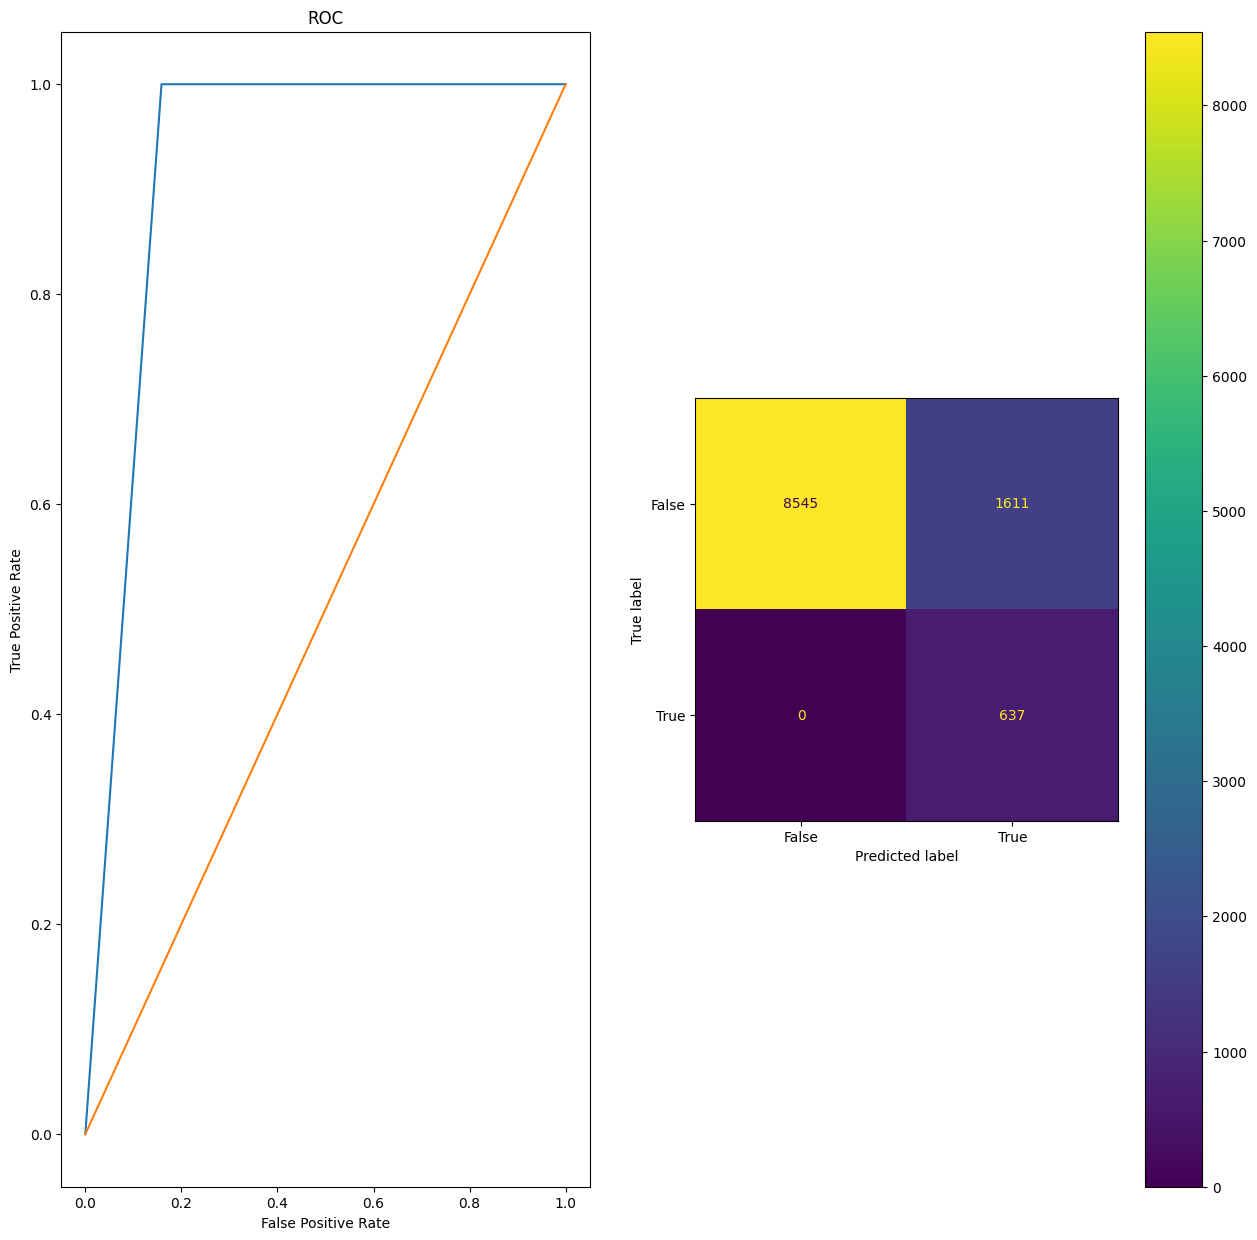

In [ ]:
model = RandomForestClassifier(max_depth=17, random_state=0)
model.fit(X_under, y_under)
predic = model.predict(gneralX_train)
scorForTrain(predic ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.8073929961089494
recall_score for Train data : 0.5314685314685315
precision_score for Train data : 0.16721672167216722
f1_score for Train data : 0.2543933054393306
roc_auc_score for Train data : 0.6785222841674454


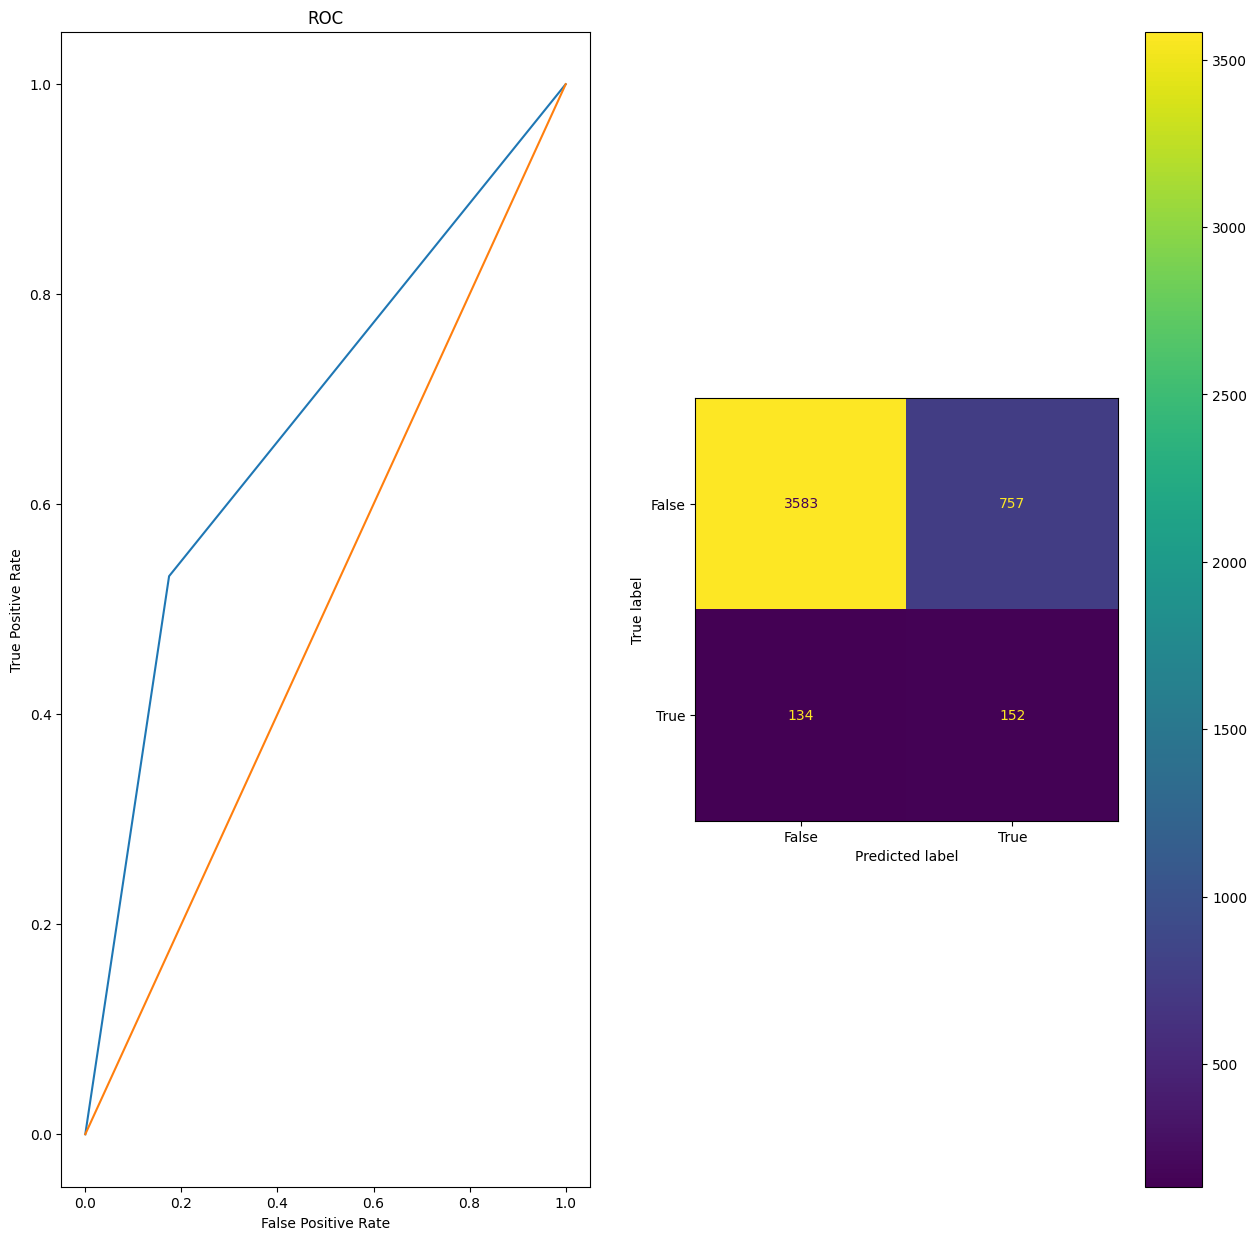

In [ ]:
predic = model.predict(gneralX_test)
scorForTrain(predic ,gneraly_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN

## imblance data

Train DATA : 
accuracy_score for Train data : 0.9423700546650607
recall_score for Train data : 0.03296703296703297
precision_score for Train data : 0.7777777777777778
f1_score for Train data : 0.06325301204819278
roc_auc_score for Train data : 0.516188124596947


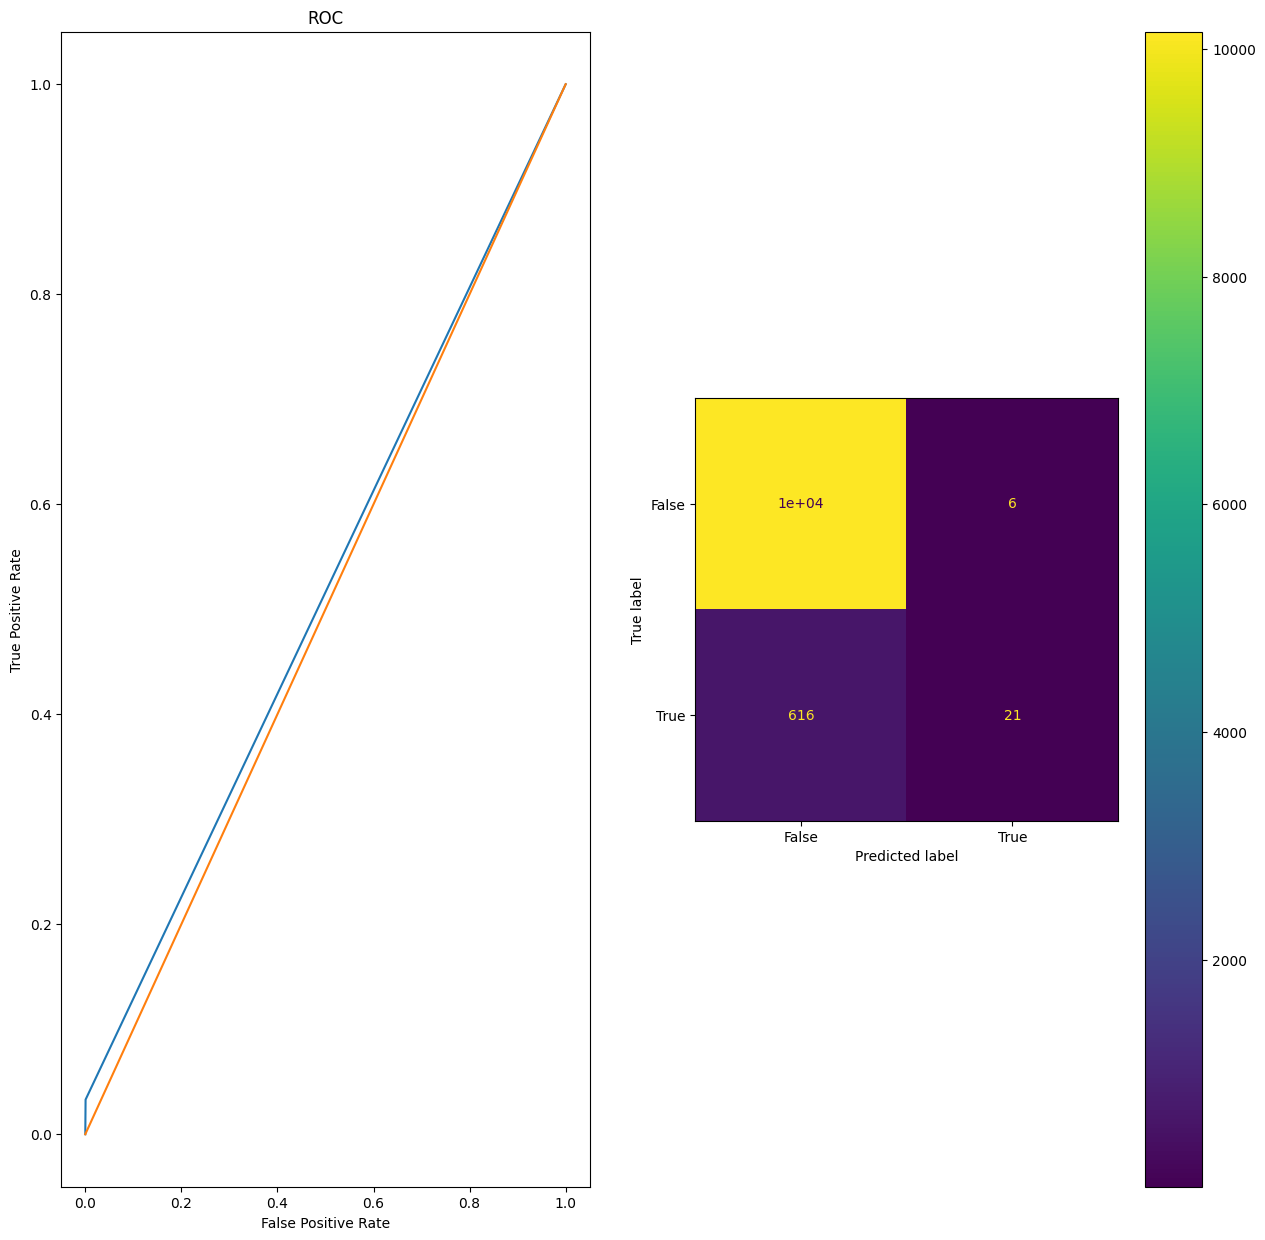

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(gneralX_train, gneraly_train)
predic = model.predict(gneralX_train)
scorForTrain(predic ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.9366623432771293
recall_score for Train data : 0.0
precision_score for Train data : 0.0
f1_score for Train data : 0.0
roc_auc_score for Train data : 0.4991935483870968


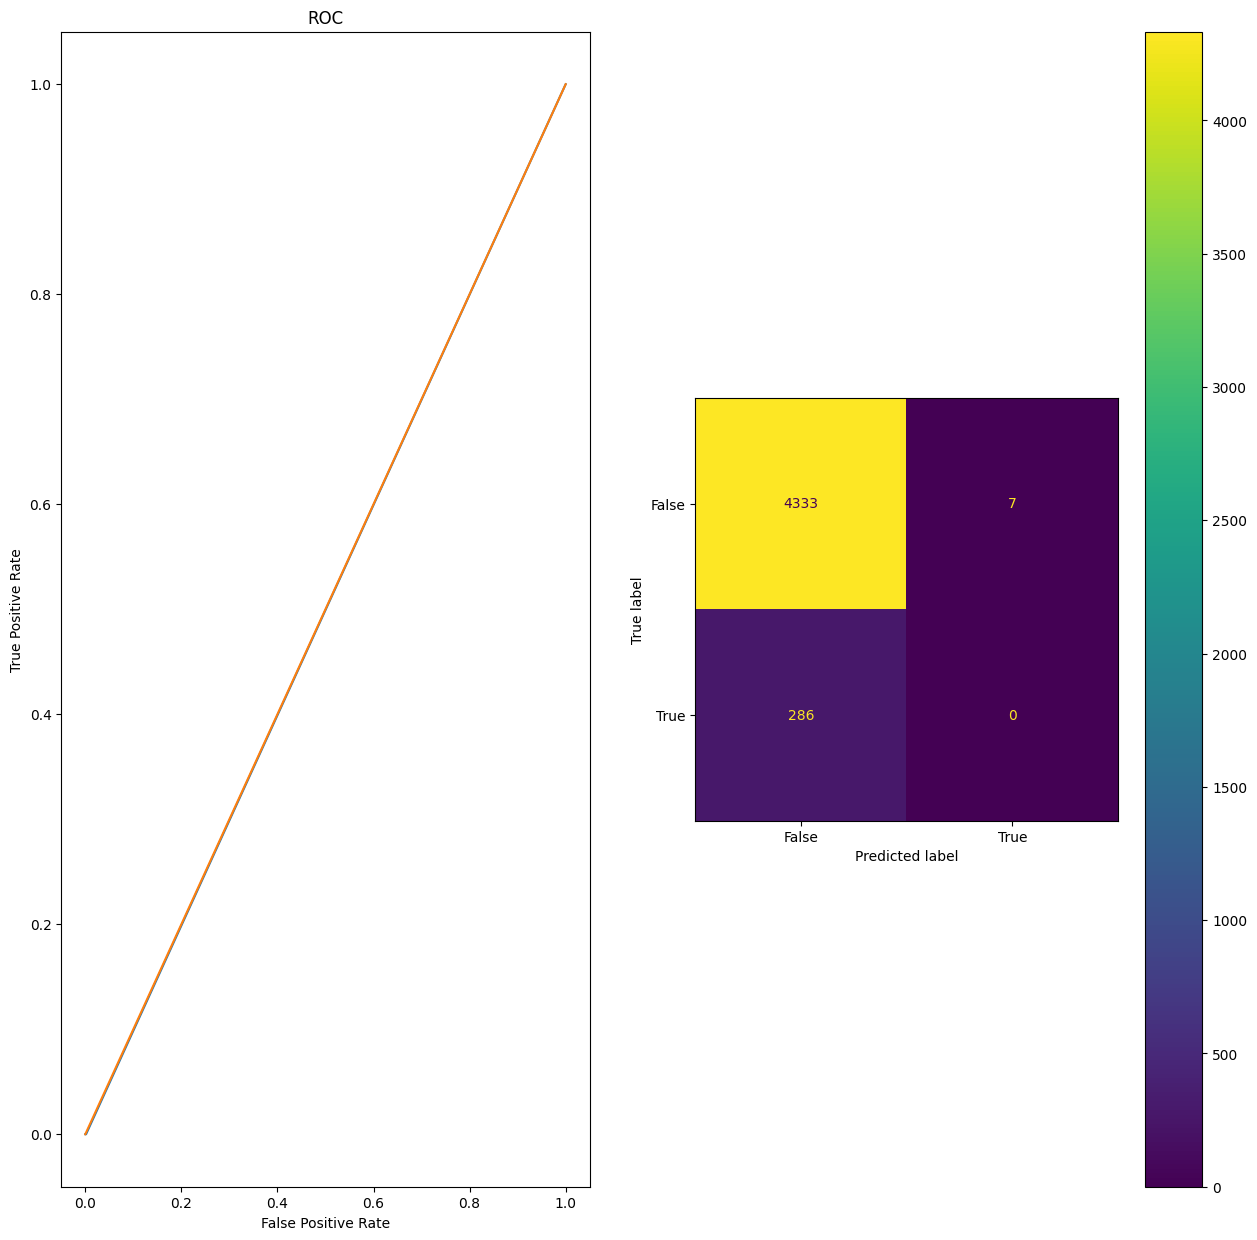

In [ ]:
predic = model.predict(gneralX_test)
scorForTrain(predic ,gneraly_test)

## undersampling

Train DATA : 
accuracy_score for Train data : 0.8157138886315204
recall_score for Train data : 0.434850863422292
precision_score for Train data : 0.1453305351521511
f1_score for Train data : 0.21785292961069605
roc_auc_score for Train data : 0.6372265345075225


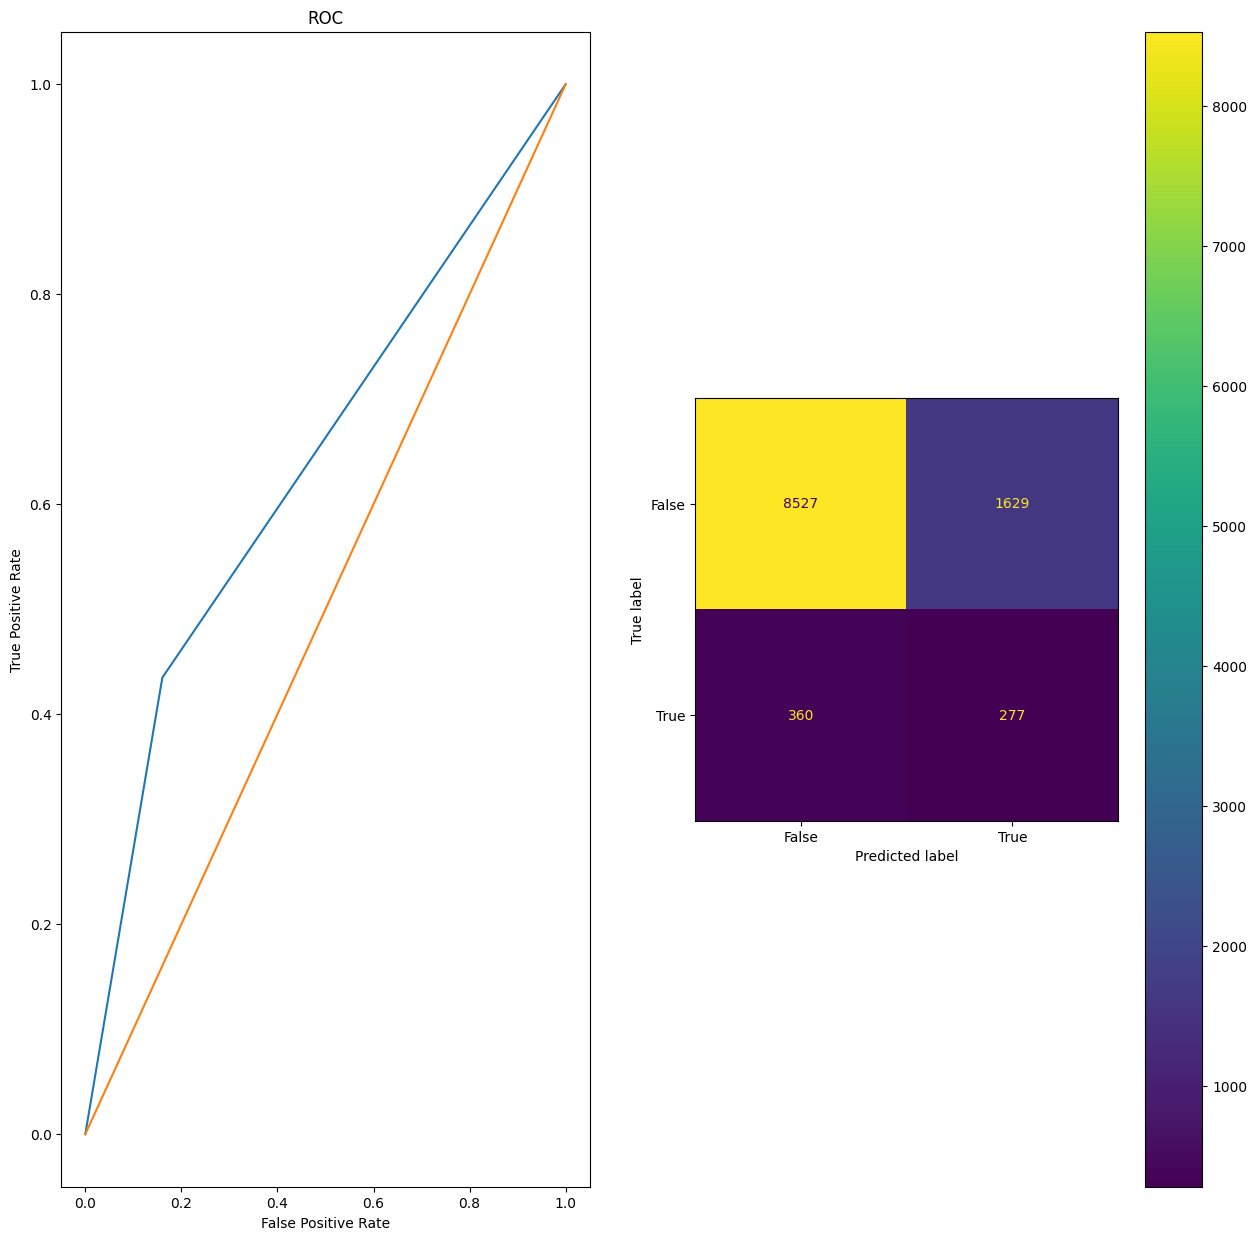

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_under, y_under)
predic = model.predict(gneralX_train)
scorForTrain(predic ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.7929096411586684
recall_score for Train data : 0.23076923076923078
precision_score for Train data : 0.08208955223880597
f1_score for Train data : 0.12110091743119265
roc_auc_score for Train data : 0.5303615739099611


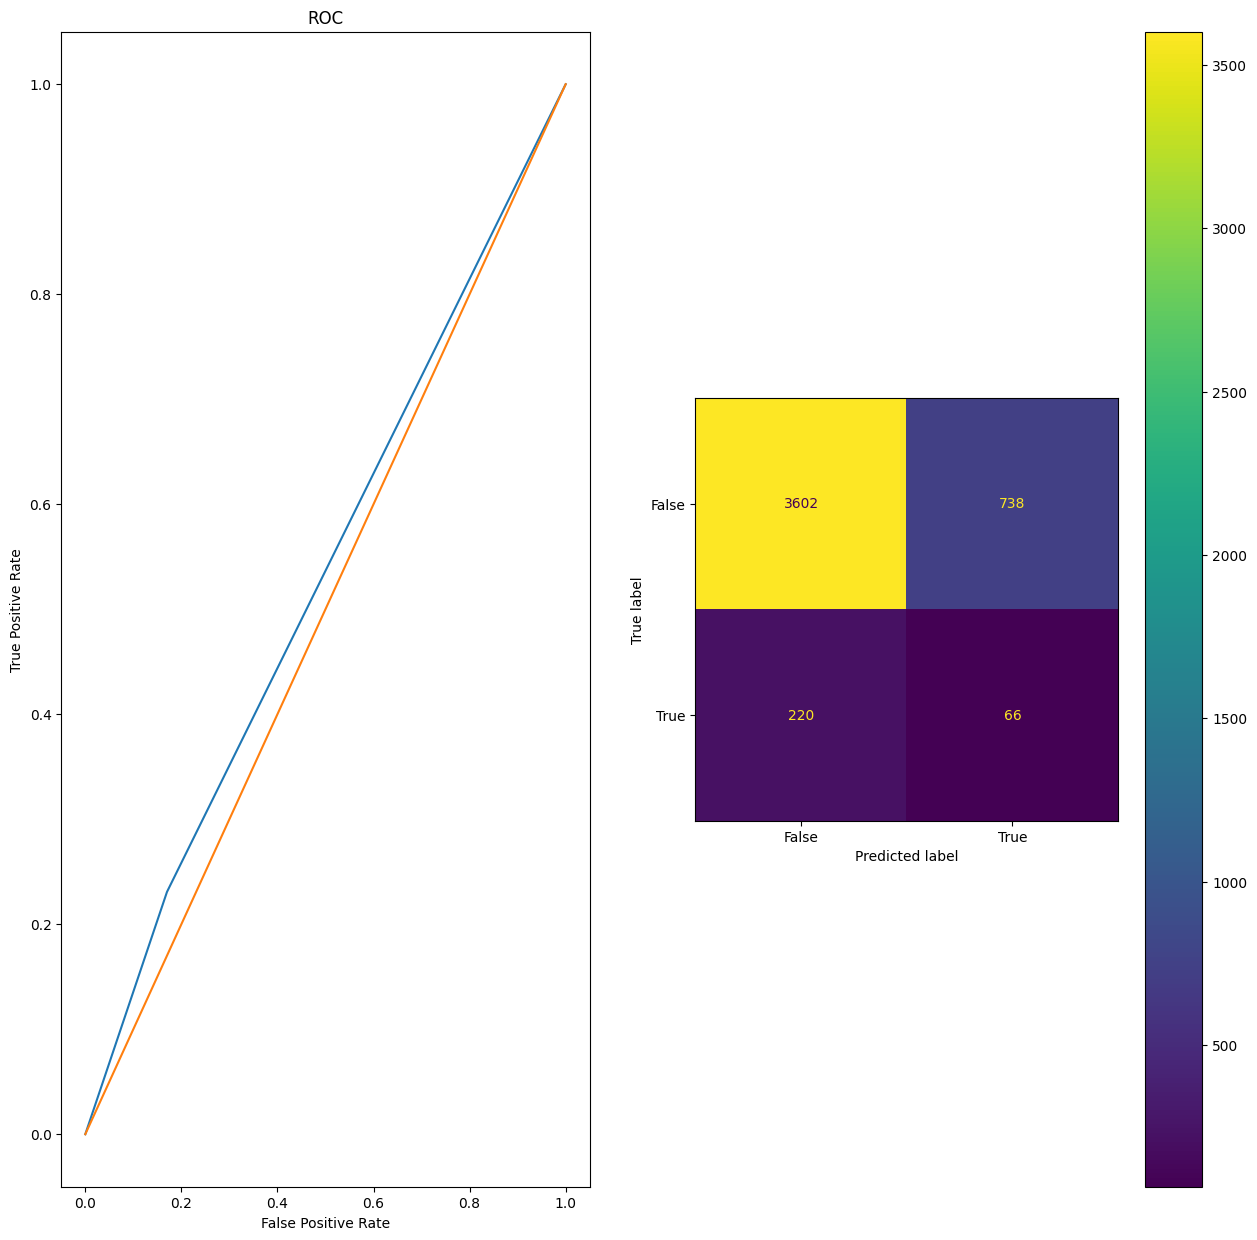

In [ ]:
predic = model.predict(gneralX_test)
scorForTrain(predic ,gneraly_test)

## Oversampling

Train DATA : 
accuracy_score for Train data : 0.8776058556471787
recall_score for Train data : 0.9984301412872841
precision_score for Train data : 0.32515337423312884
f1_score for Train data : 0.49055148476667954
roc_auc_score for Train data : 0.9342288555983485


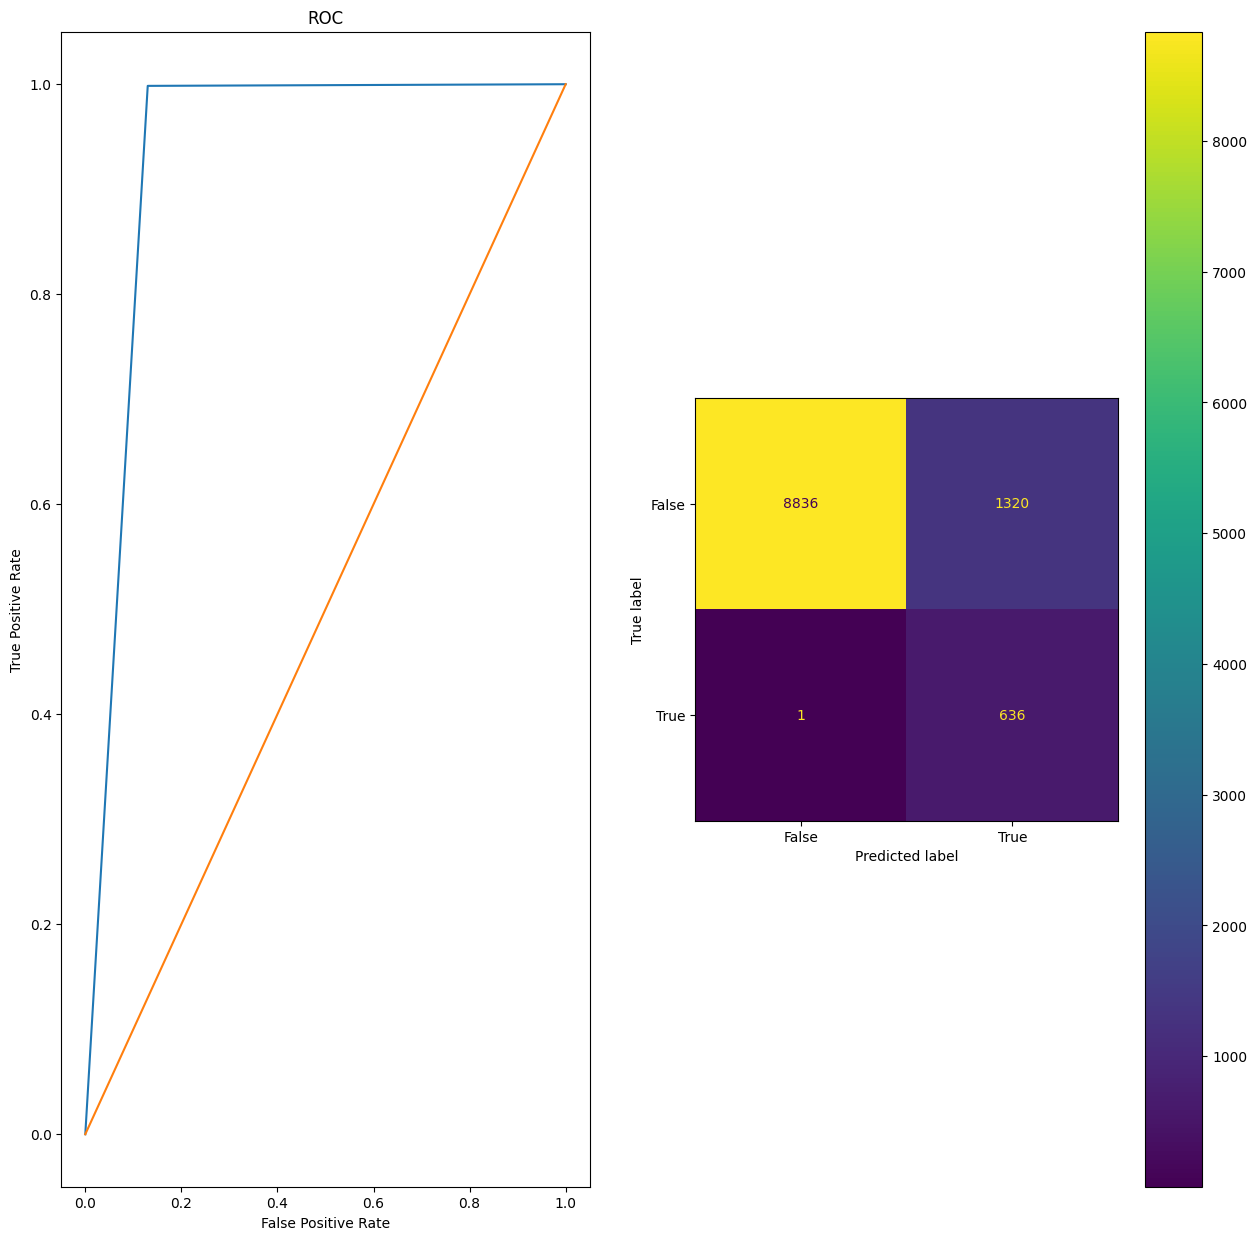

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_over, y_over)
predic = model.predict(gneralX_train)
scorForTrain(predic ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.7658884565499352
recall_score for Train data : 0.21328671328671328
precision_score for Train data : 0.06637649619151251
f1_score for Train data : 0.1012448132780083
roc_auc_score for Train data : 0.5077954303760756


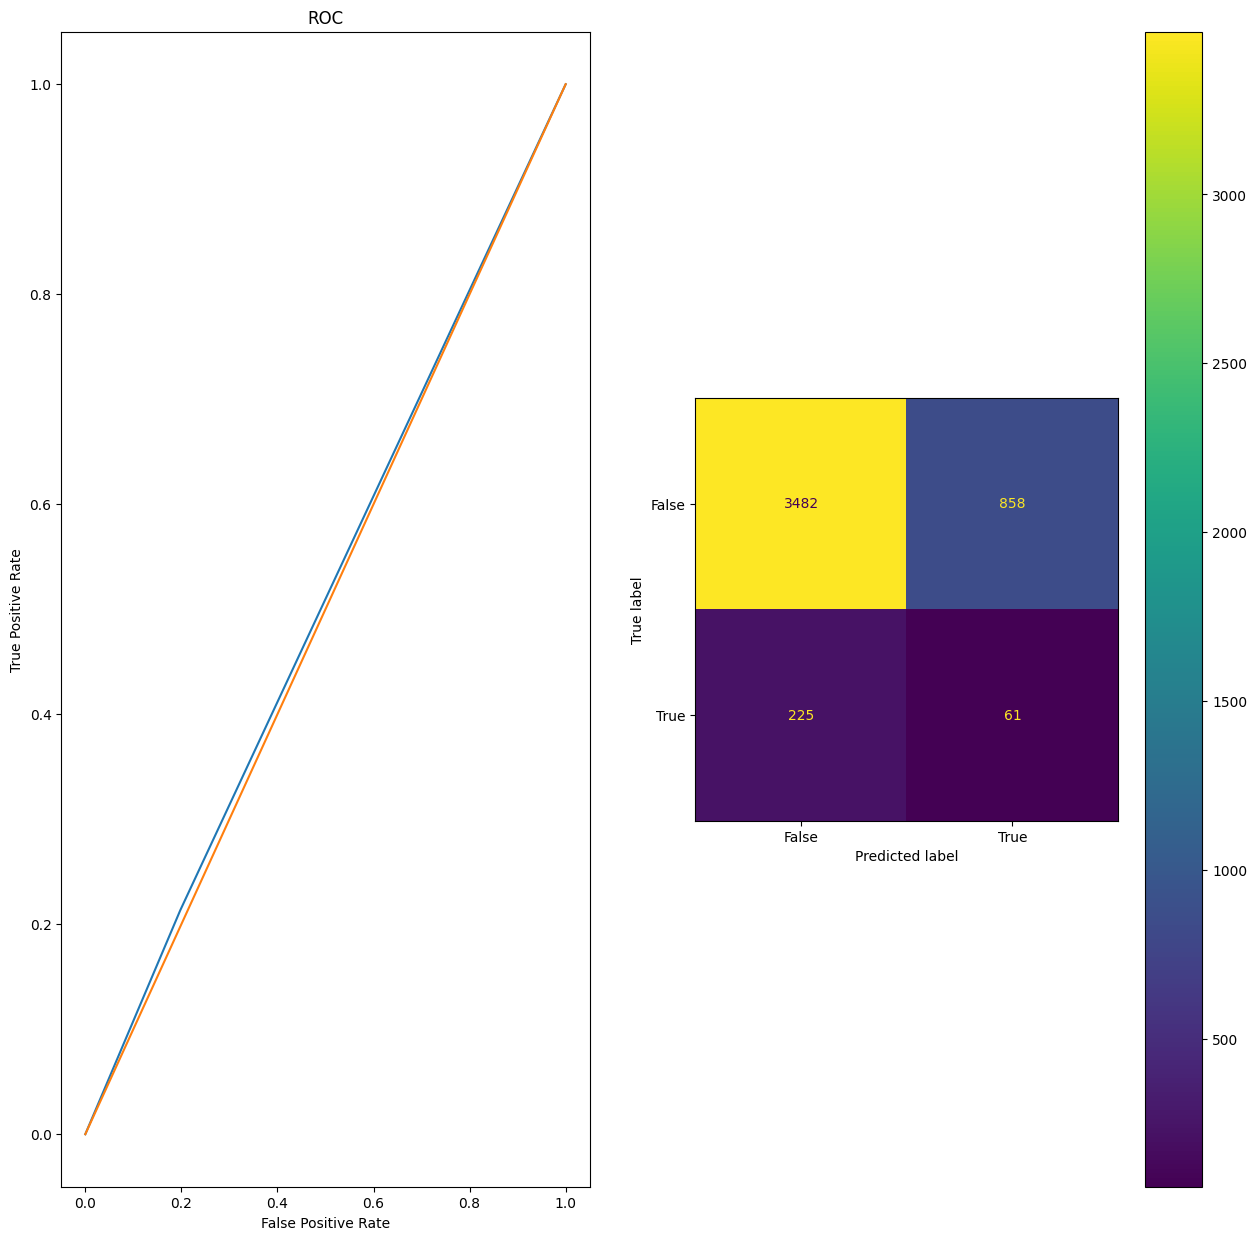

In [ ]:
predic = model.predict(gneralX_test)
scorForTrain(predic ,gneraly_test)

# GradientBoostingClassifier

### imblance data

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Train DATA : 
accuracy_score for Train data : 0.9406096544056333
recall_score for Train data : 0.007849293563579277
precision_score for Train data : 0.35714285714285715
f1_score for Train data : 0.015360983102918585
roc_auc_score for Train data : 0.5034815589519354


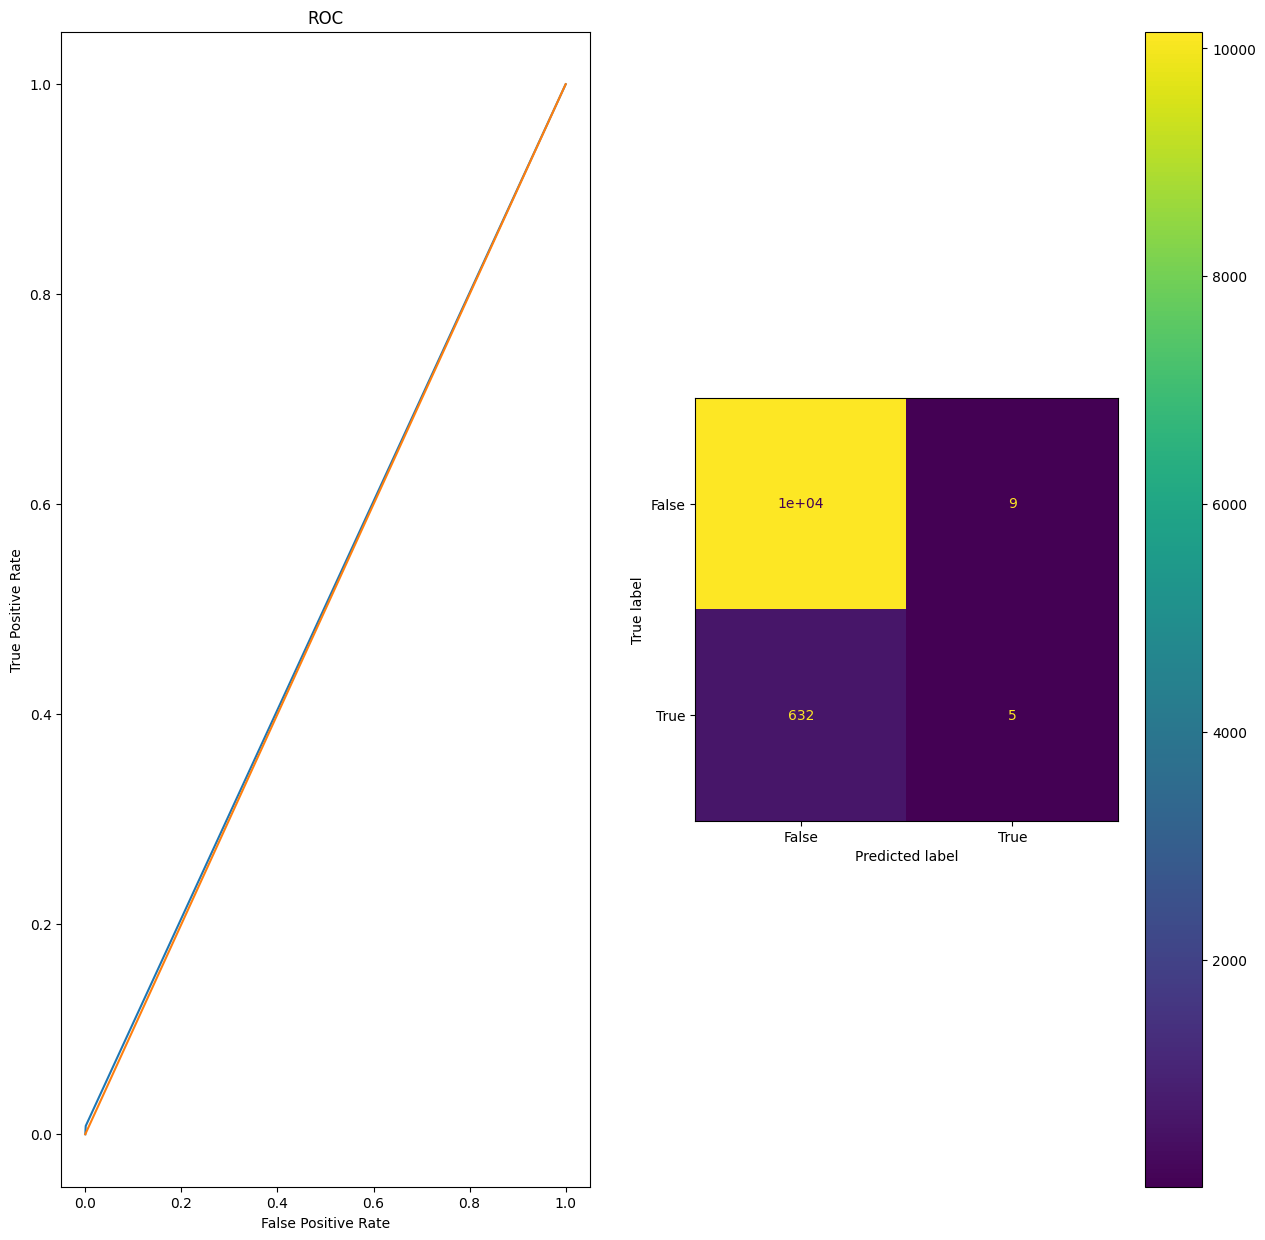

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(gneralX_train, gneraly_train)

predict = model.predict(gneralX_train)

scorForTrain(predict ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.937094682230869
recall_score for Train data : 0.0034965034965034965
precision_score for Train data : 0.14285714285714285
f1_score for Train data : 0.006825938566552902
roc_auc_score for Train data : 0.5010570075086205


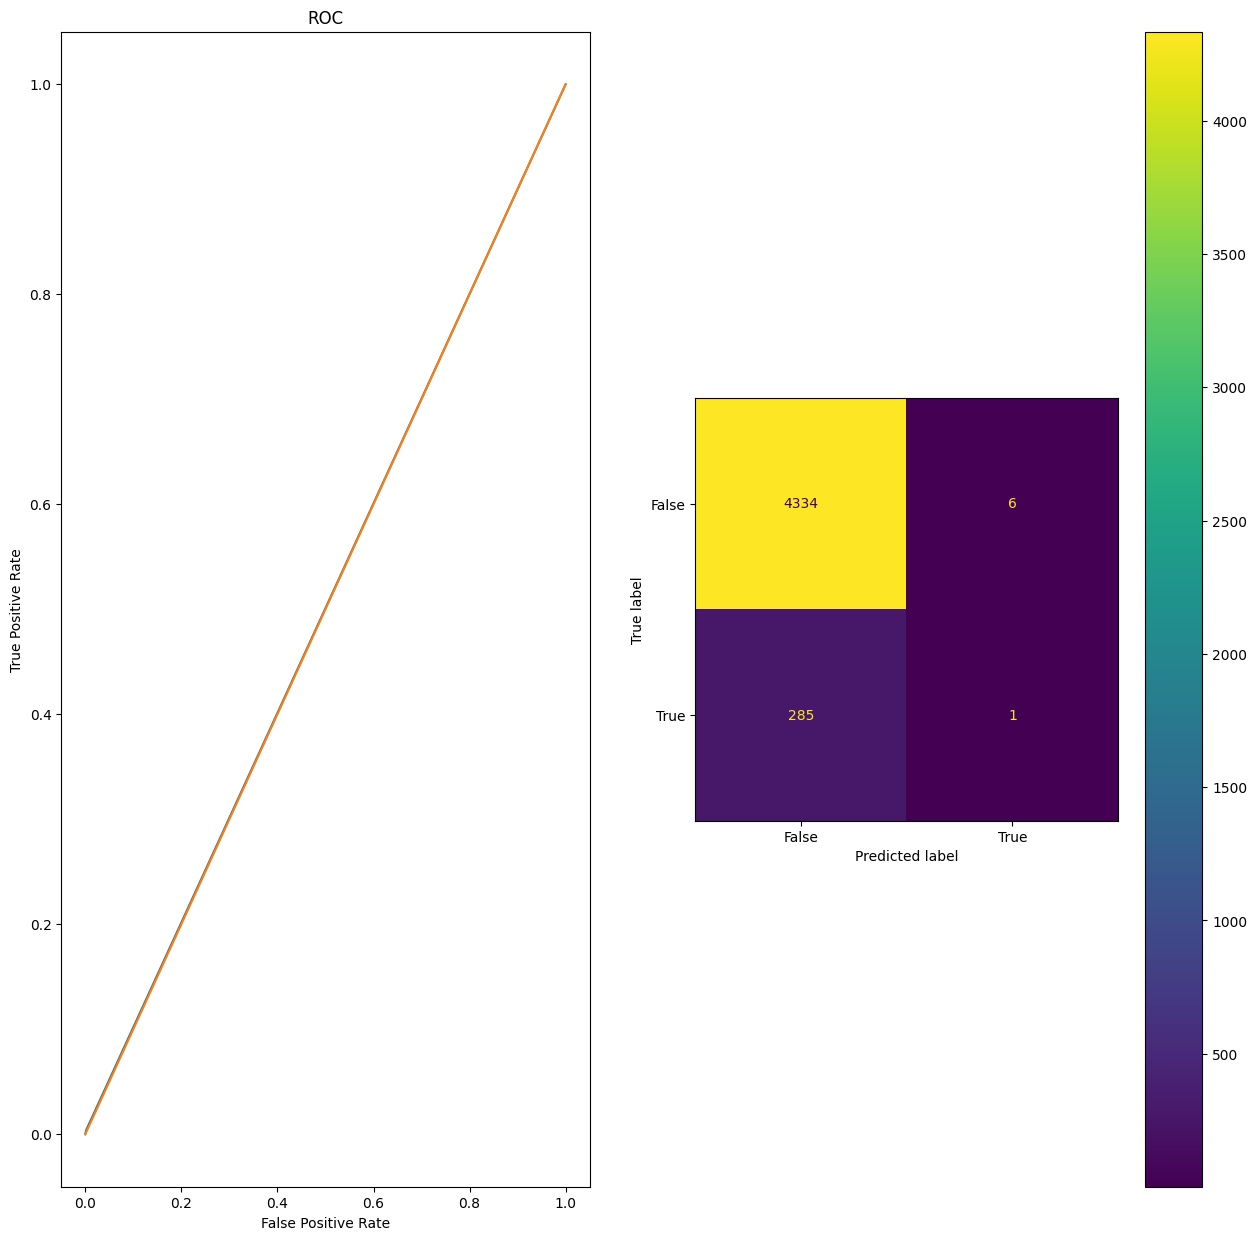

In [ ]:
predict = model.predict(gneralX_test)

scorForTrain(predict ,gneraly_test)

## Undersamling

Train DATA : 
accuracy_score for Train data : 0.7900491059019735
recall_score for Train data : 0.6499215070643642
precision_score for Train data : 0.1684981684981685
f1_score for Train data : 0.2676147382029735
roc_auc_score for Train data : 0.7243798161552621


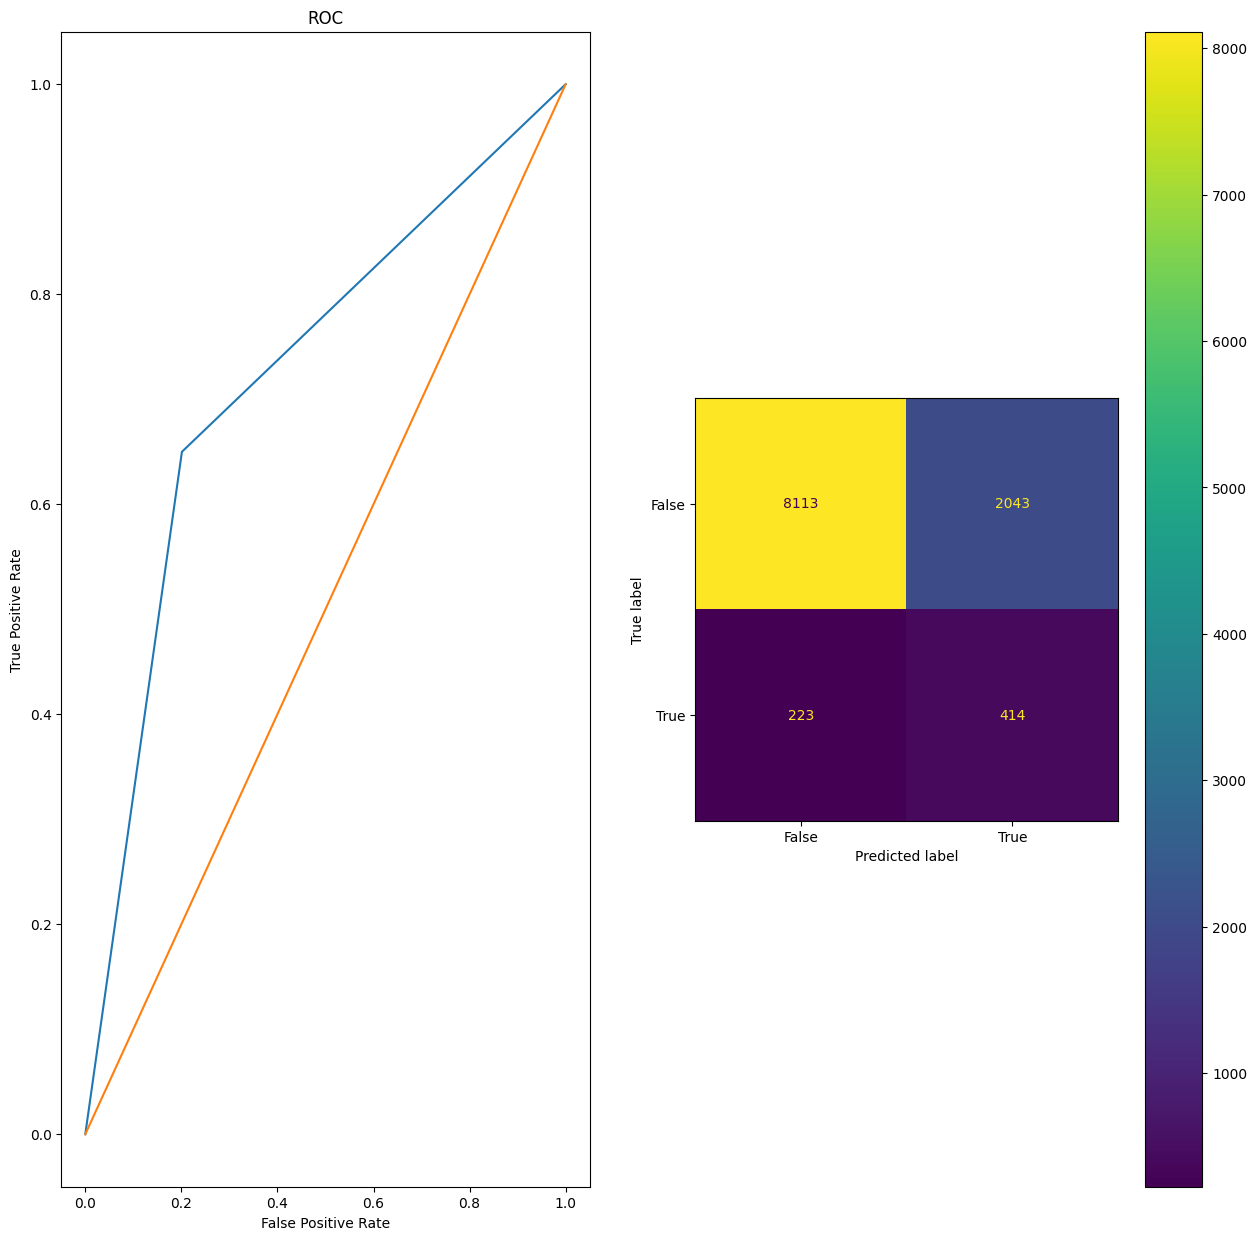

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_under, y_under)

predict = model.predict(gneralX_train)

scorForTrain(predict ,gneraly_train)

TEST DATA : 
accuracy_score for test data : 0.7808041504539559
recall_score for test data : 0.5314685314685315
precision_score for test data : 0.14728682170542637
f1_score for test data : 0.2306525037936267
roc_auc_score for test data : 0.664351777255003


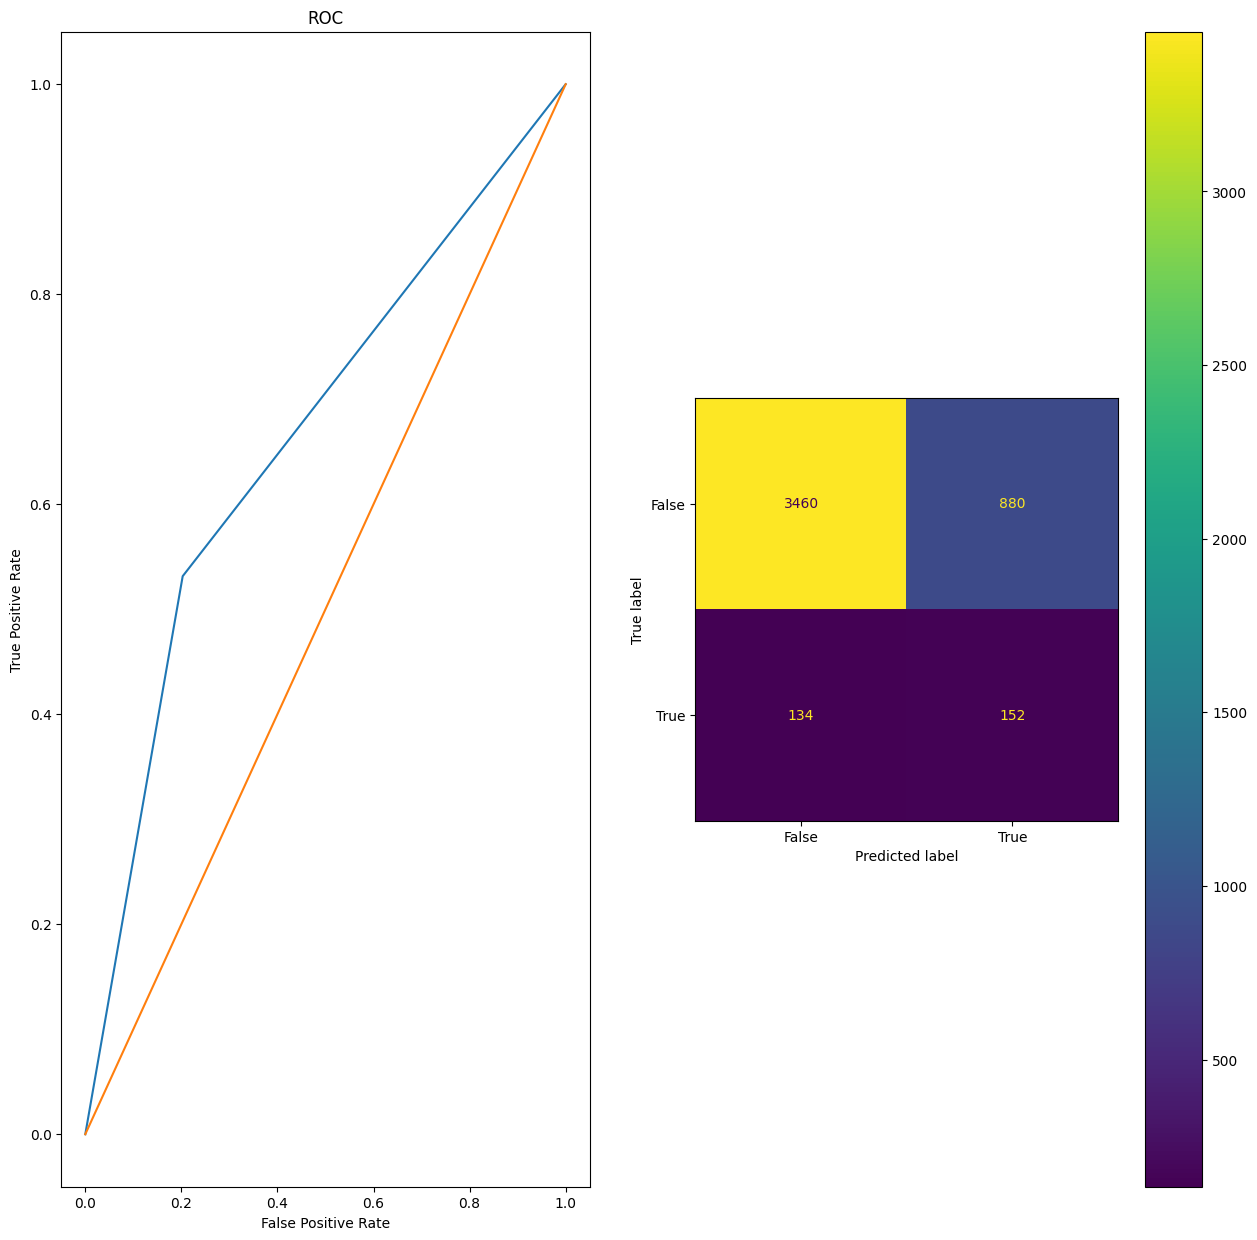

In [ ]:
predict = model.predict(gneralX_test)

scorForTest(predict ,gneraly_test)

Train DATA : 
accuracy_score for Train data : 0.7853238209950895
recall_score for Train data : 0.7032967032967034
precision_score for Train data : 0.17391304347826086
f1_score for Train data : 0.2788671023965142
roc_auc_score for Train data : 0.7468826958783634


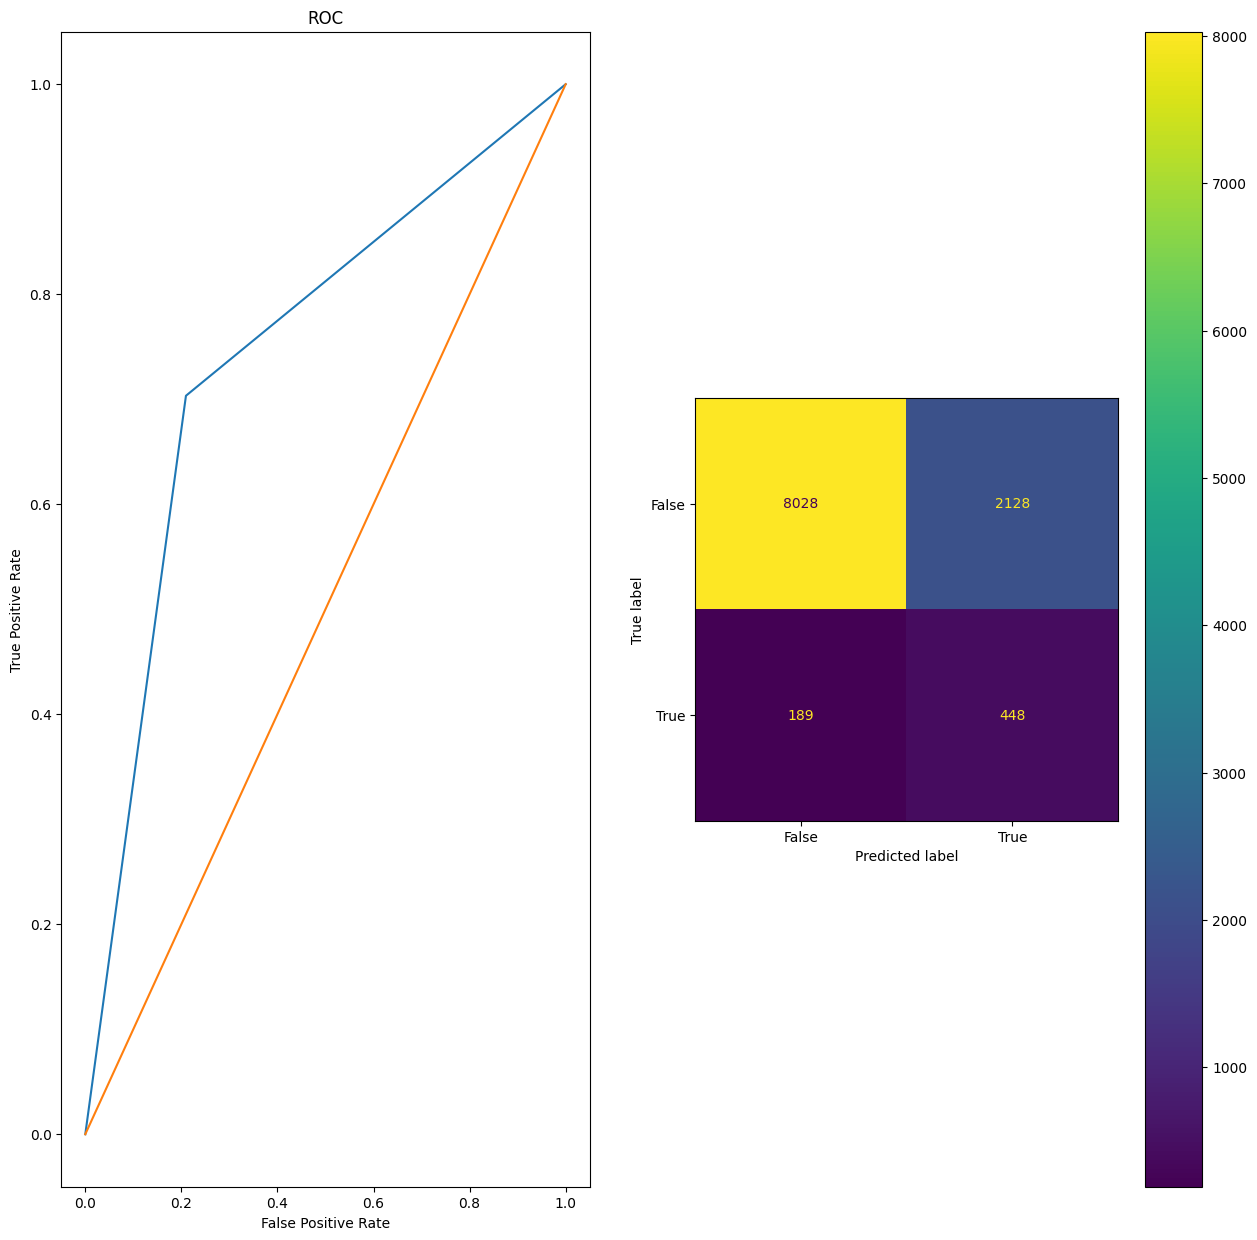

In [205]:
parameters = {'n_estimators':[1,1000], 'learning_rate':[.01, 1] ,'max_depth':[1 ,20]}

model = GradientBoostingClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_under, y_under)

predict = clf.predict(gneralX_train)

scorForTrain(predict ,gneraly_train)

## Oversampling

Train DATA : 
accuracy_score for Train data : 0.8729732233855276
recall_score for Train data : 0.28414442700156983
precision_score for Train data : 0.16514598540145986
f1_score for Train data : 0.20888632429313328
roc_auc_score for Train data : 0.5970249507989338


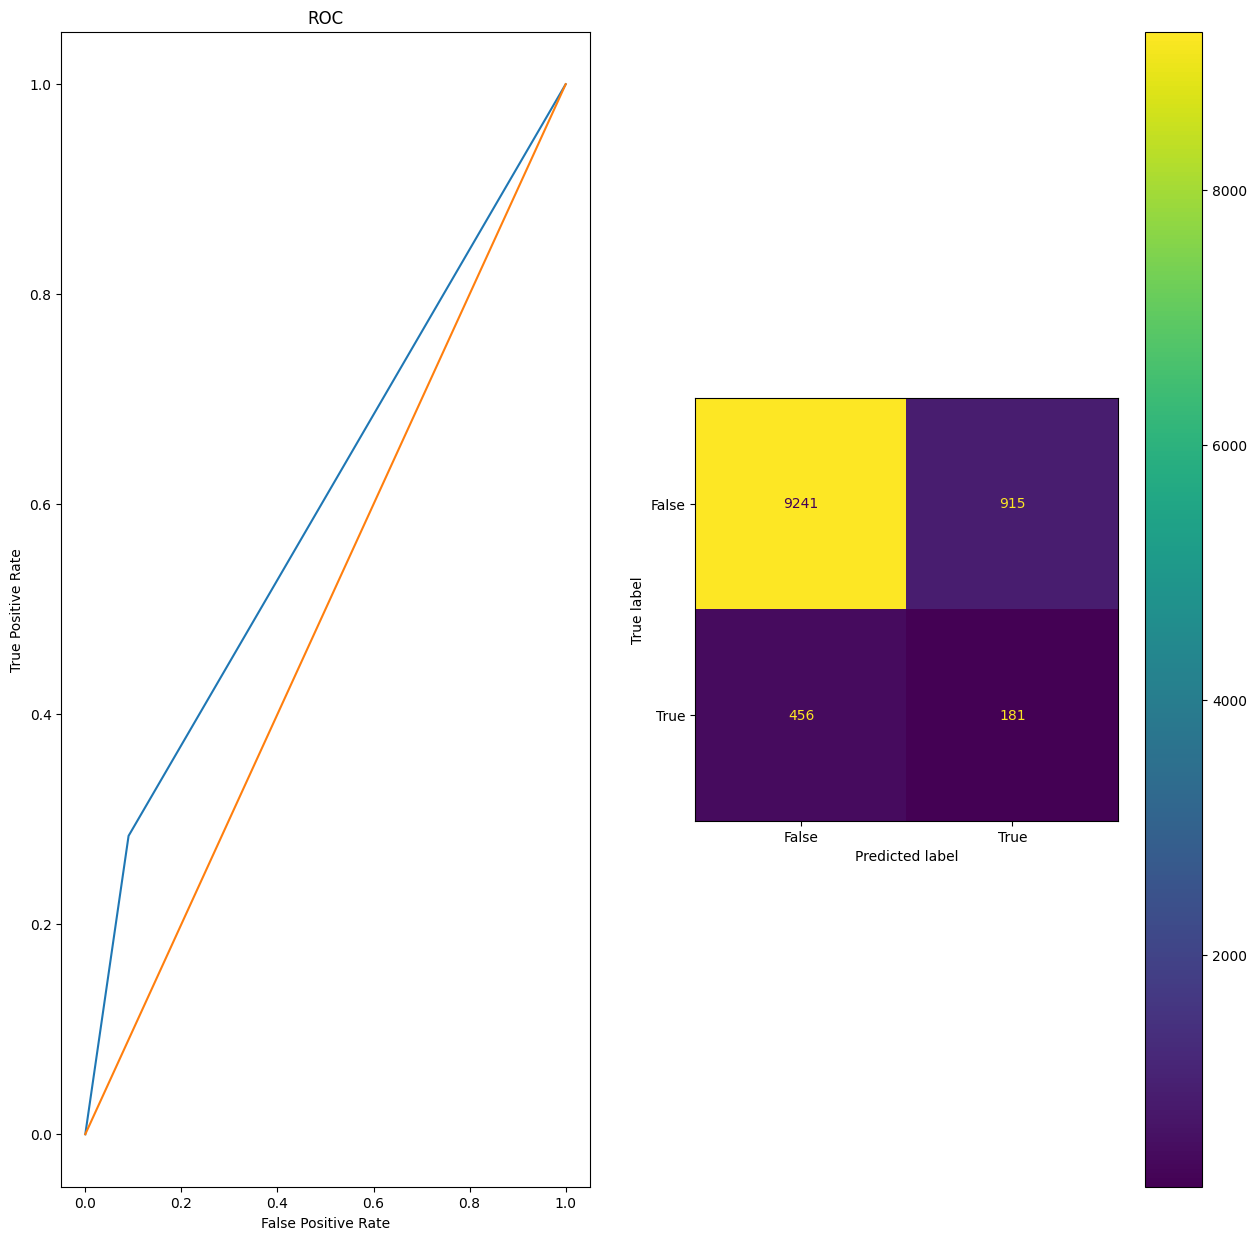

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_over, y_over)

predict = model.predict(gneralX_train)

scorForTrain(predict ,gneraly_train)

Train DATA : 
accuracy_score for Train data : 0.877431906614786
recall_score for Train data : 0.2727272727272727
precision_score for Train data : 0.17848970251716248
f1_score for Train data : 0.2157676348547718
roc_auc_score for Train data : 0.5950041893590281


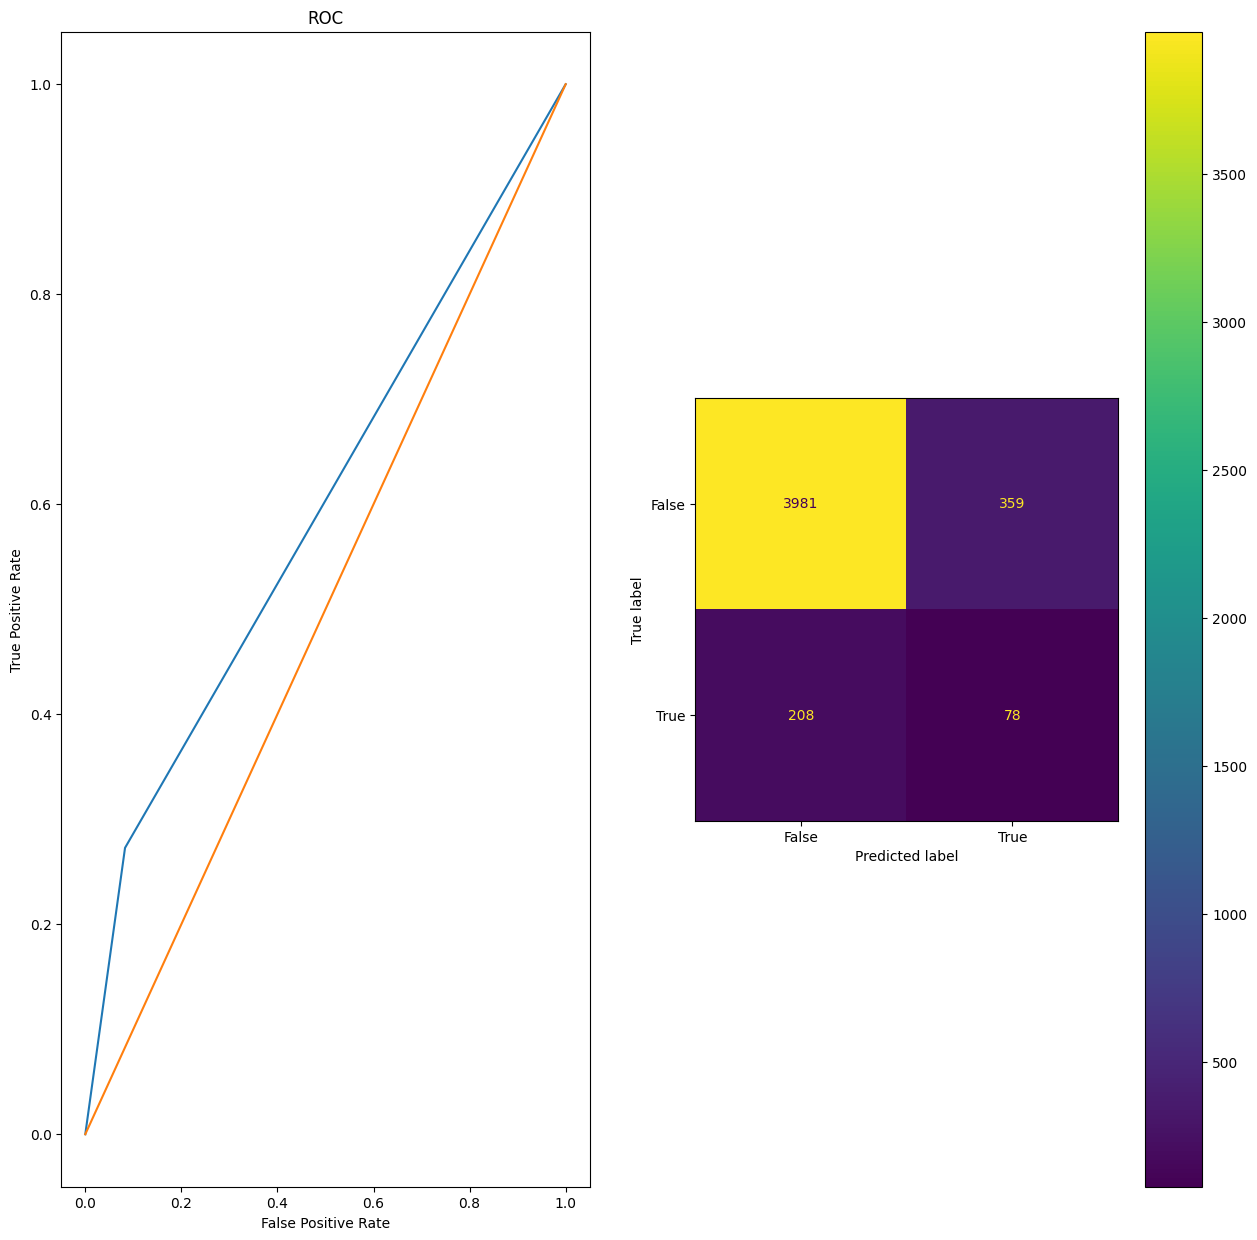

In [ ]:
predict = model.predict(gneralX_test)
scorForTrain(predict ,gneraly_test)